# Part I: Data Exploration
We need to explore the dataset, find relationship between feature, discover how we should format or modify the dataset for the prediction analysis.

In [123]:
import numpy as np
import pandas
import seaborn
from matplotlib import pyplot as plt

In [124]:
# Load dataset
data = pandas.read_csv('AmesHousing.csv', index_col="Order")

# Display dataset
data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [125]:
# Function to map categorical features to int
def generate_ordinal_encoding(column):
    values = column.unique()
    mapping = {i: values[i] for i in range(len(values))}
    return mapping

def generate_ordinal_encoding_for_all_columns(dataset):
    encoding = {}
    for column in dataset.columns:
        if dataset[column].dtype == object:
            encoding[column] = generate_ordinal_encoding(dataset[column])
    return encoding

def apply_ordinal_encoding_to_all_columns(dataset, columns_dict):
    for column in columns_dict:
        dataset[column] = dataset[column].map({v: k for k, v in columns_dict[column].items()})

def apply_onehot_encoding(column):
    encoding = {}
    for feature in column.unique():
        encoding[feature] = column.apply(lambda x: x == feature)
    return pandas.DataFrame(encoding, index=column.index)

# Function to draw correlation matrix
def draw_correlation_matrix(dataset, figsize=None, title="Correlation Heatmap"):
    if figsize:
        plt.figure(figsize=figsize)
    seaborn.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
    plt.title(title)
    plt.show()

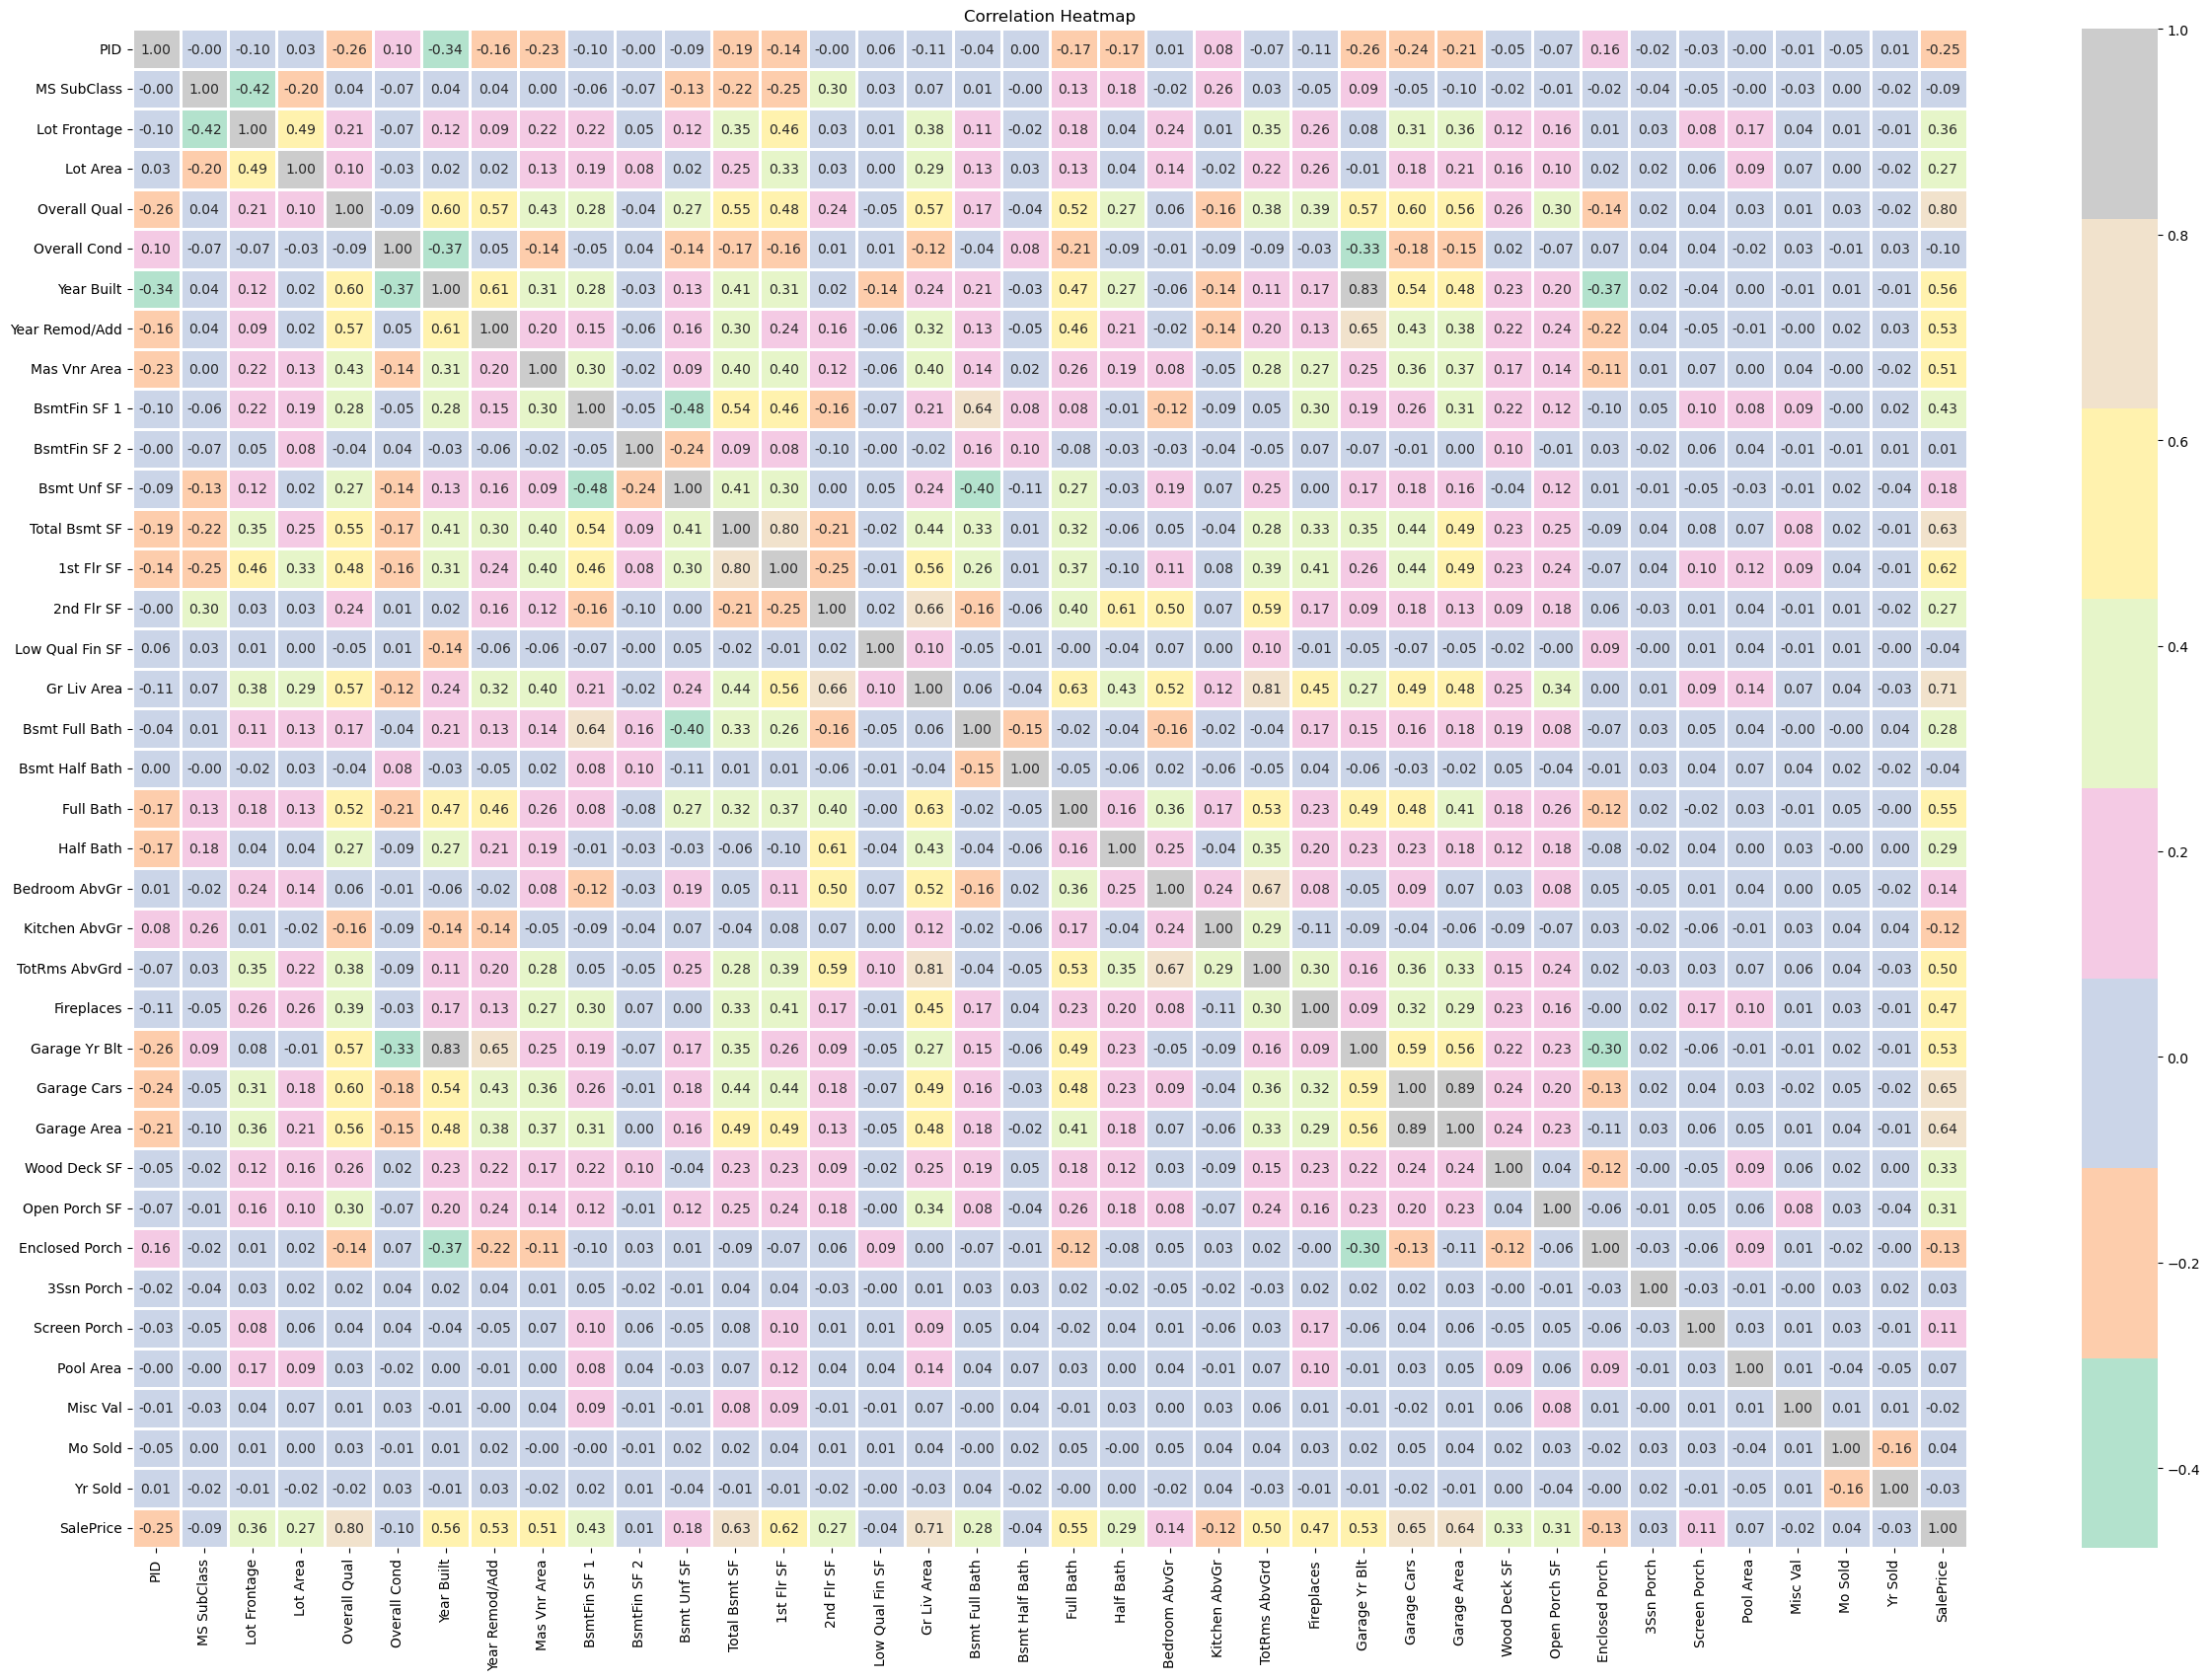

In [126]:
# Draw correlation matrix for numerical features
draw_correlation_matrix(data.select_dtypes(include=[np.number]), figsize=(30, 20))

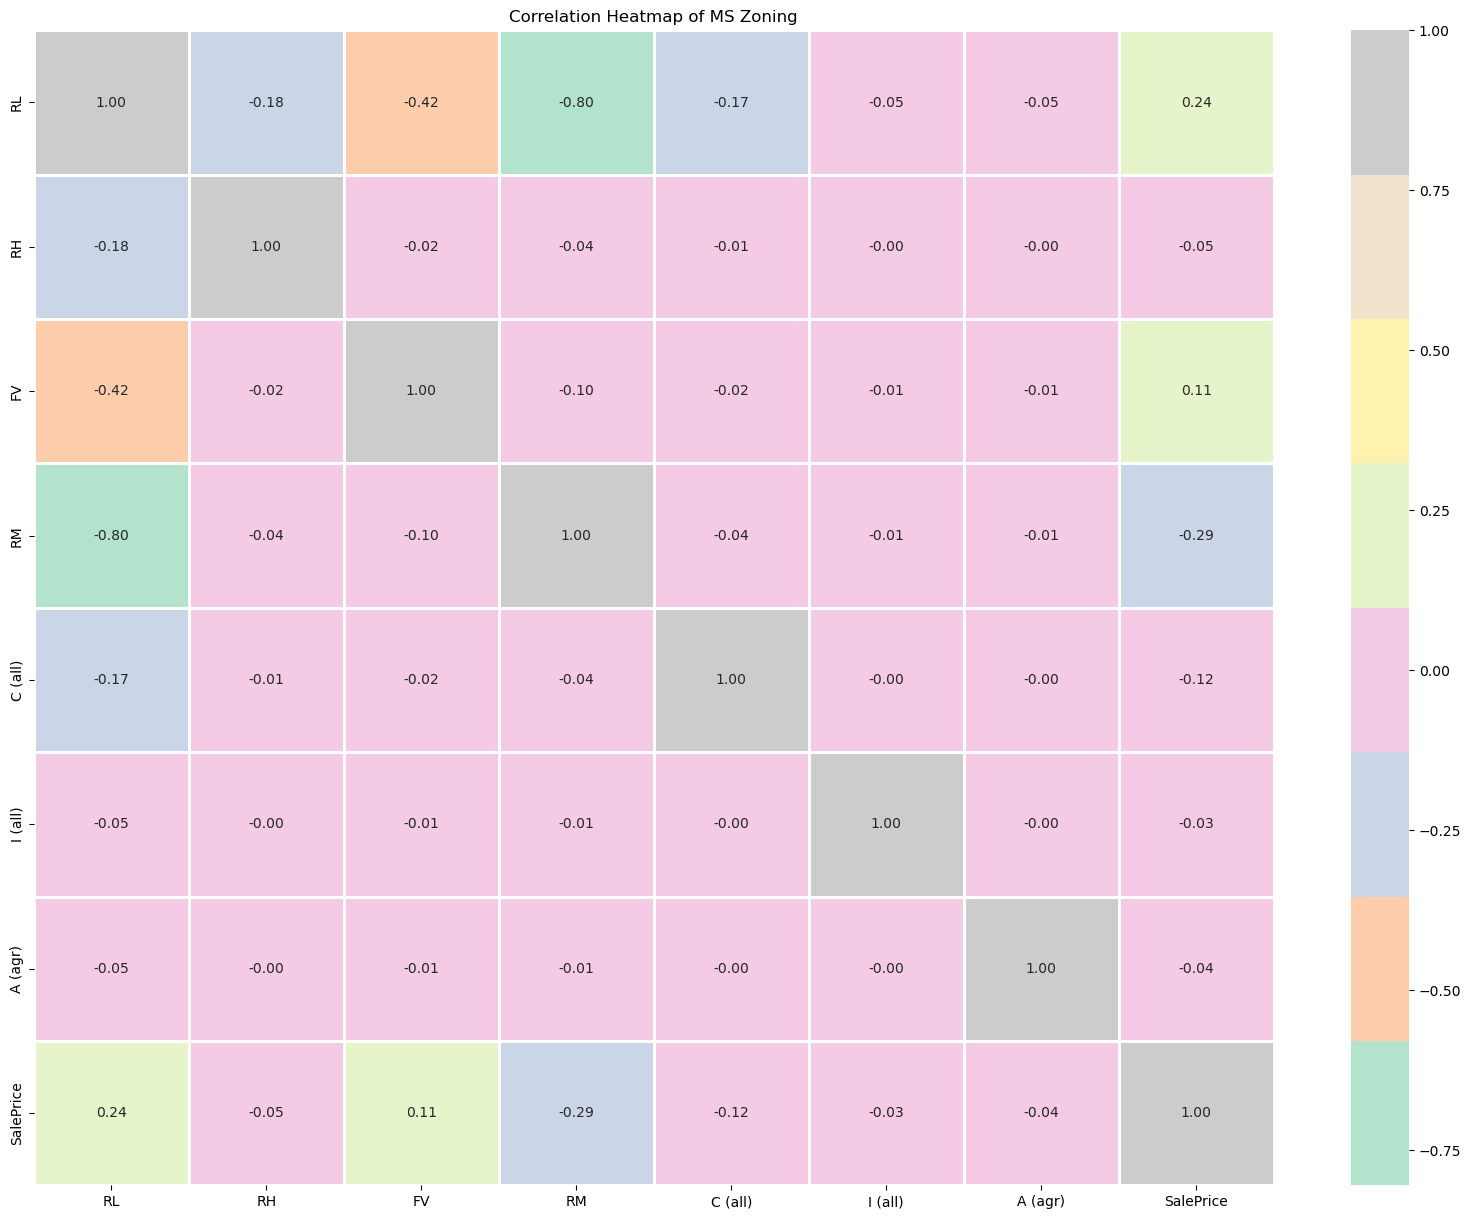

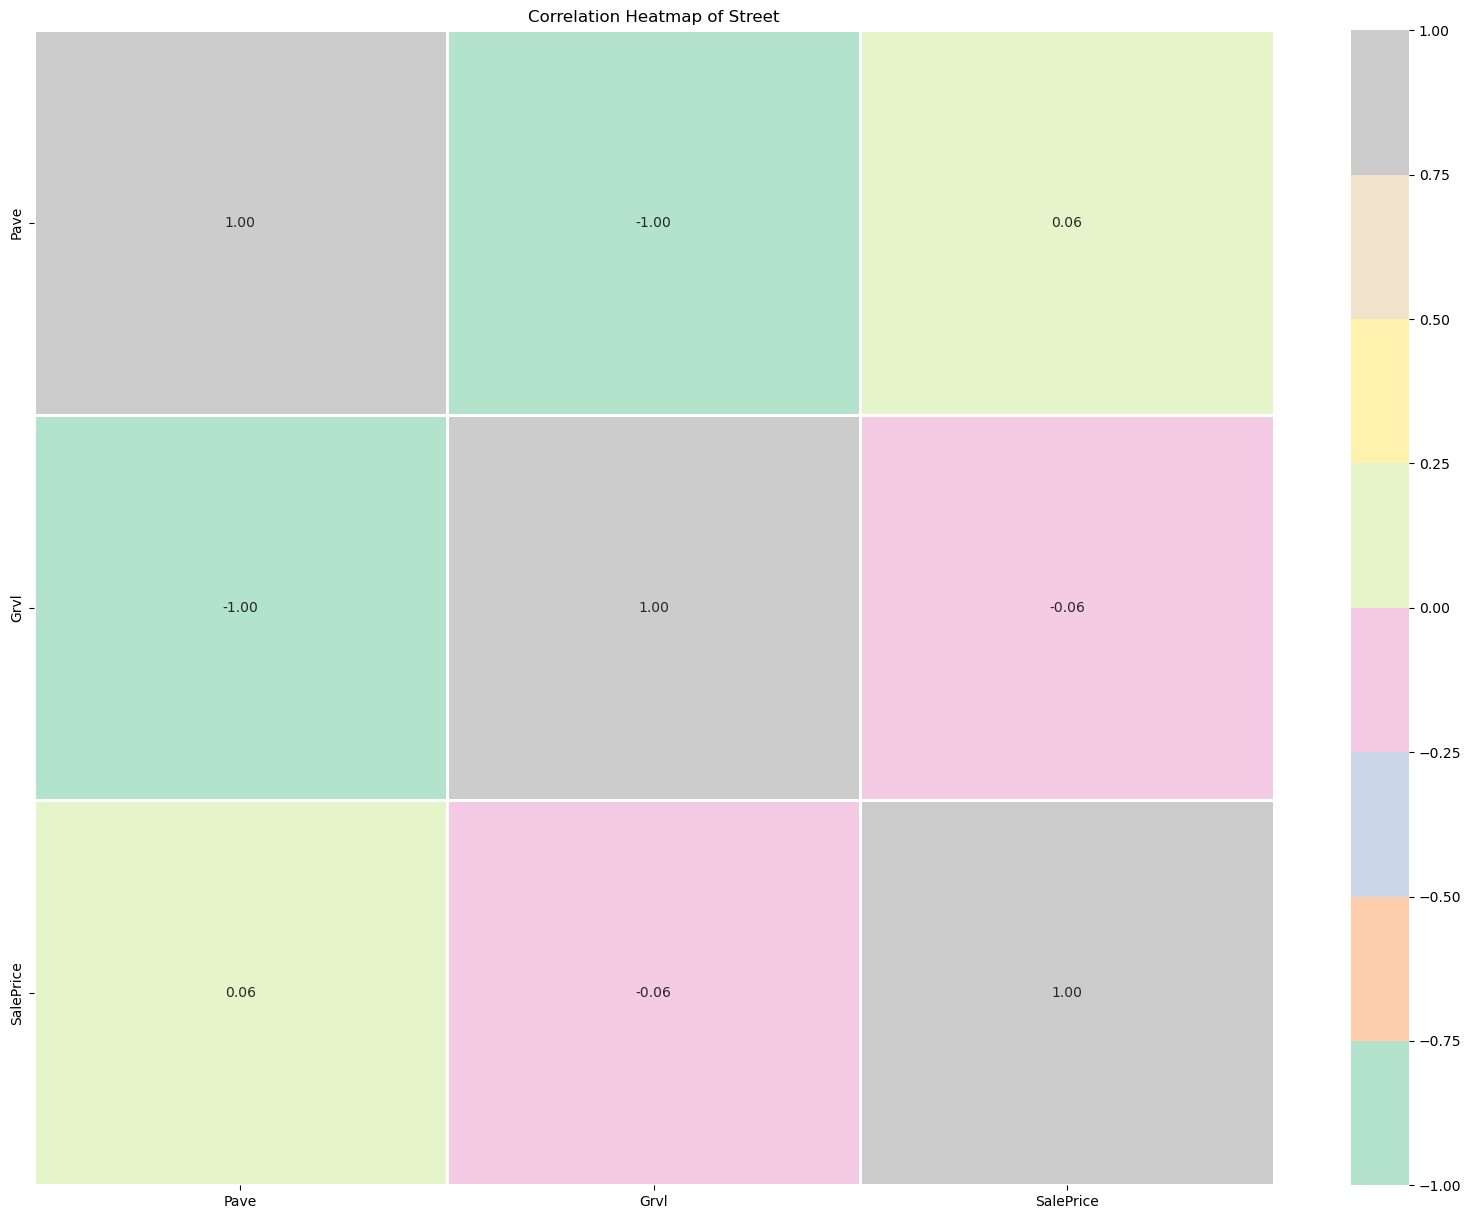

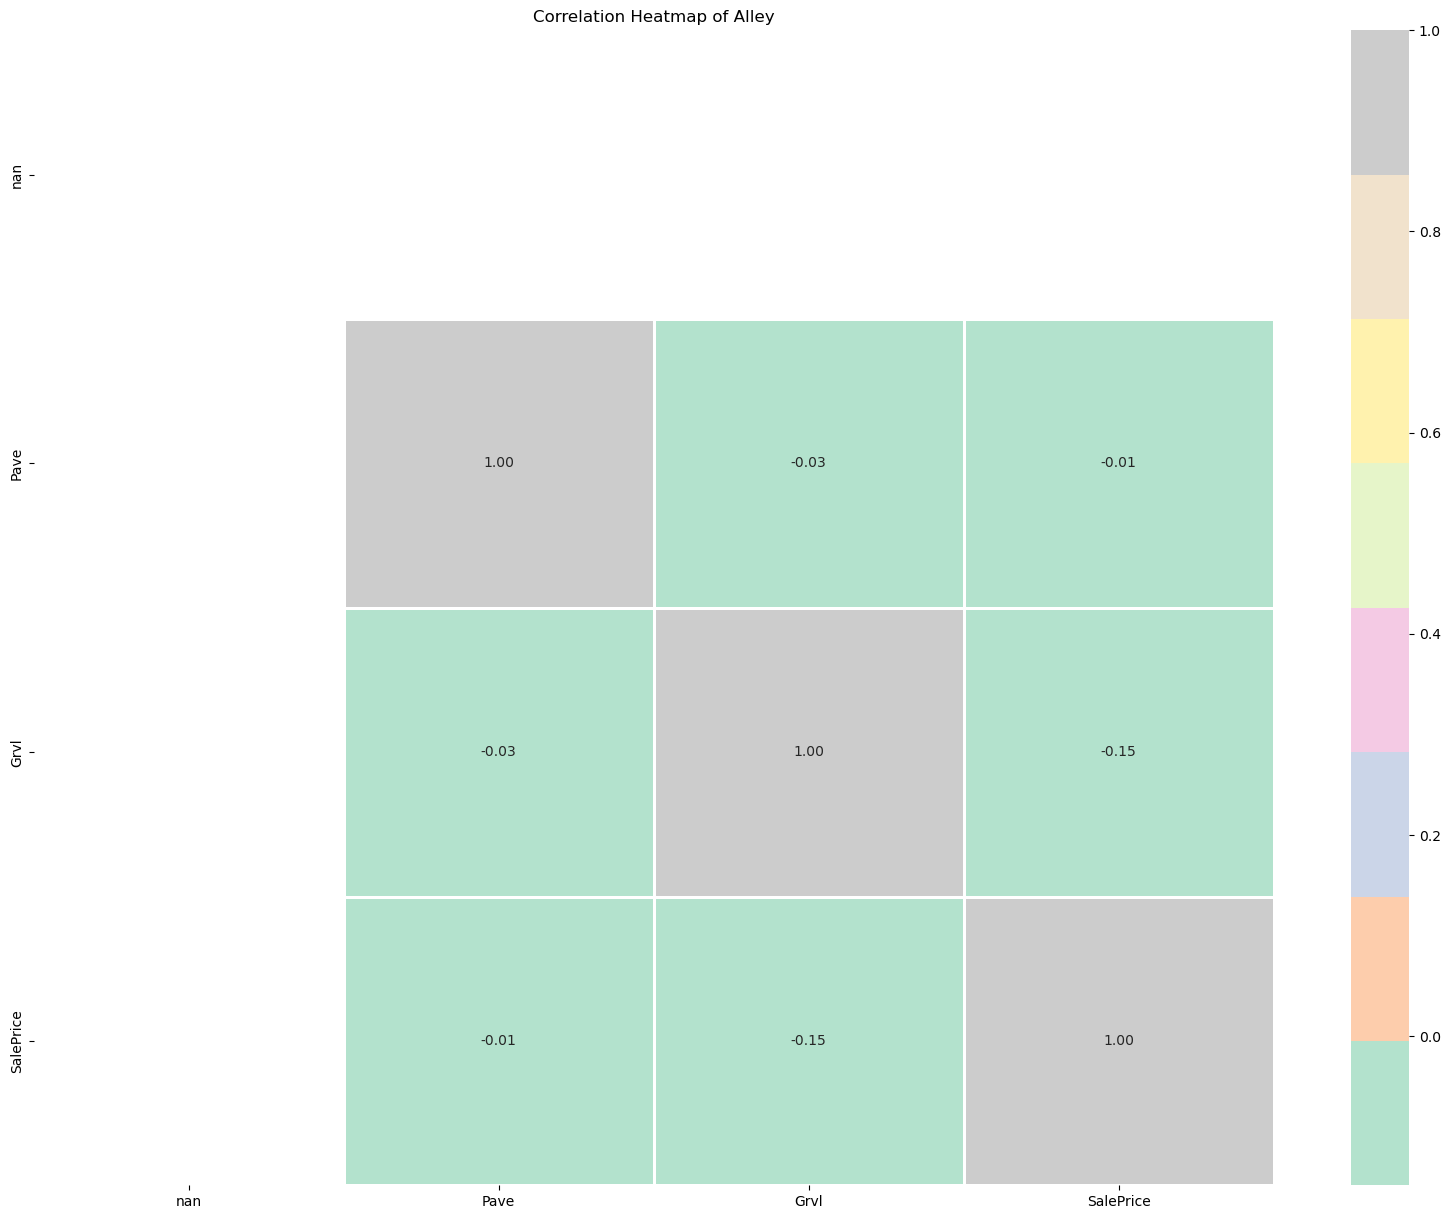

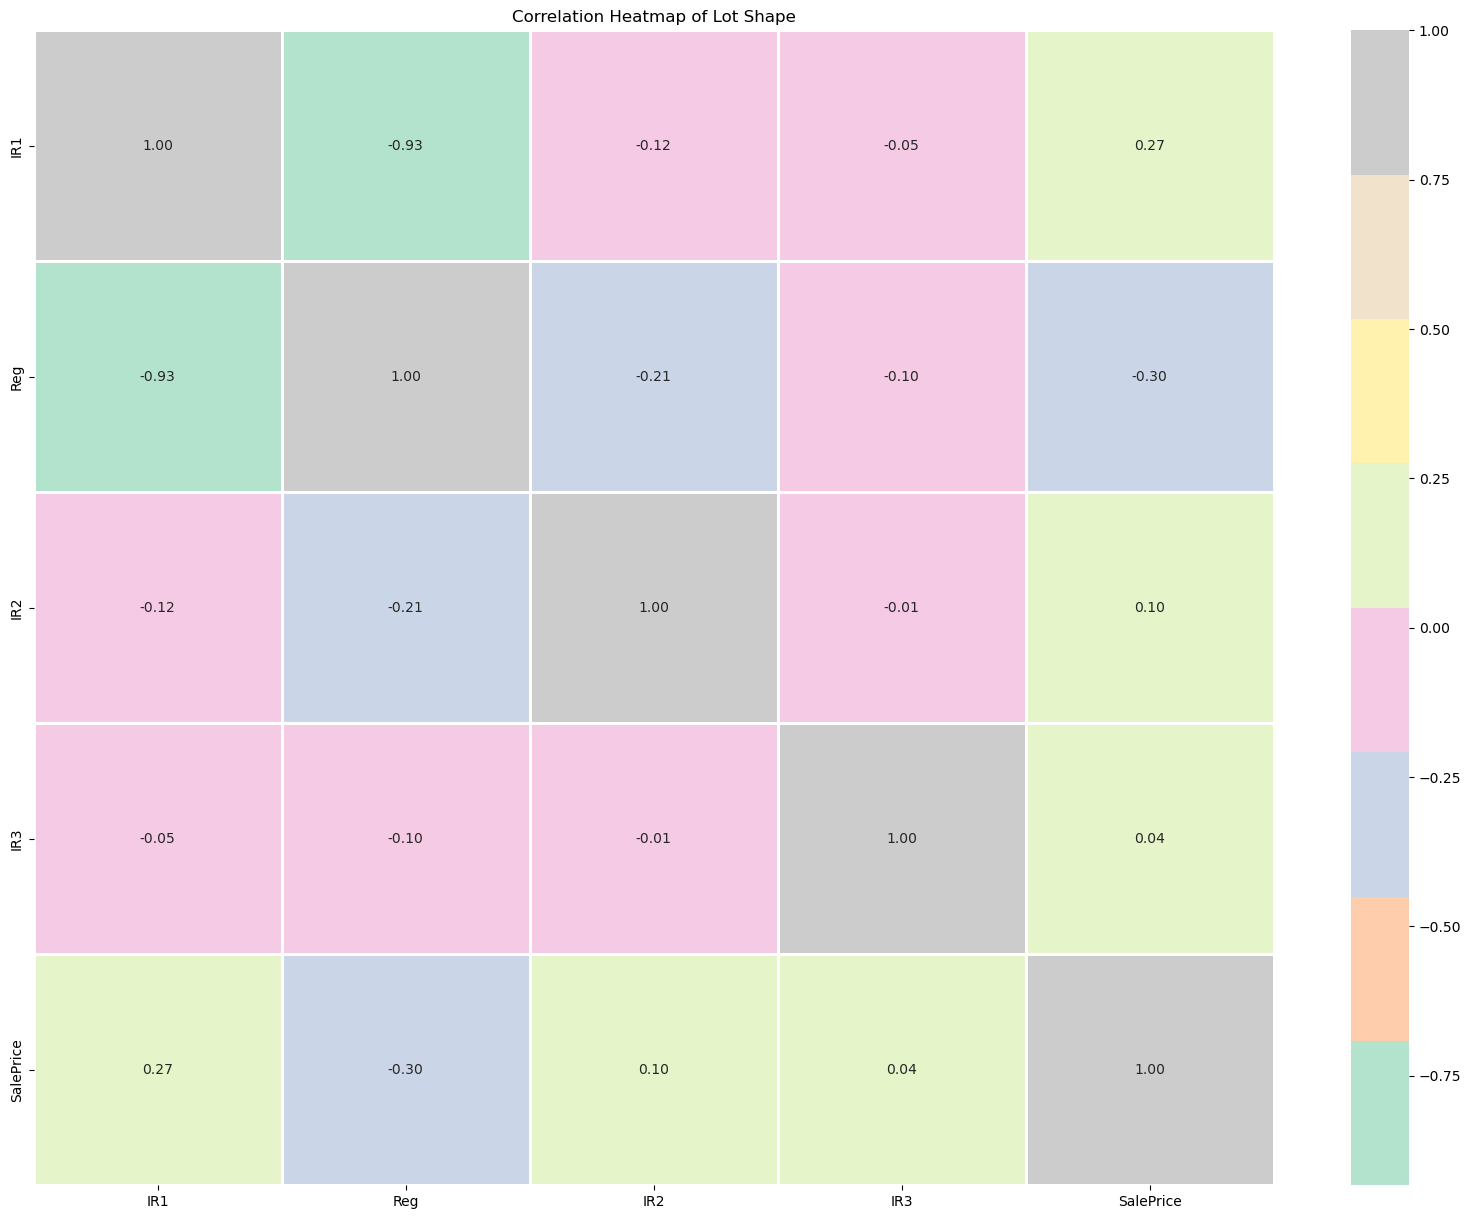

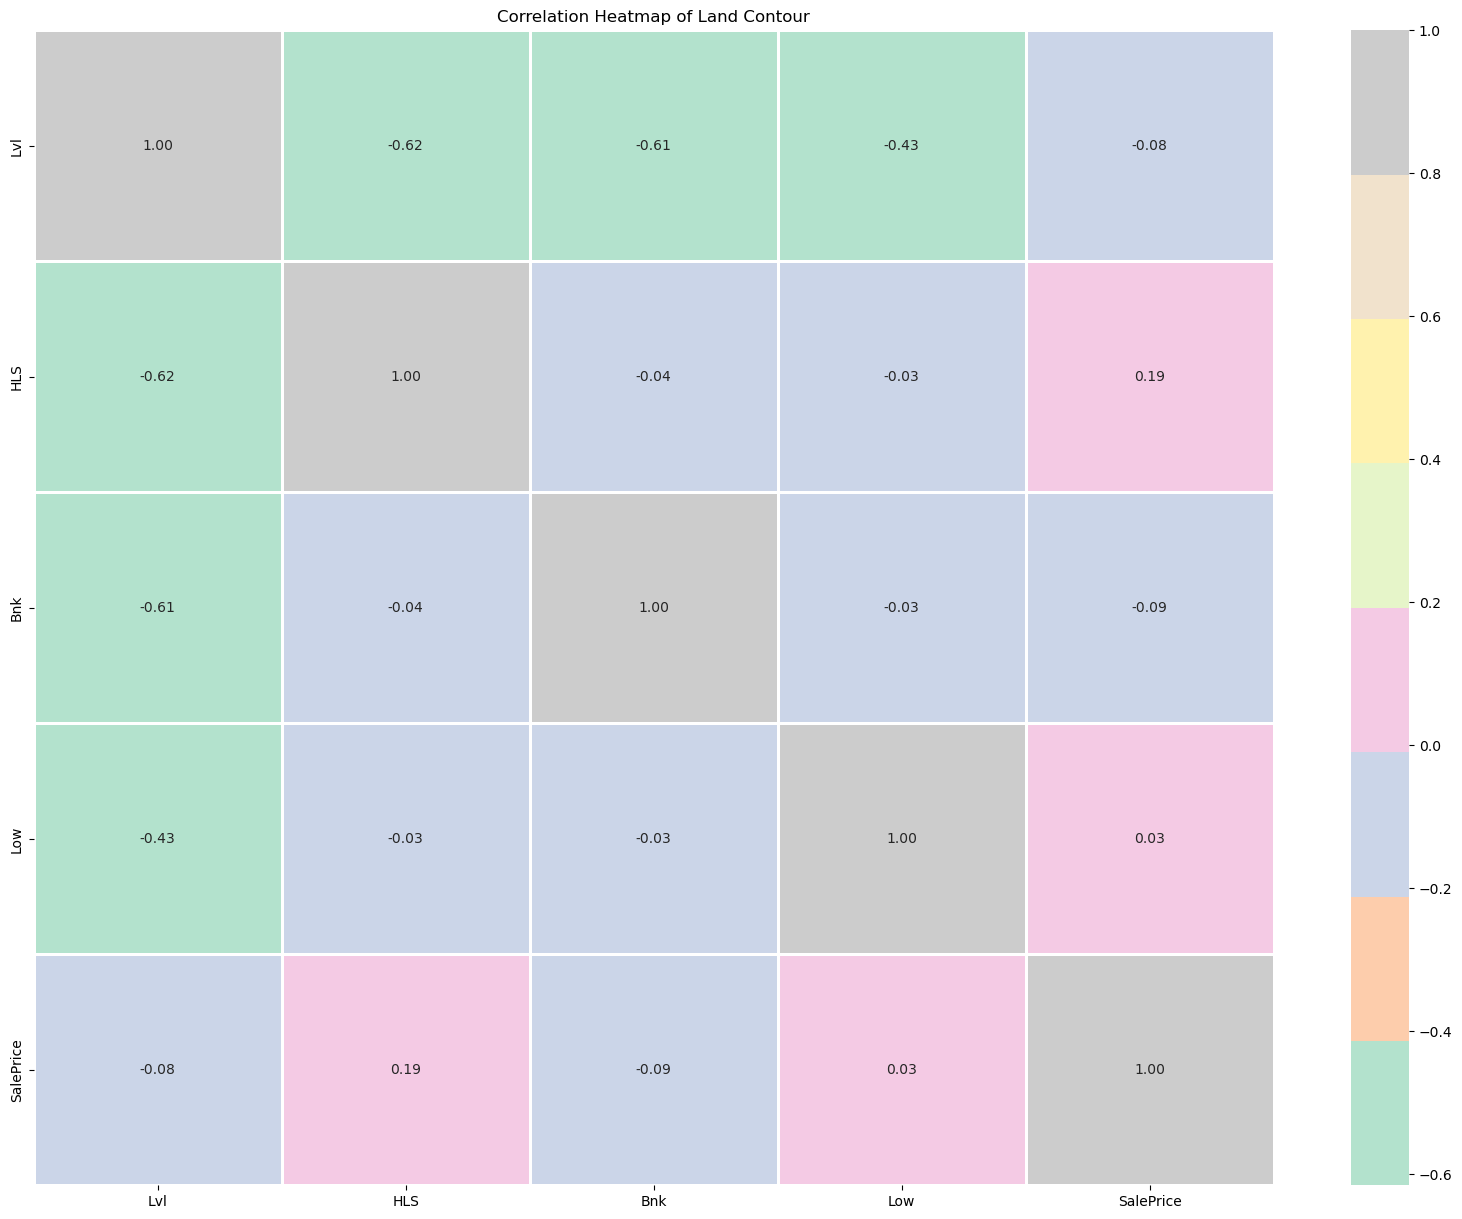

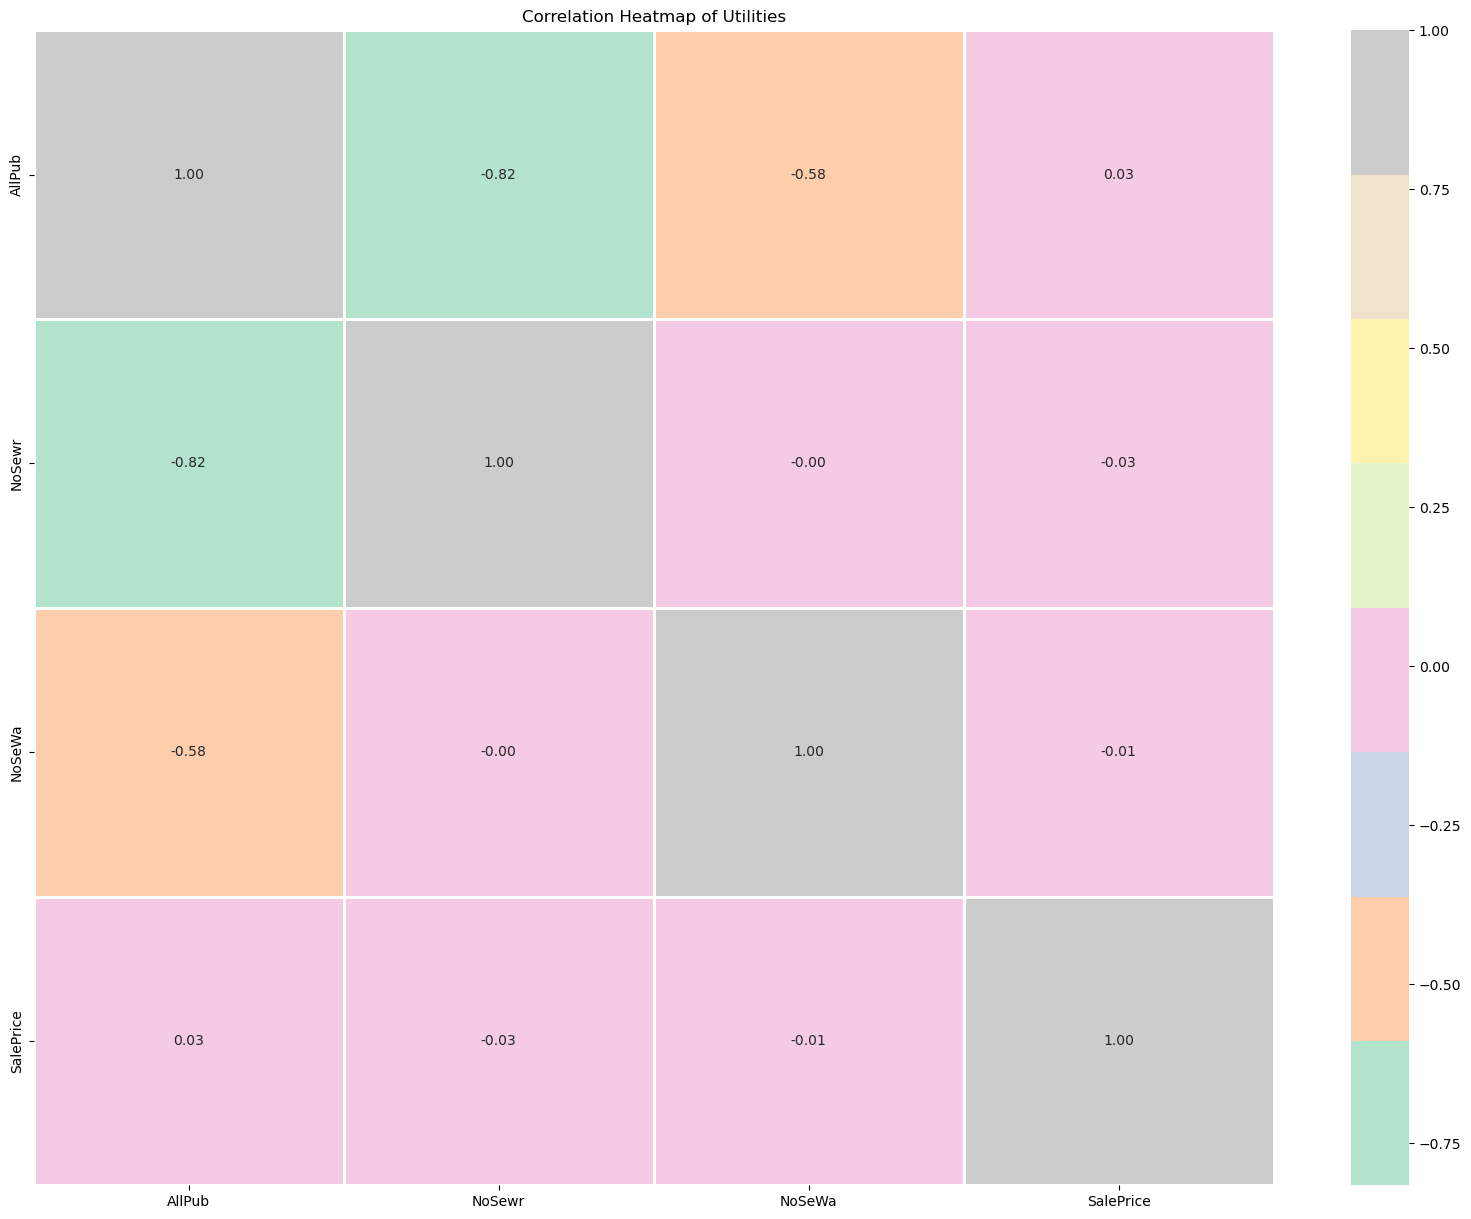

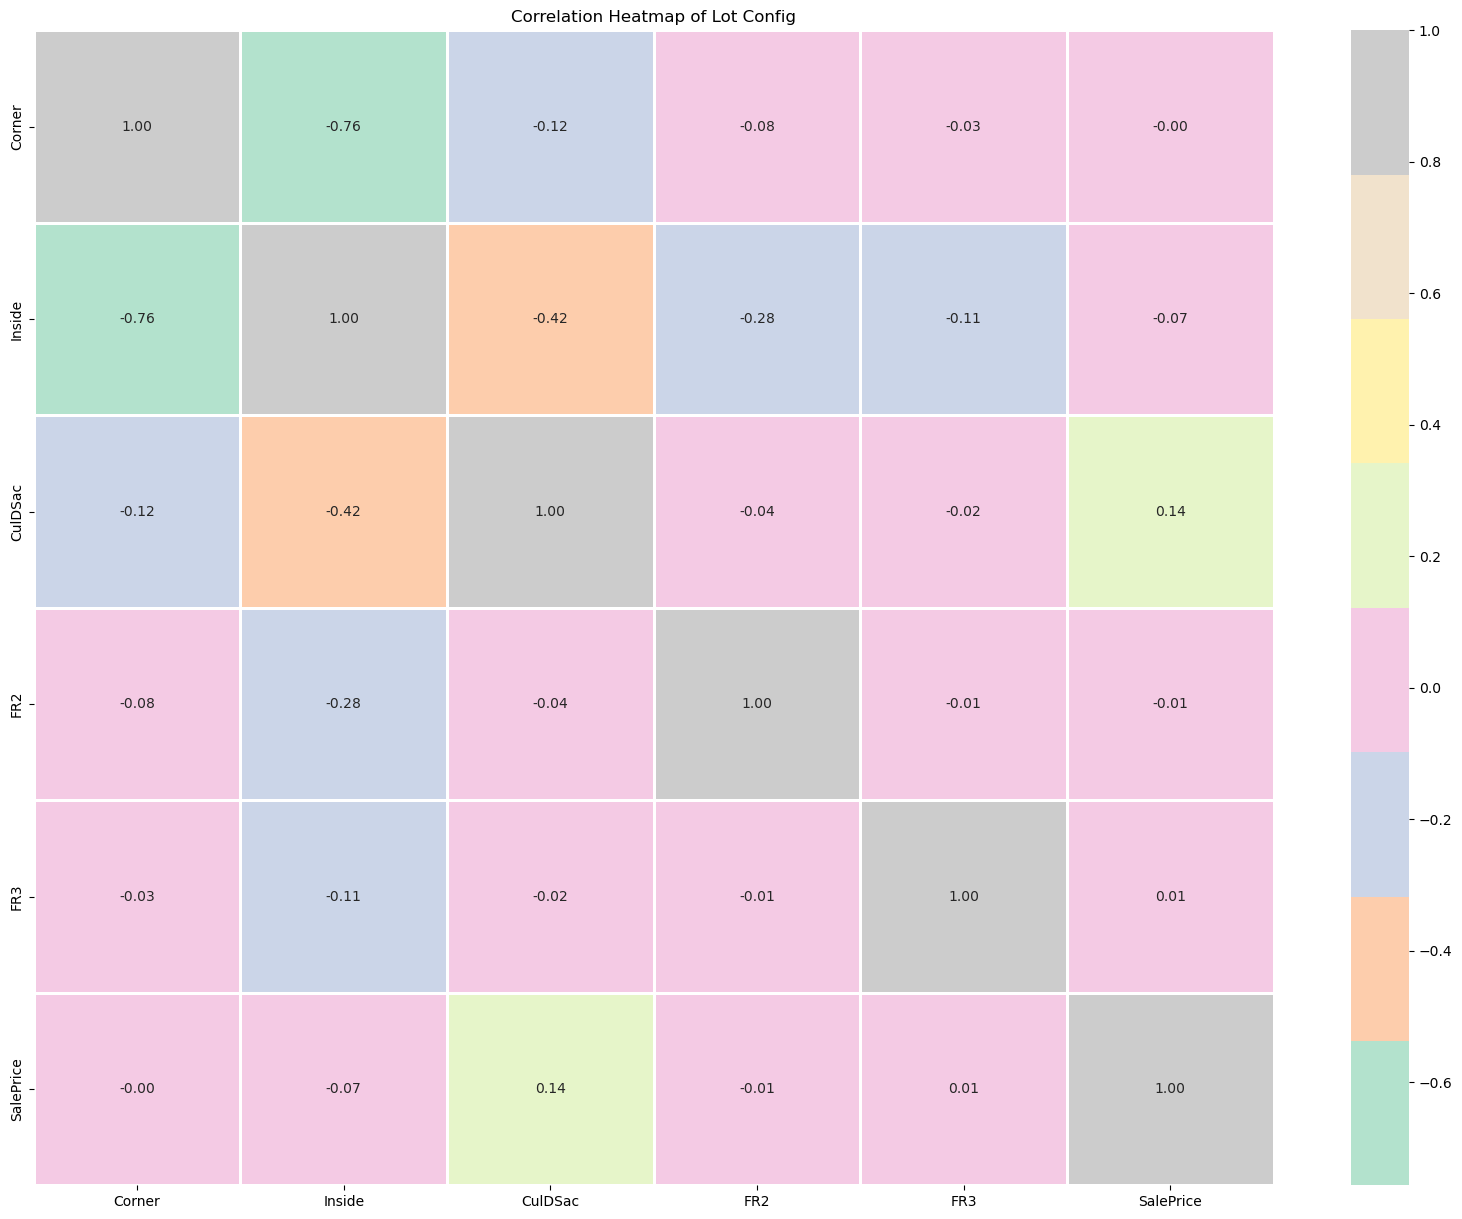

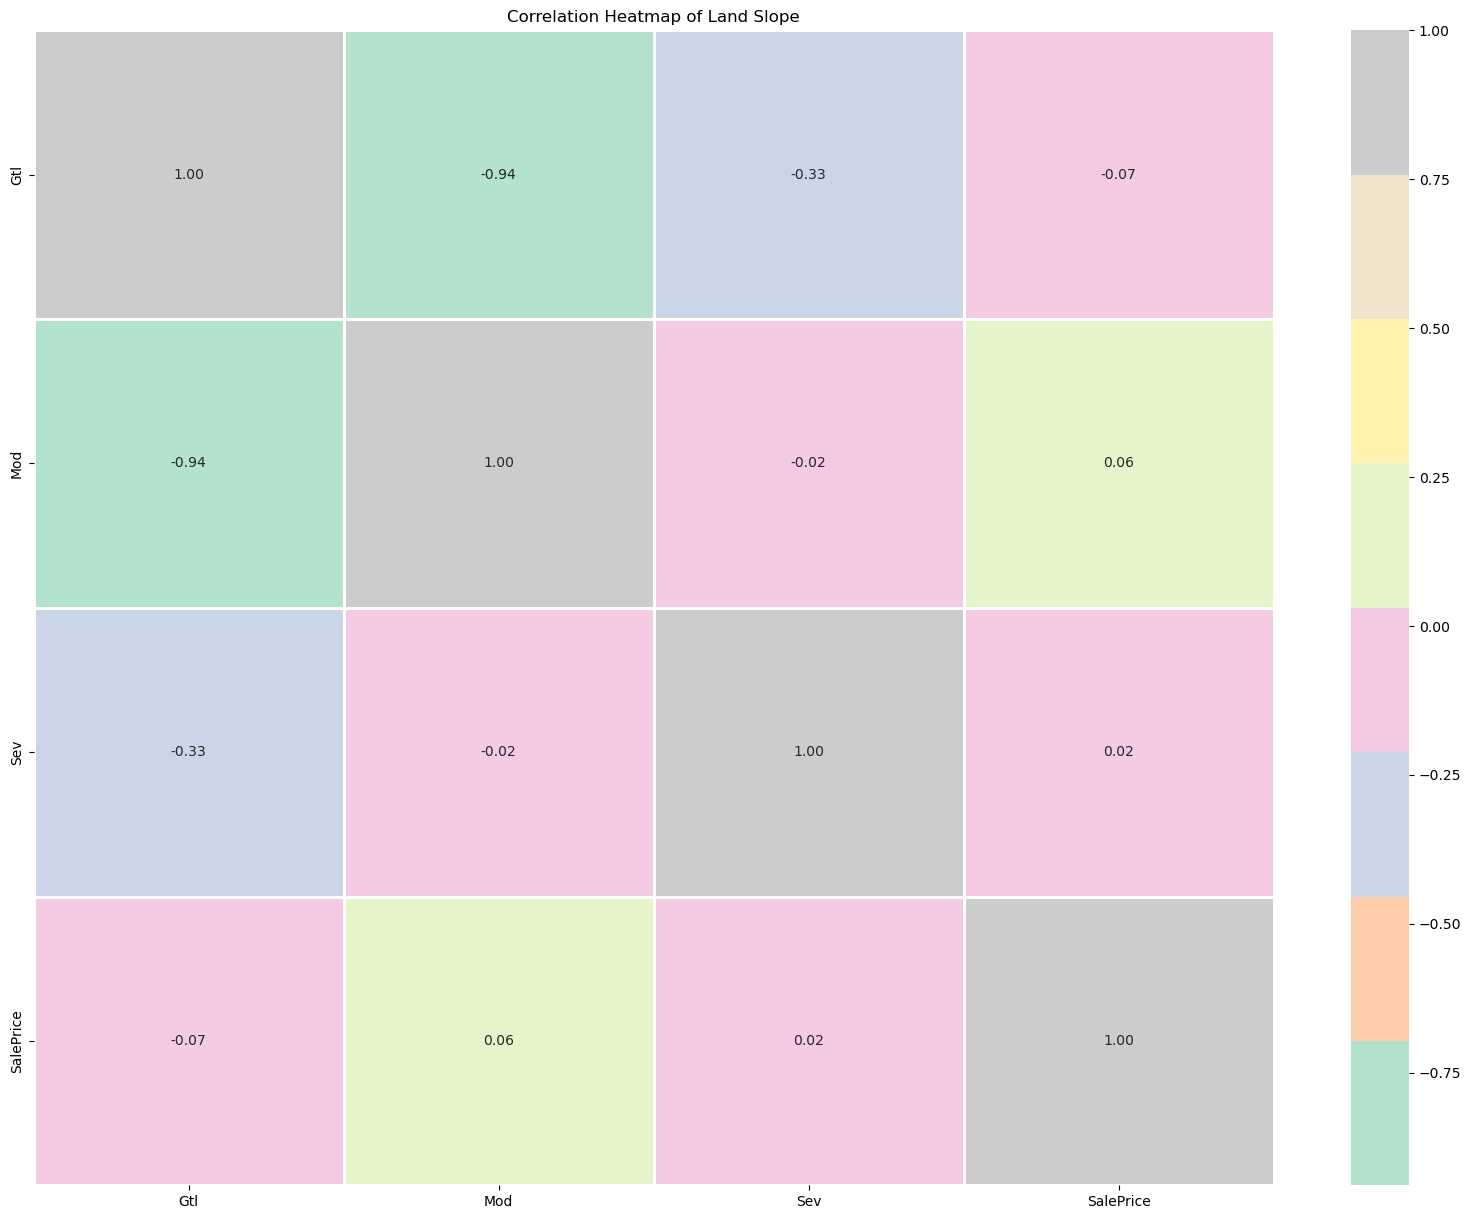

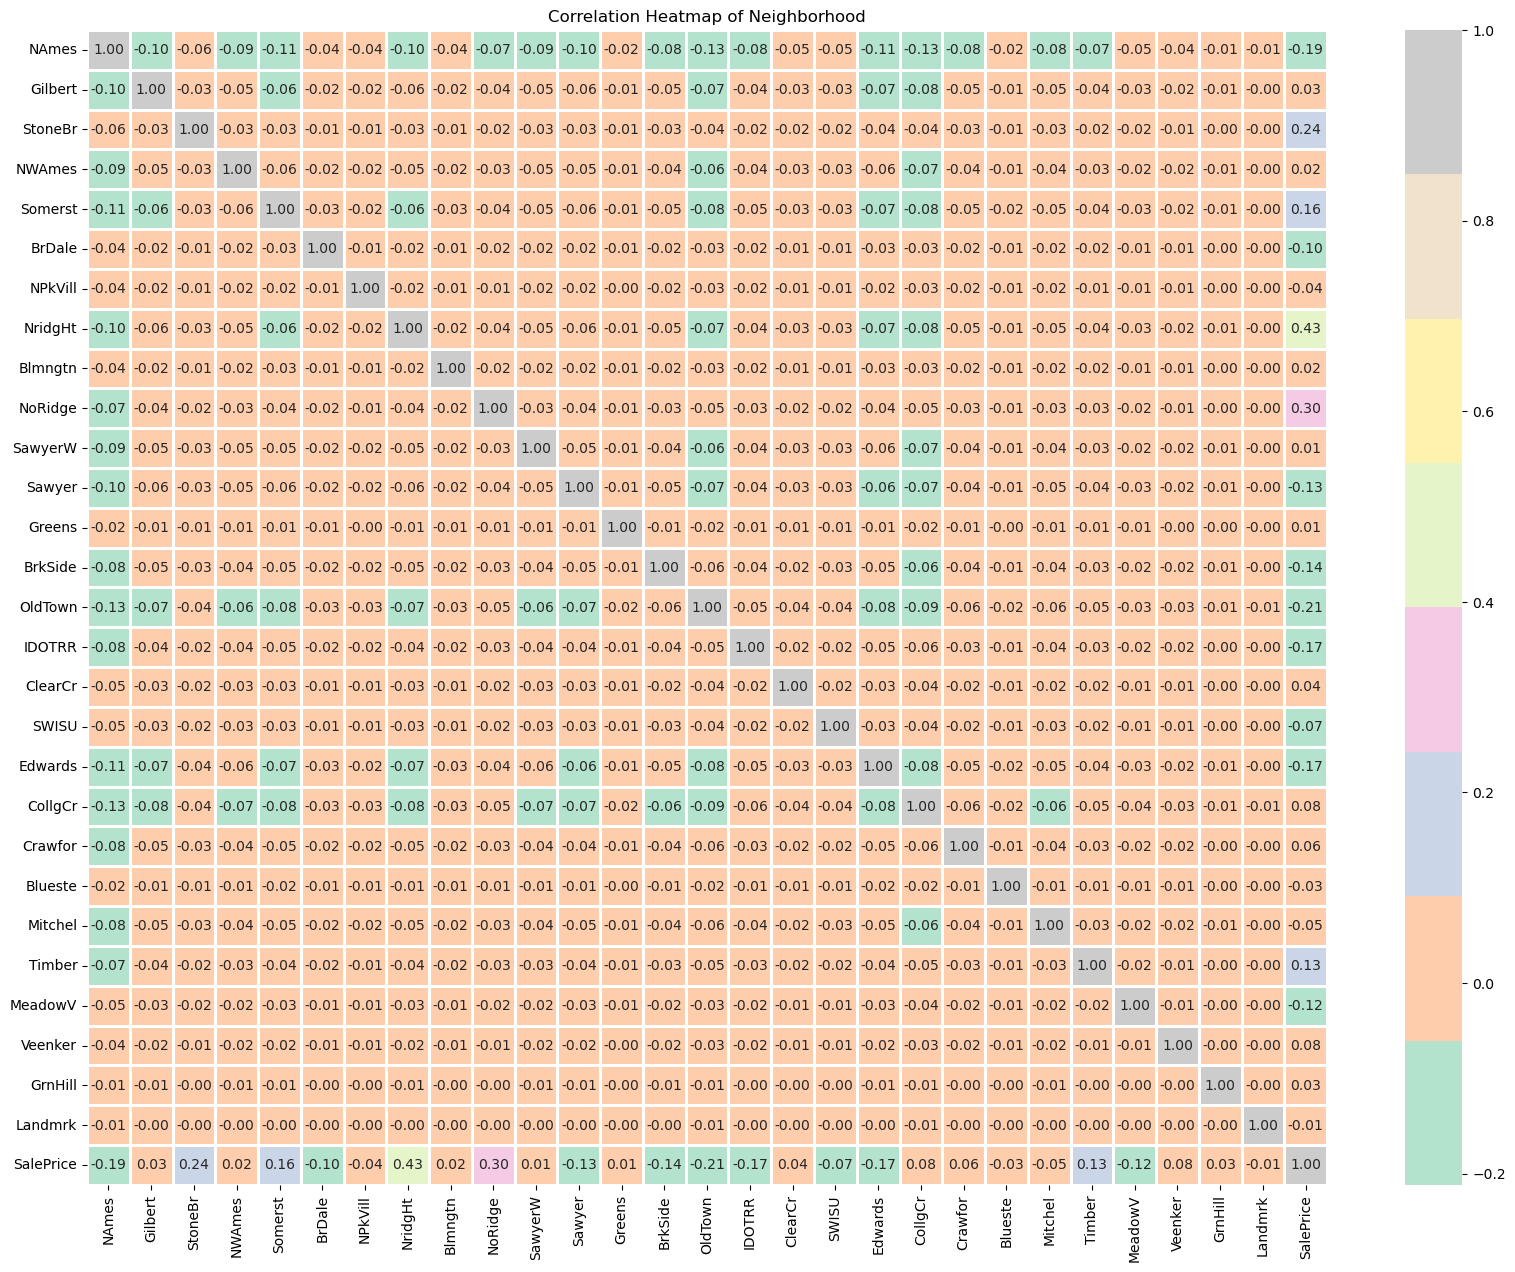

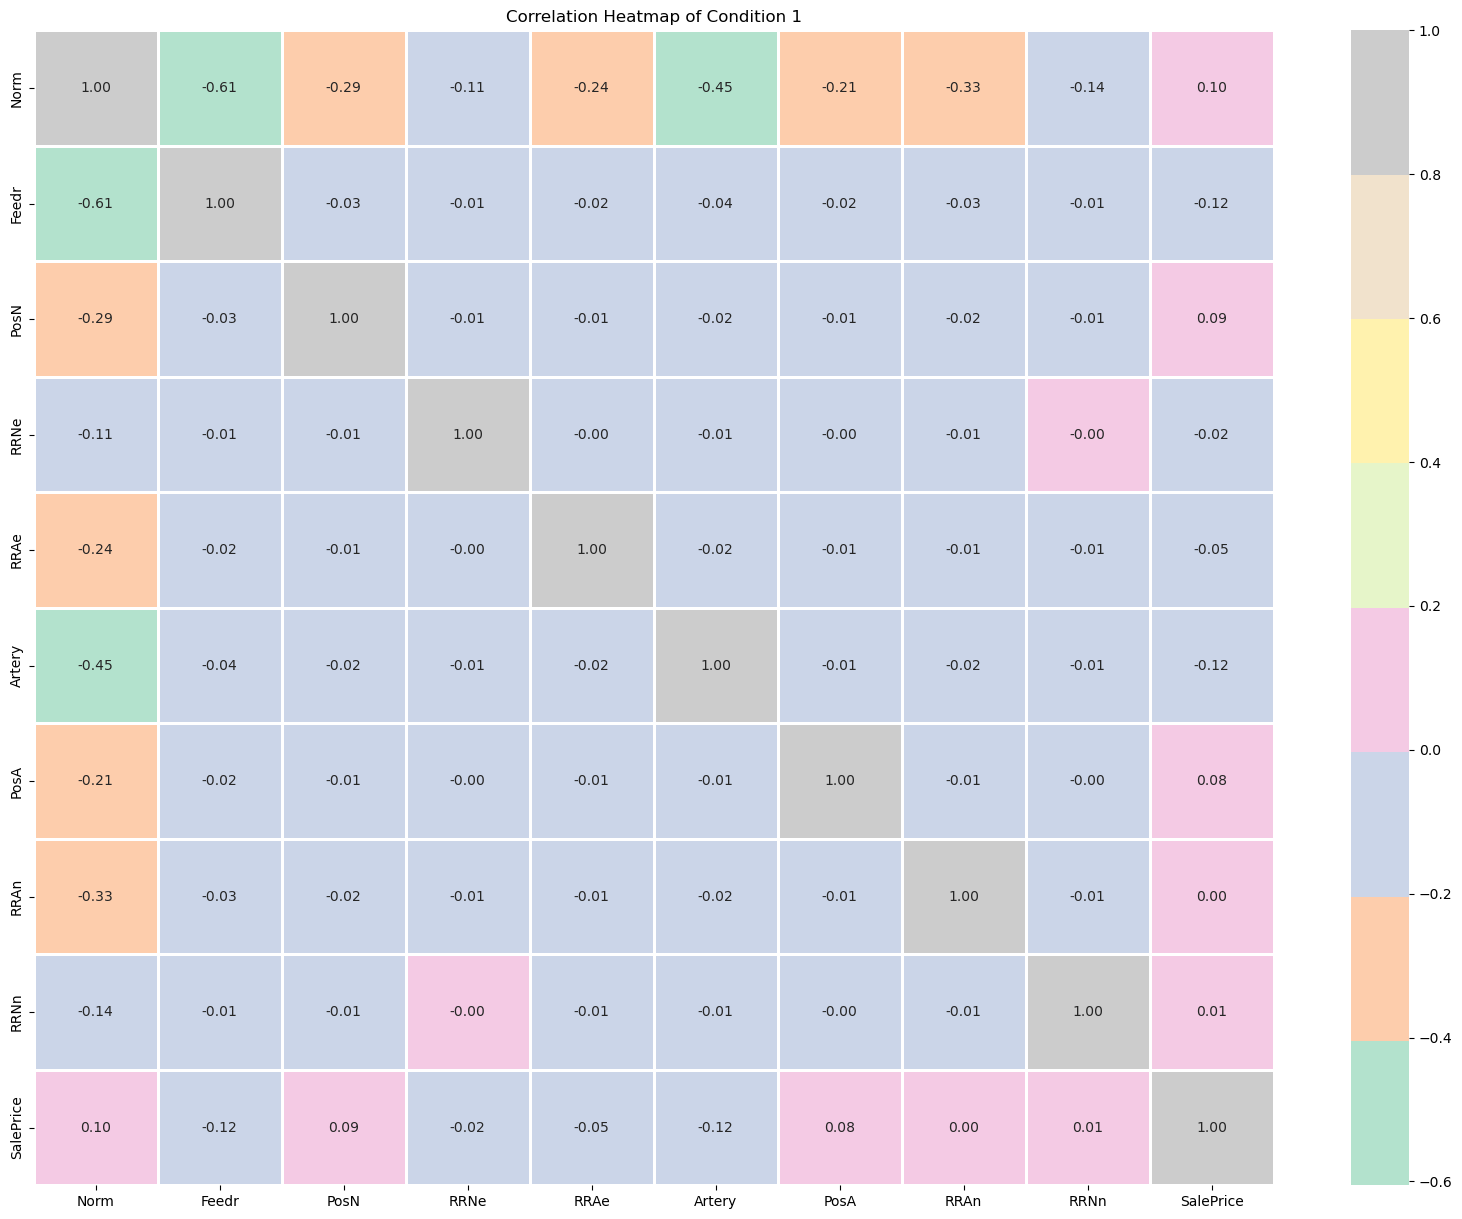

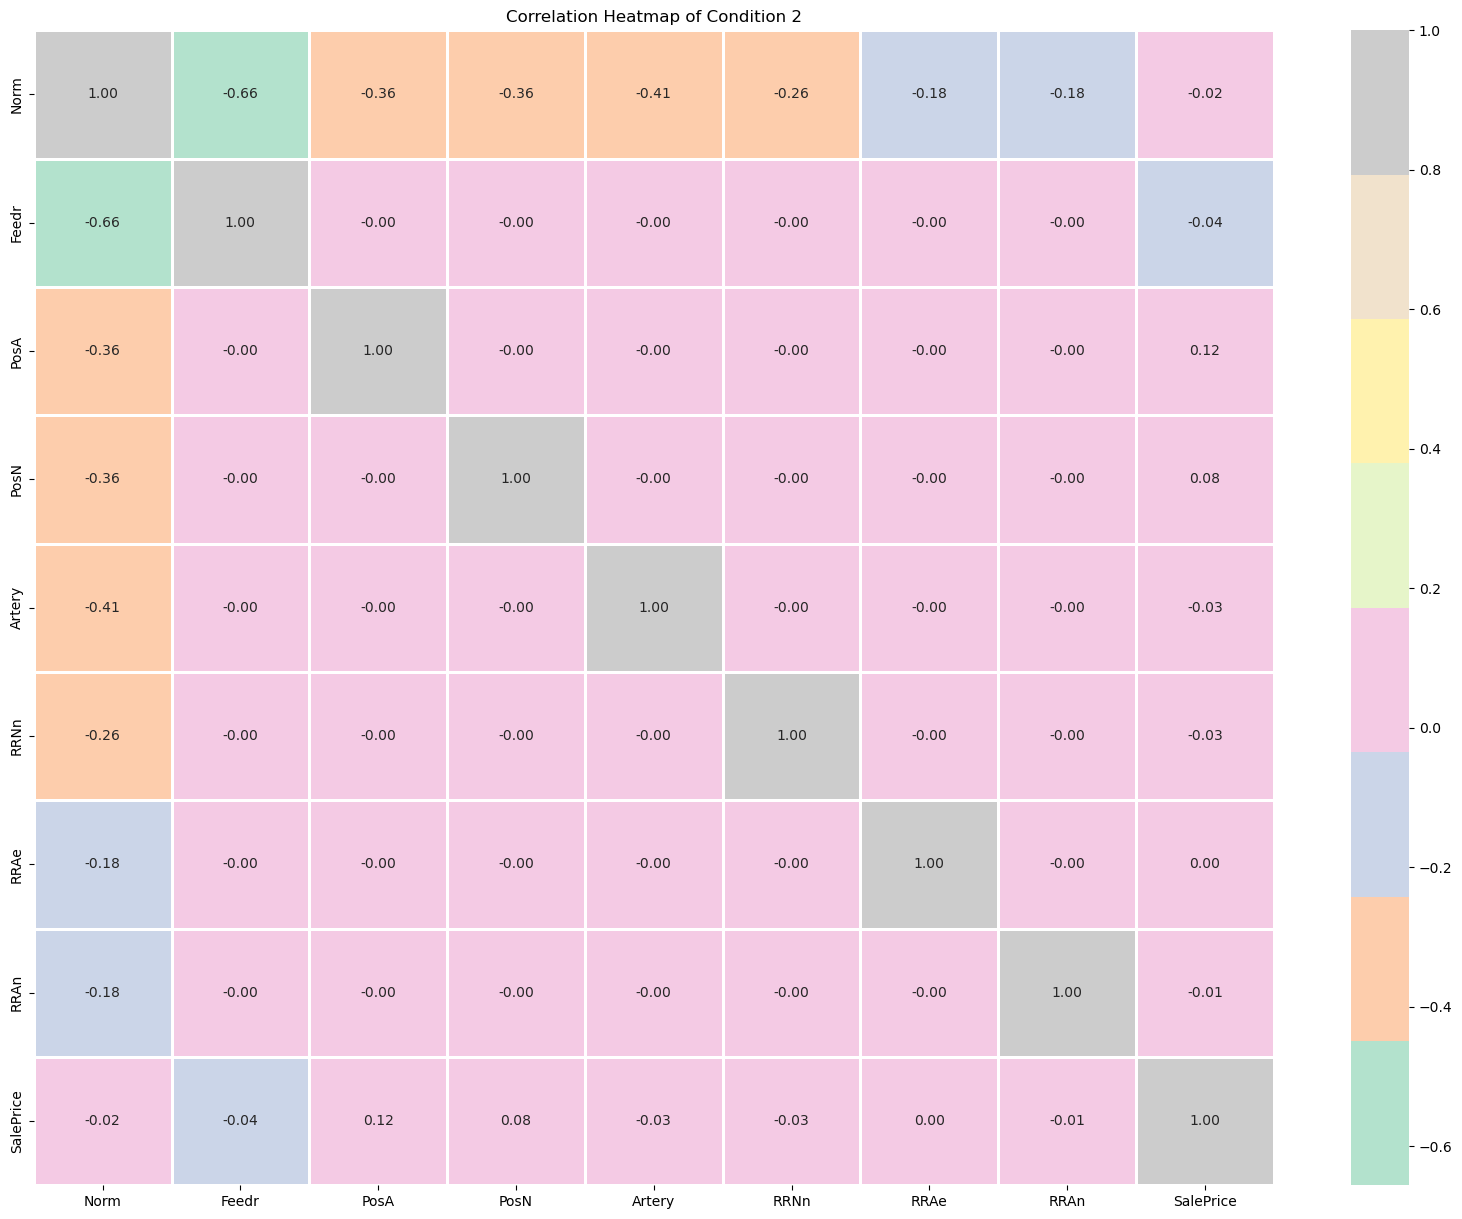

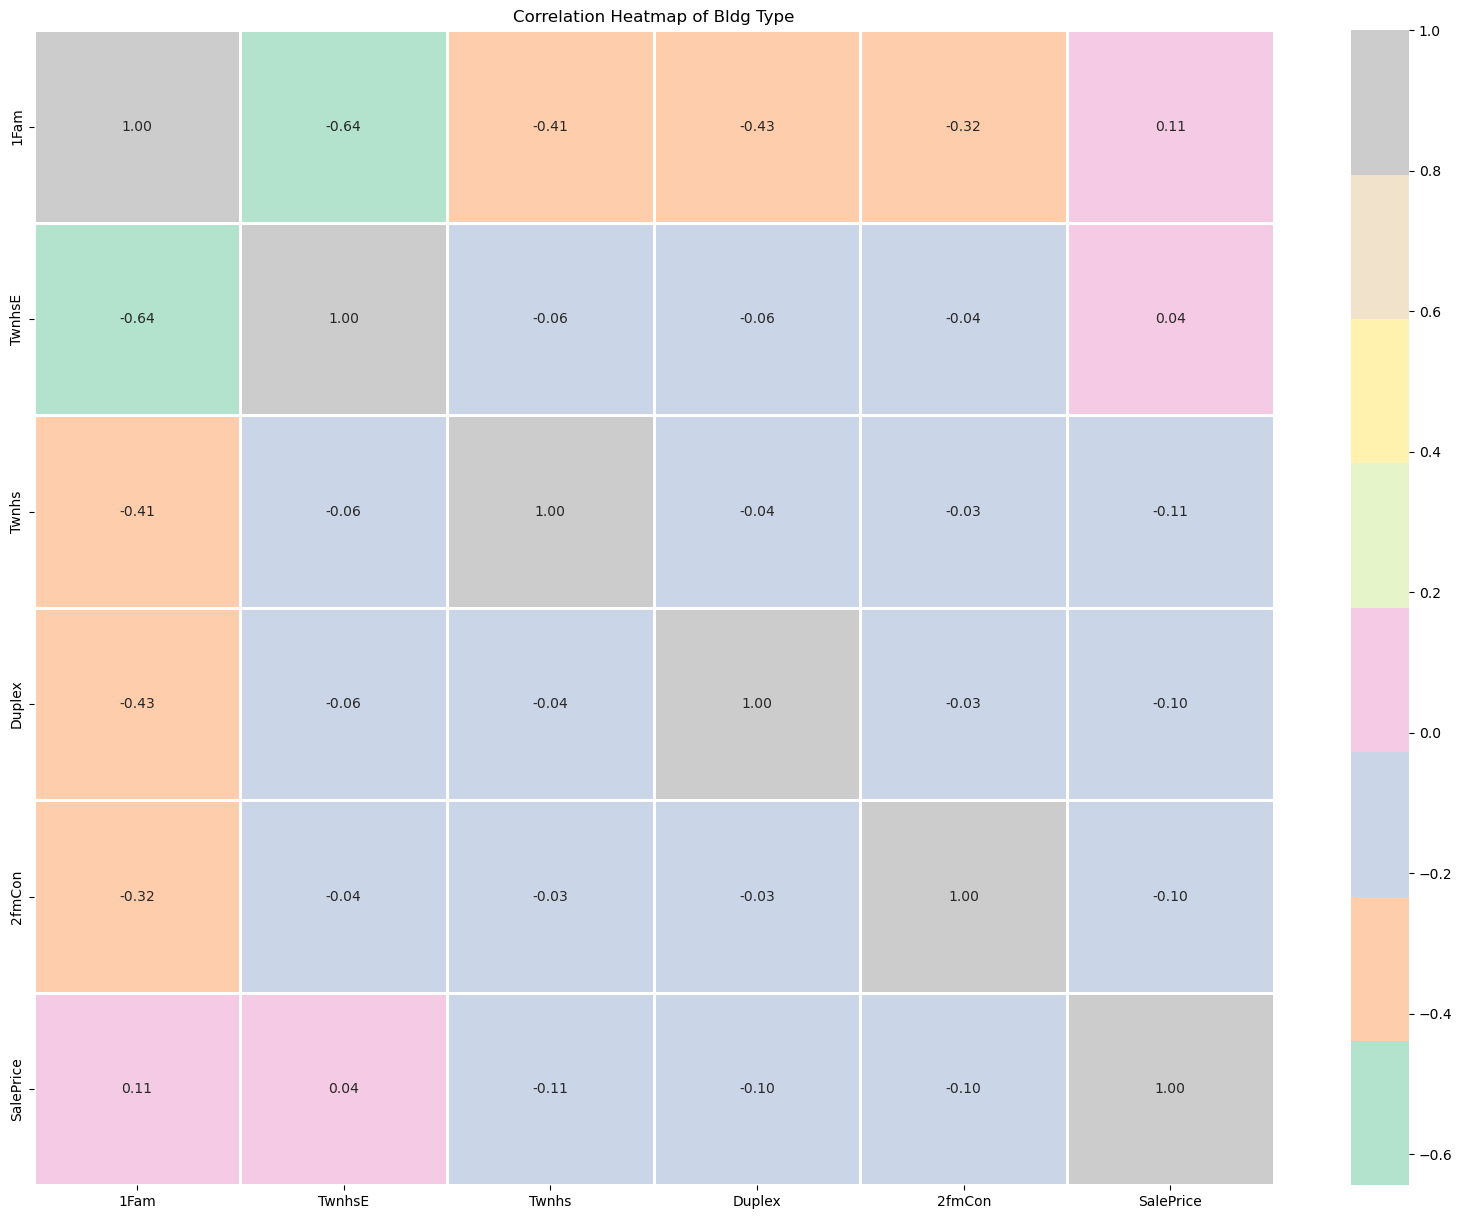

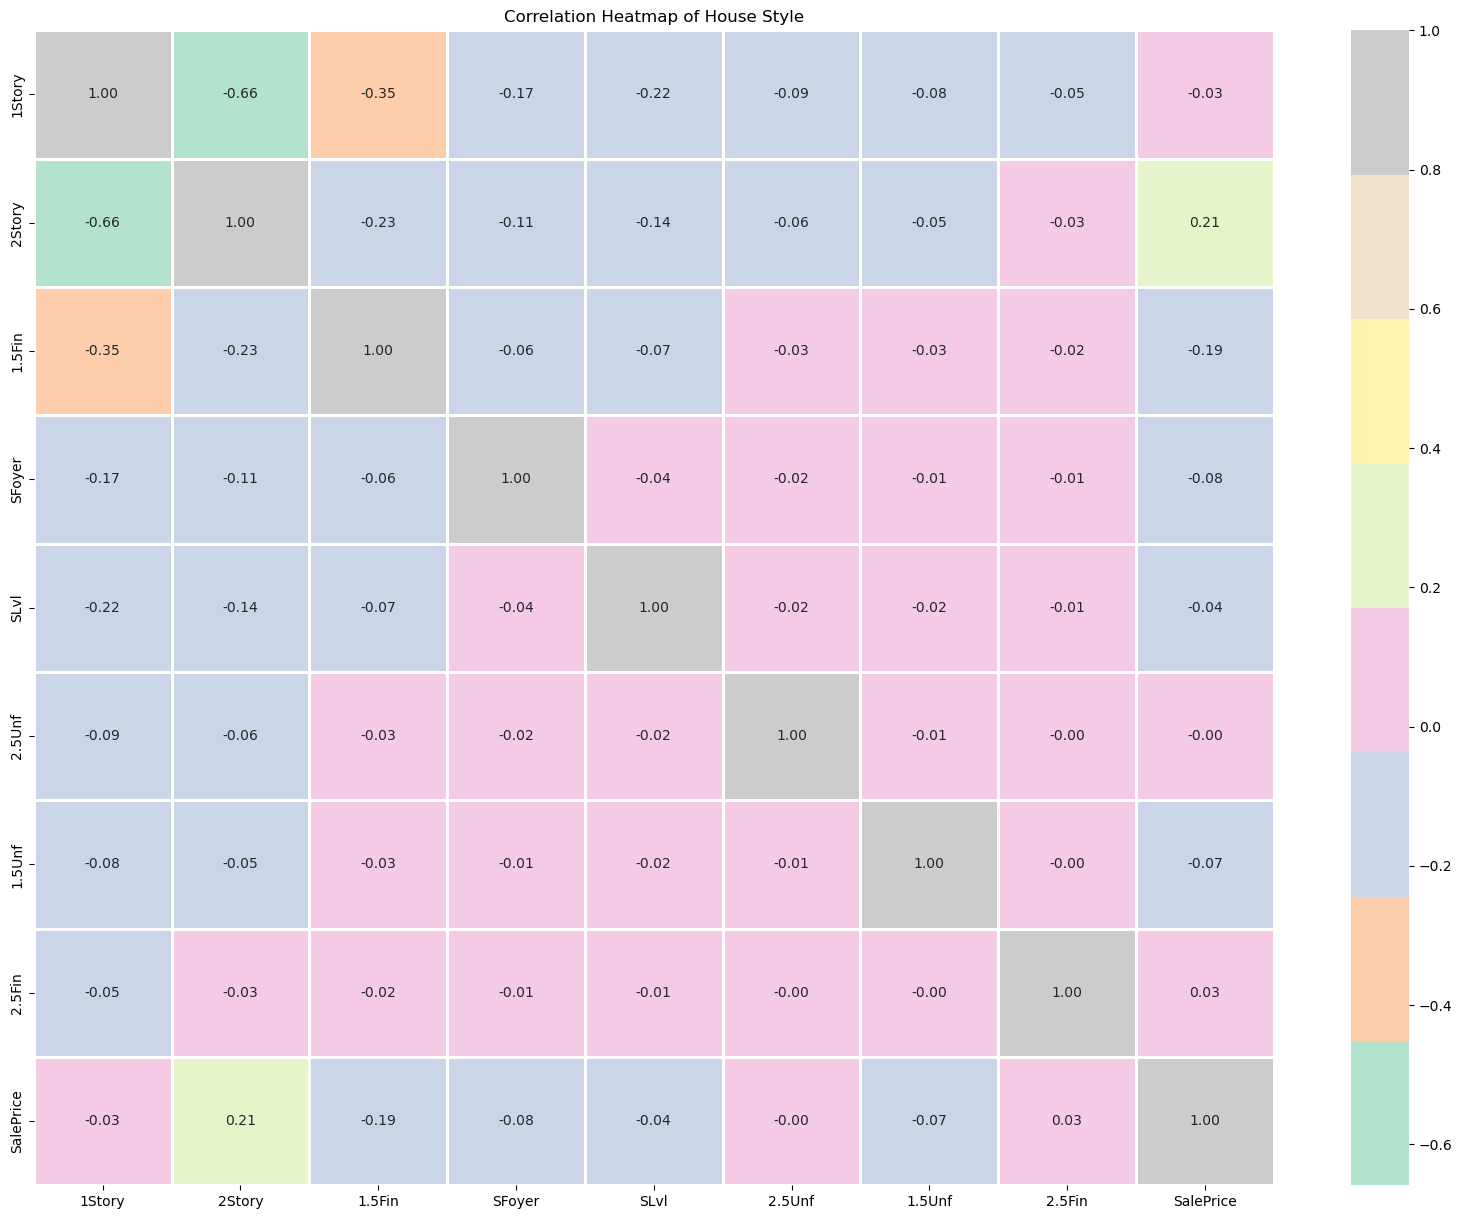

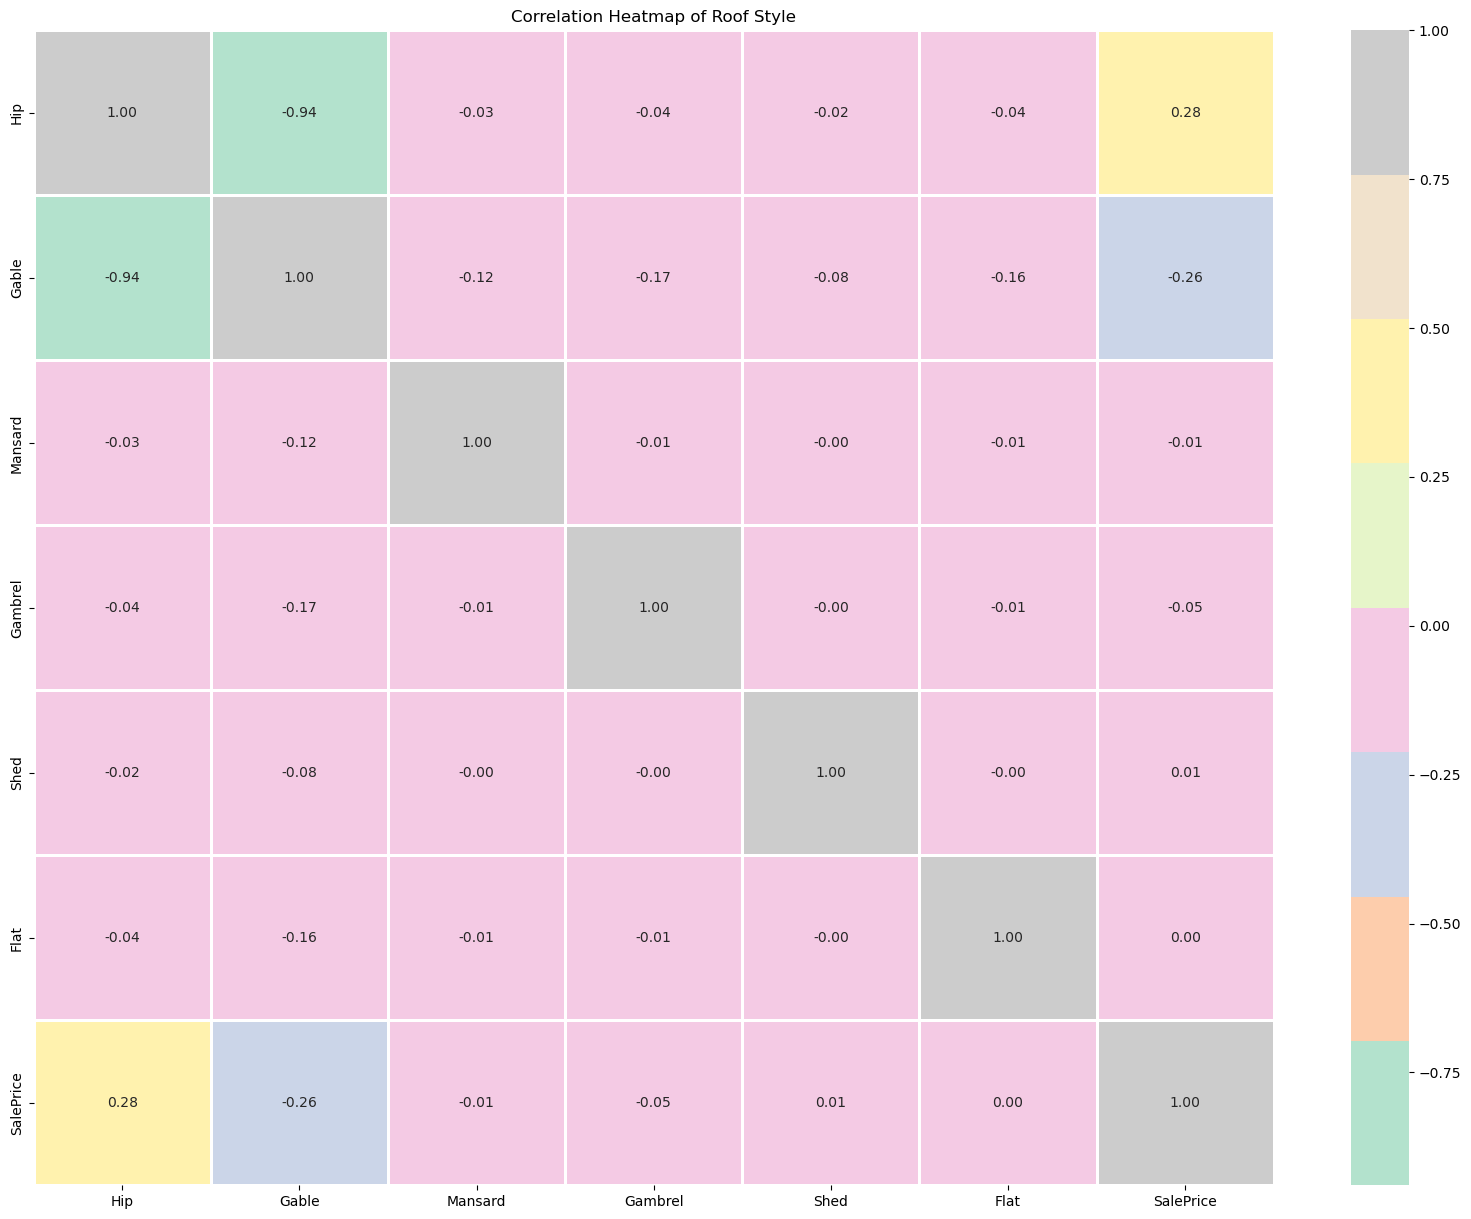

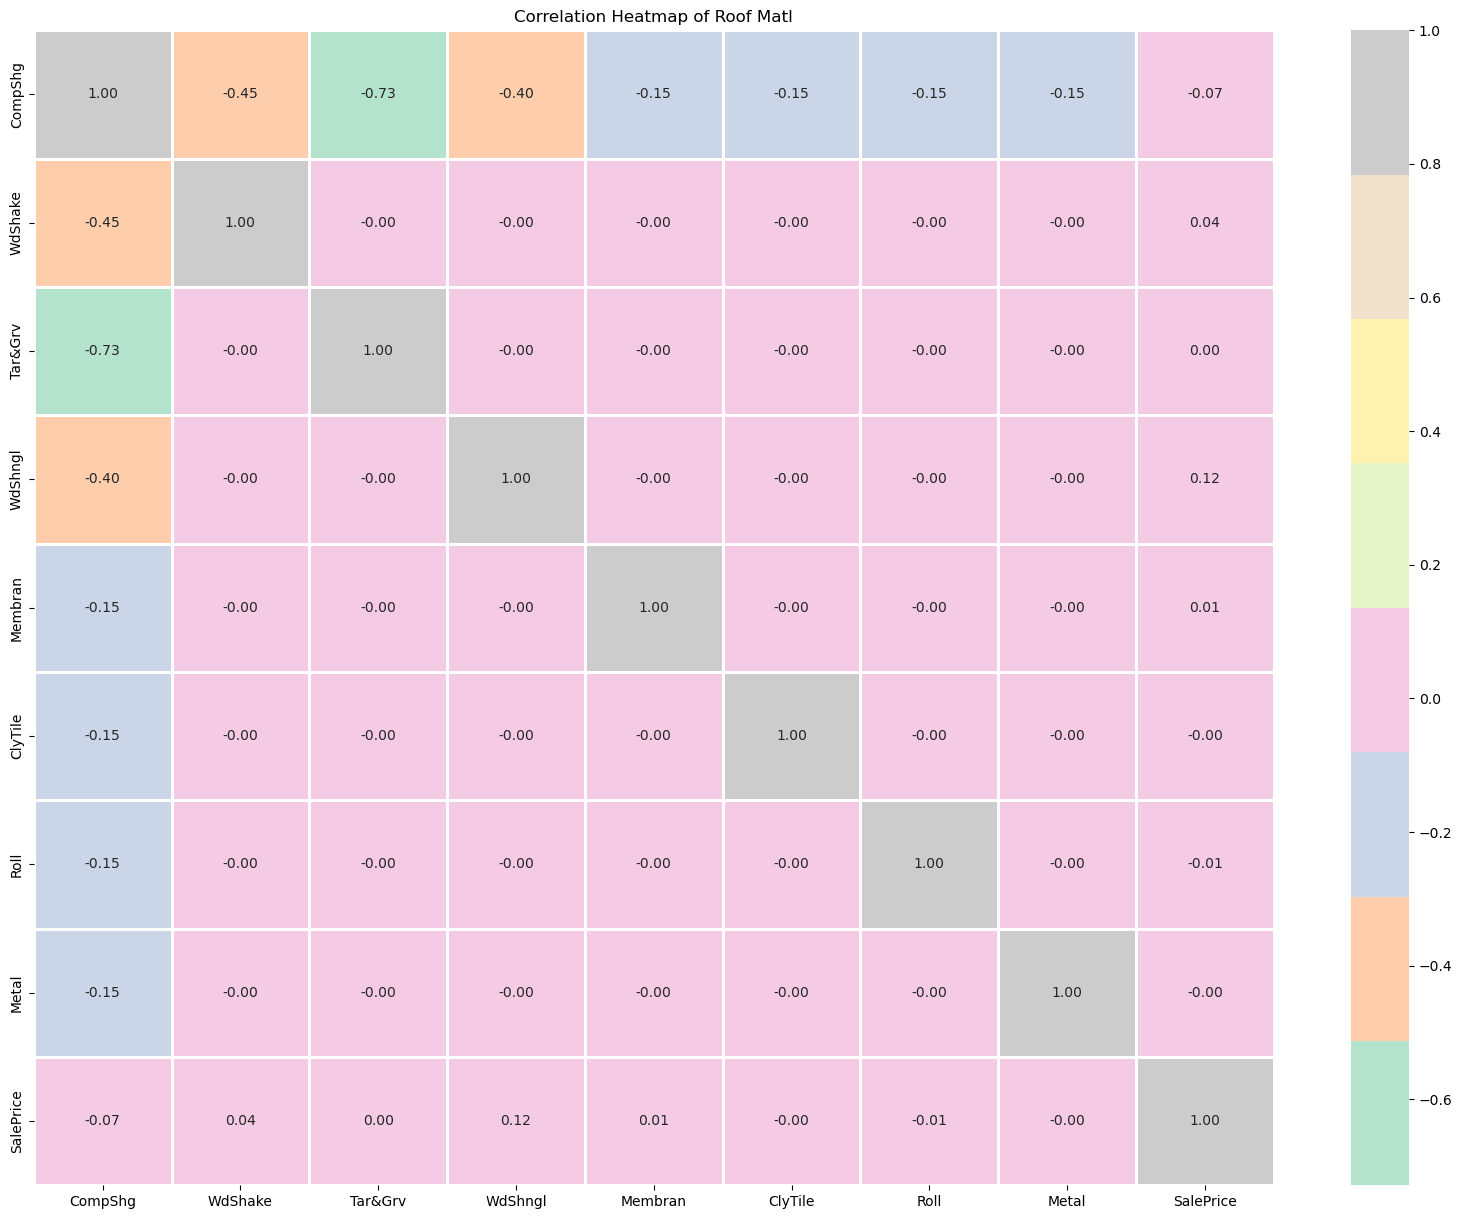

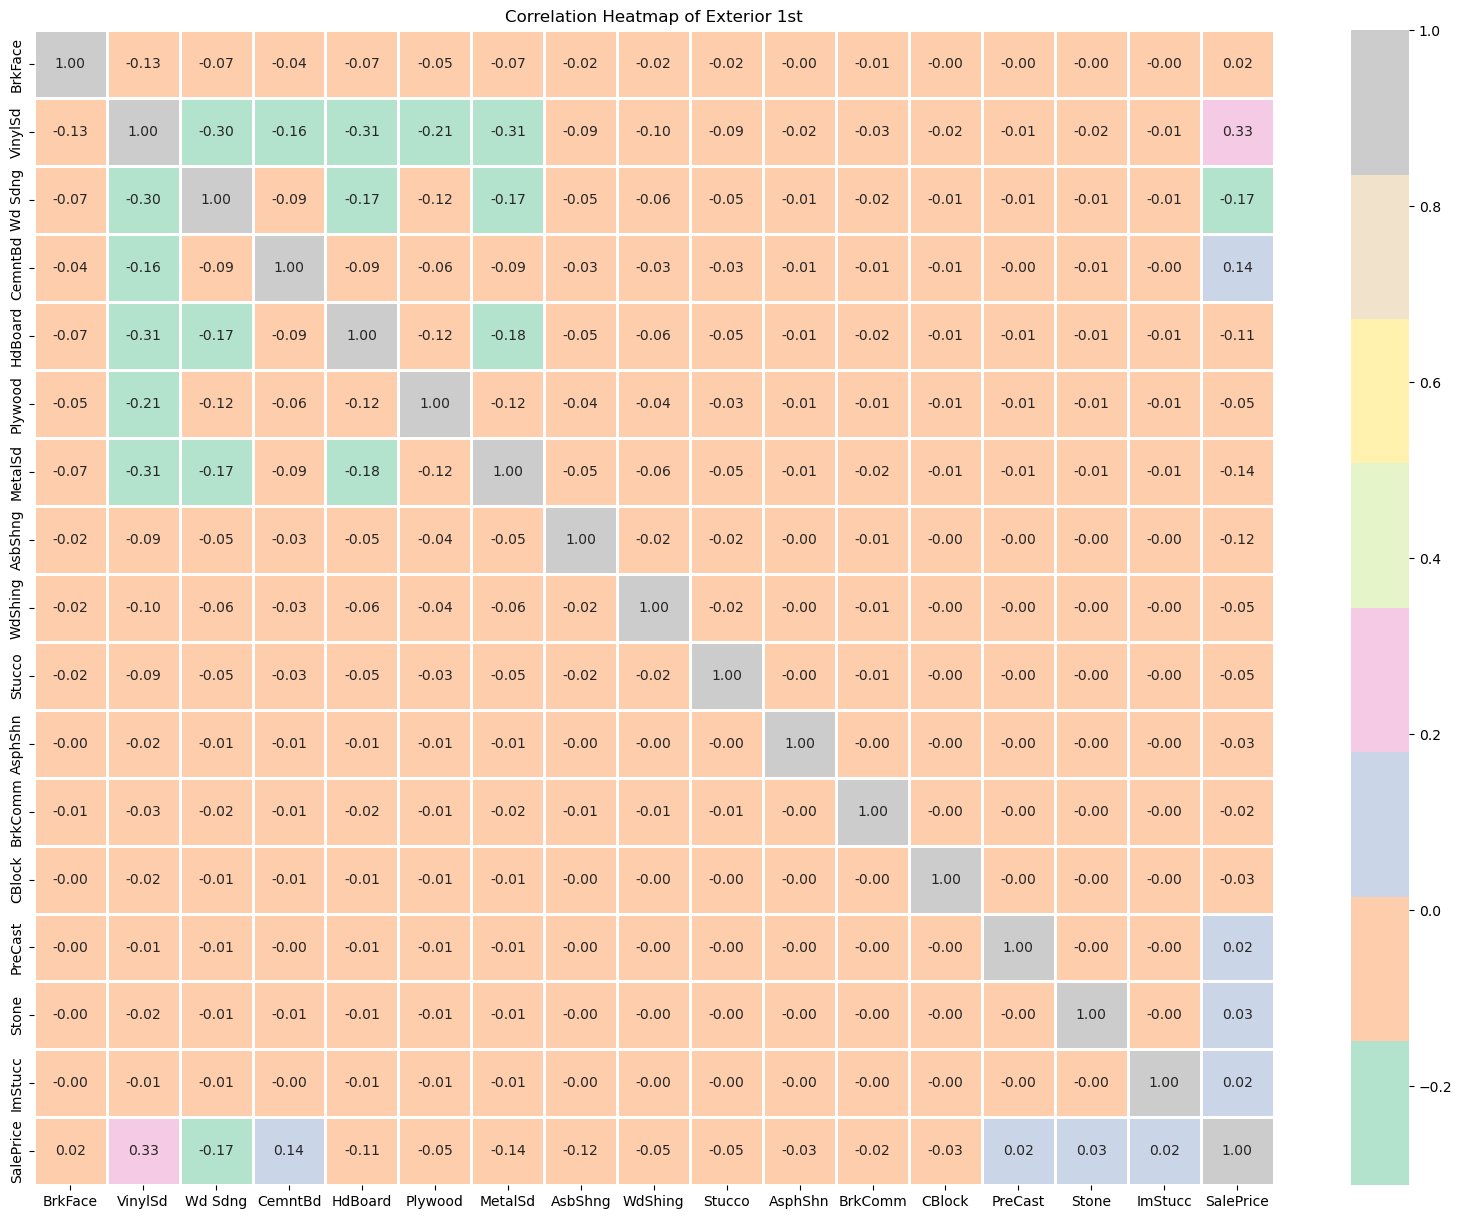

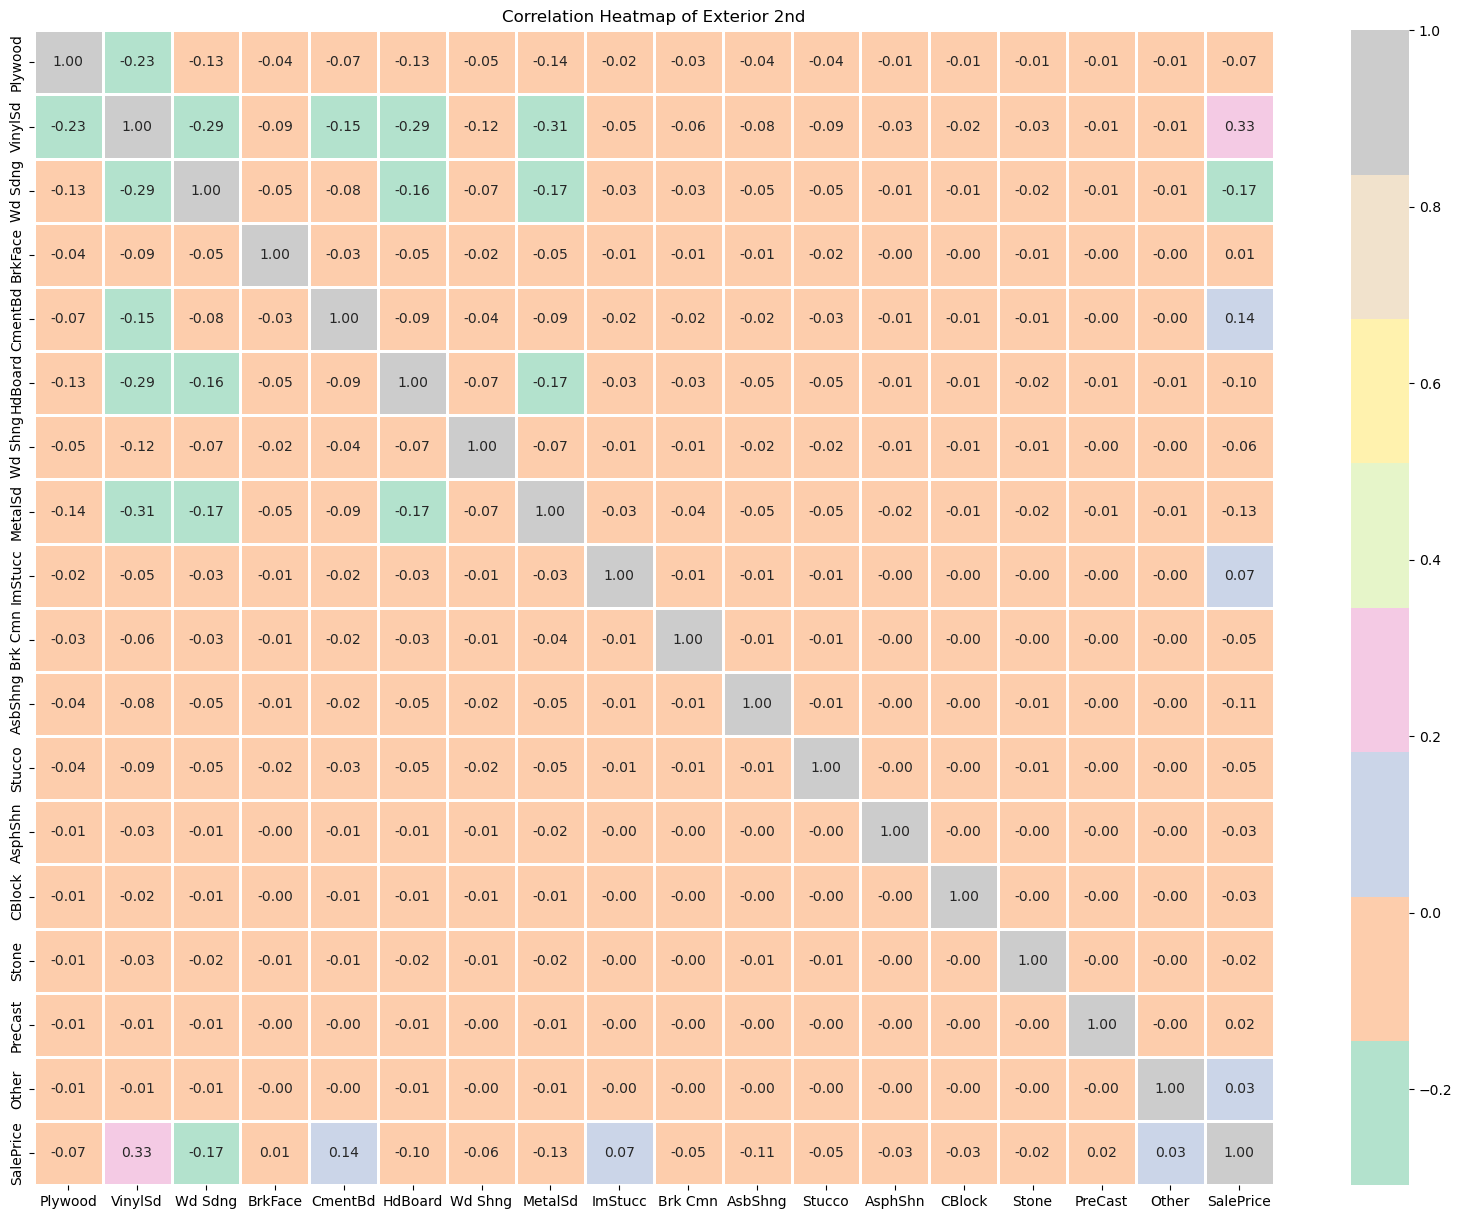

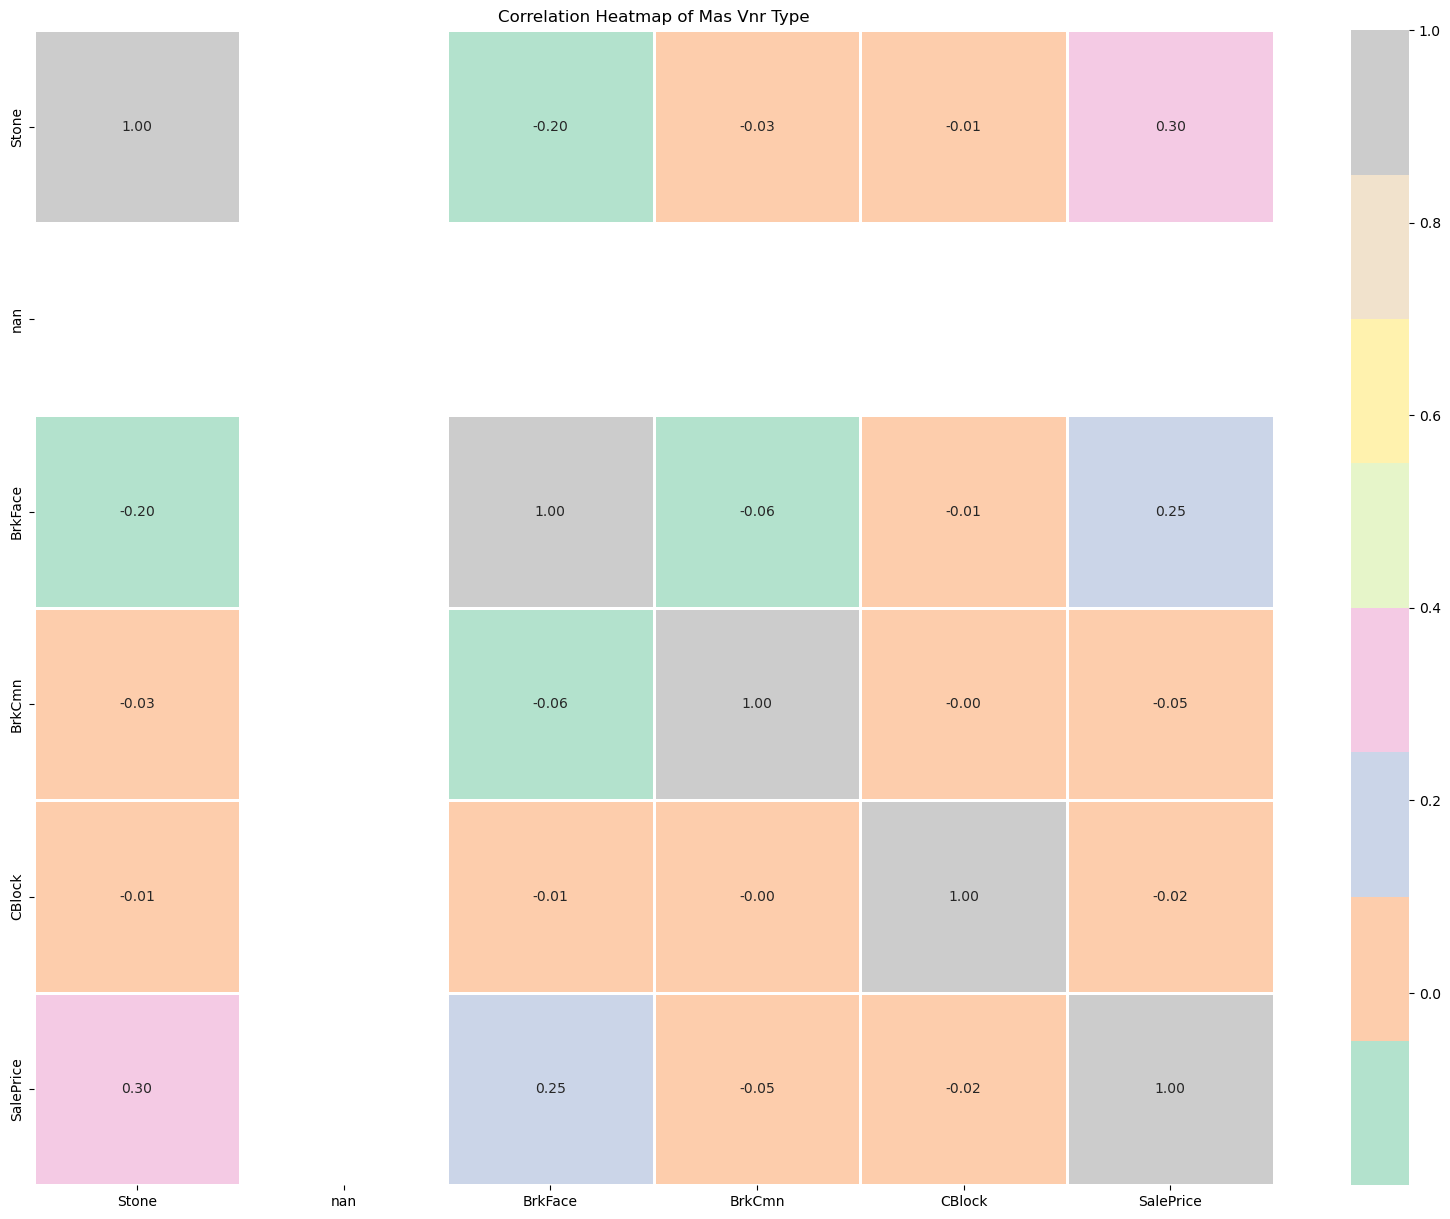

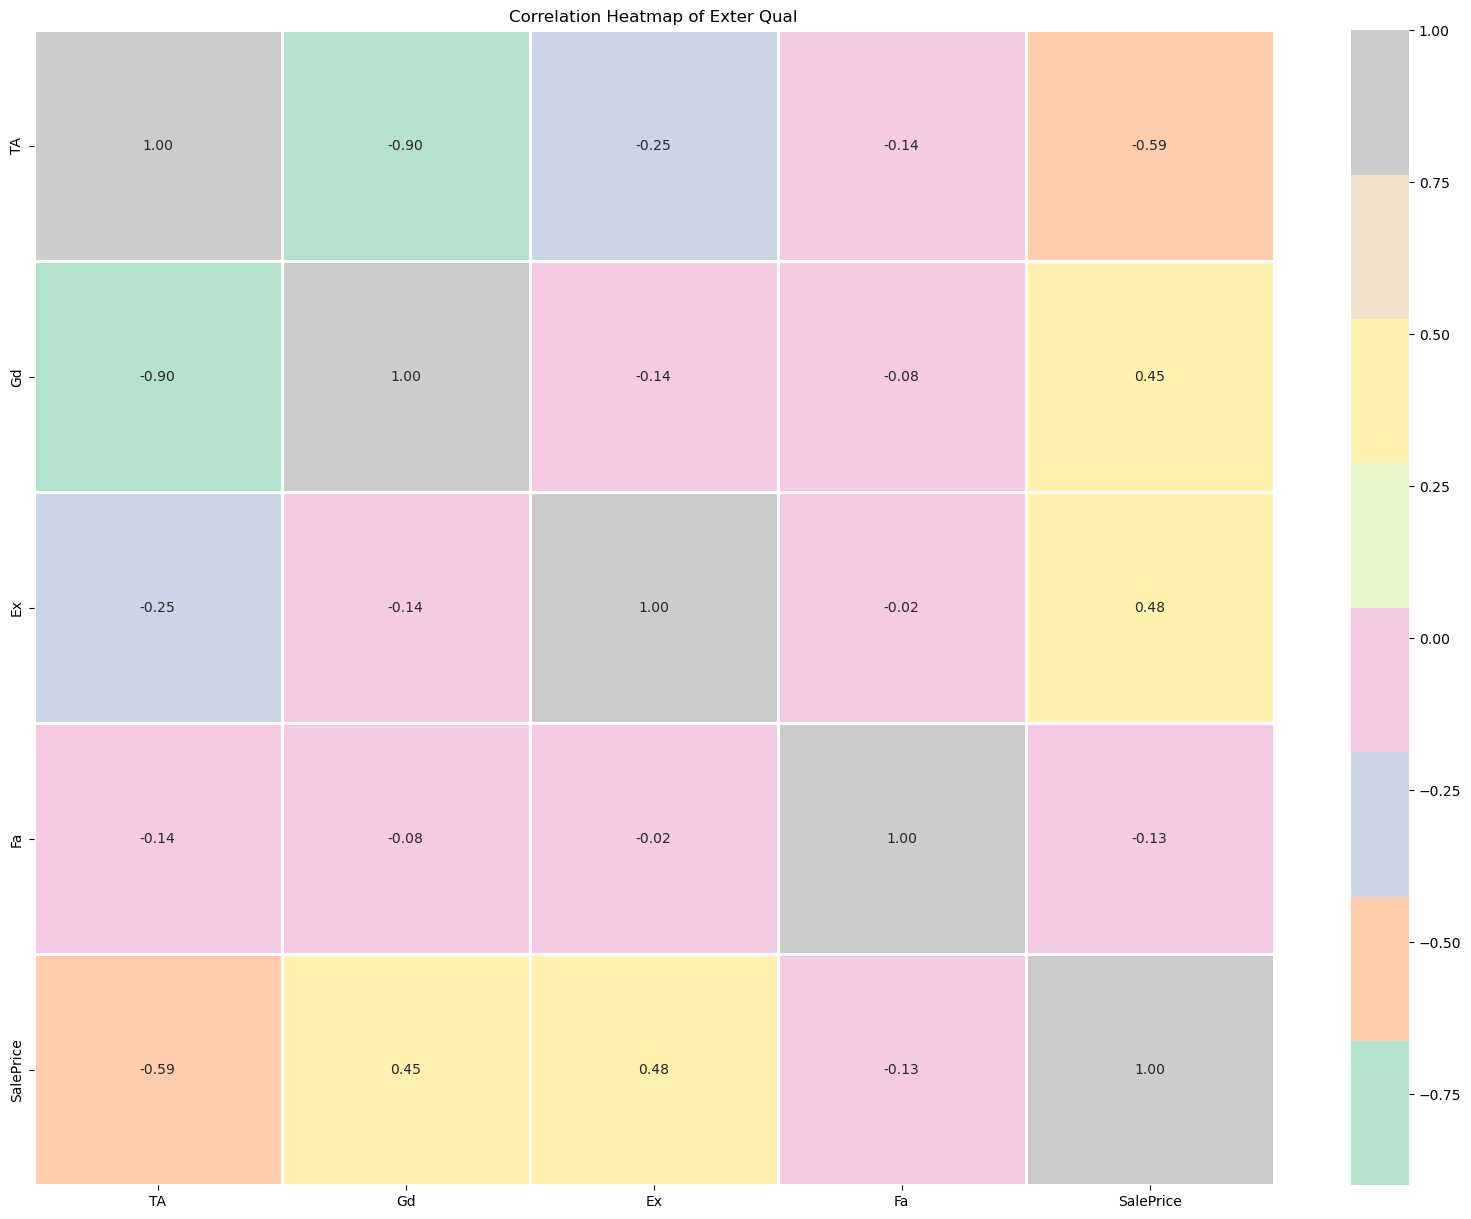

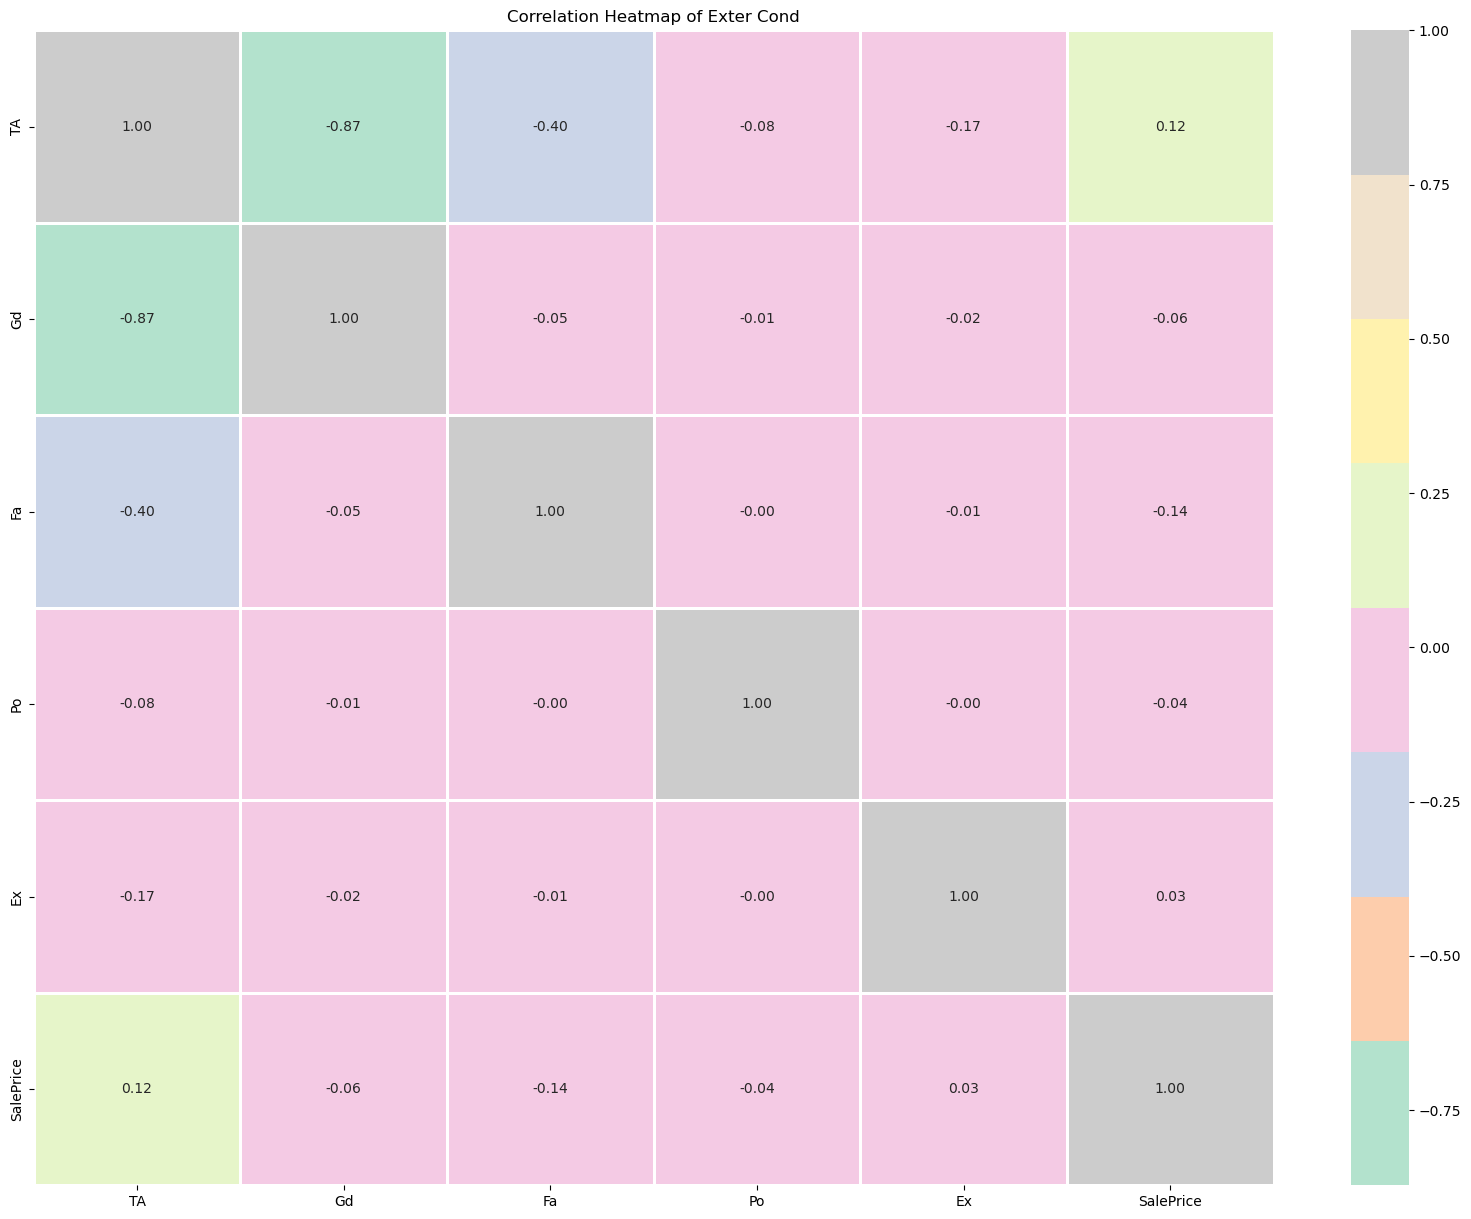

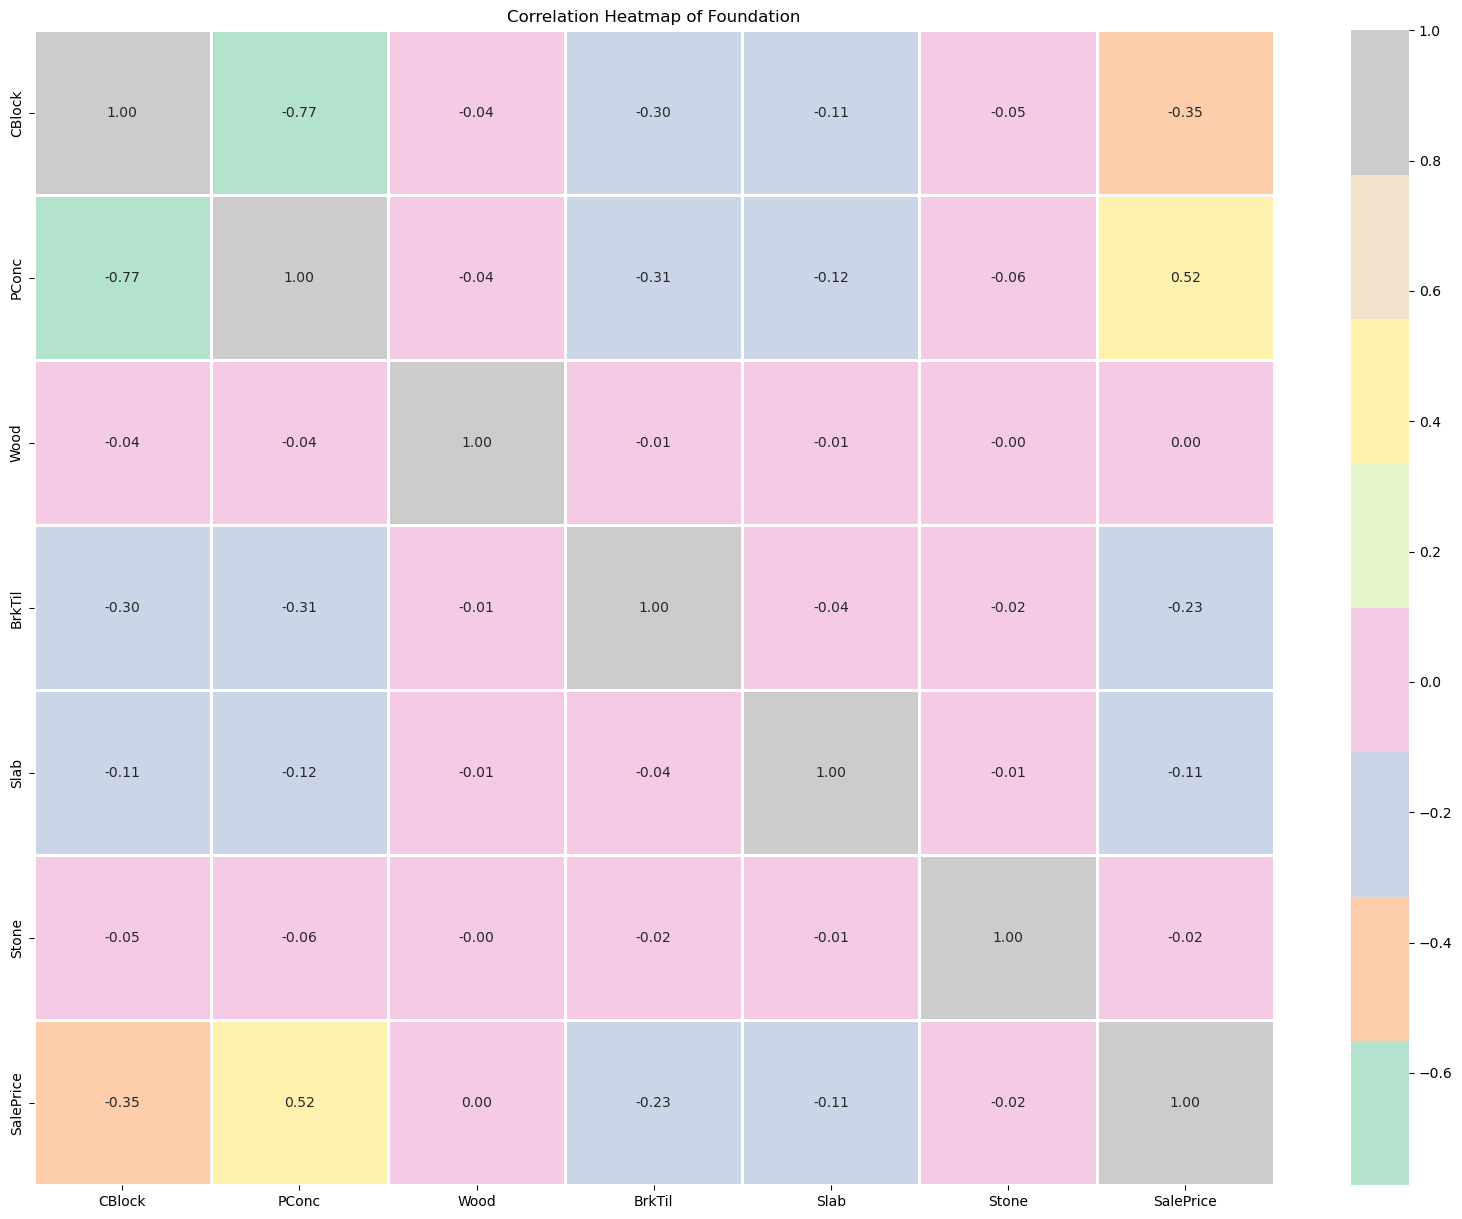

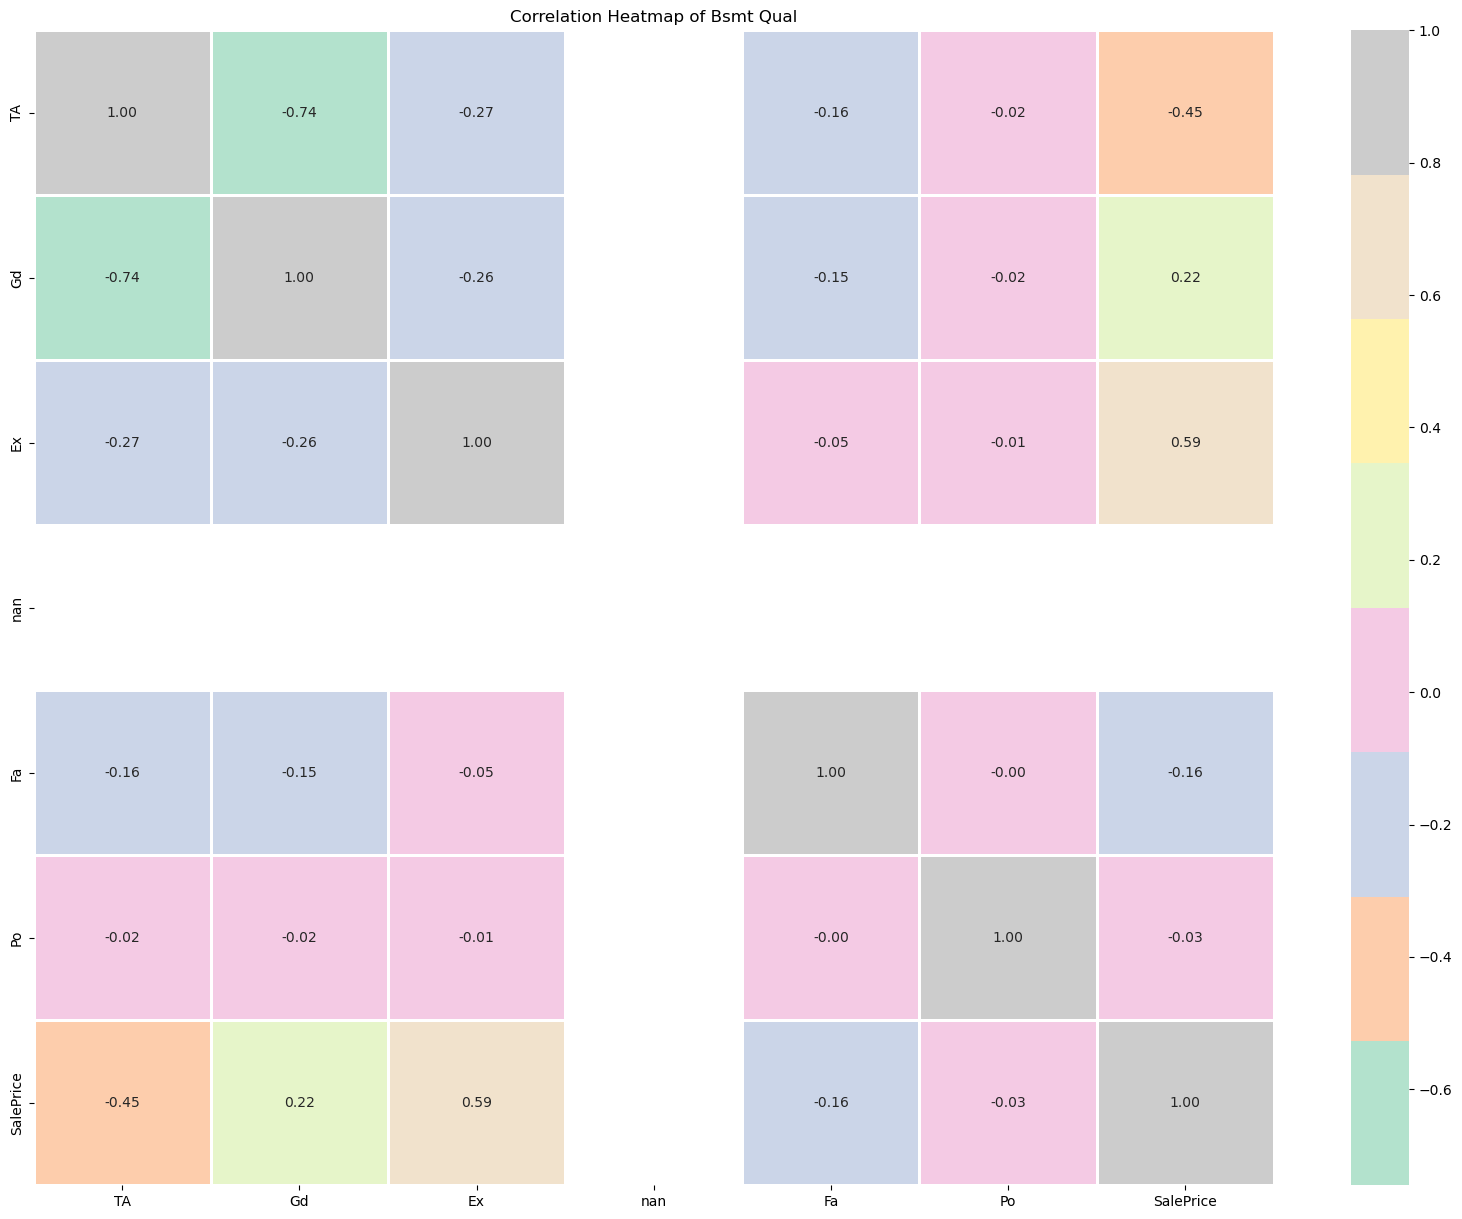

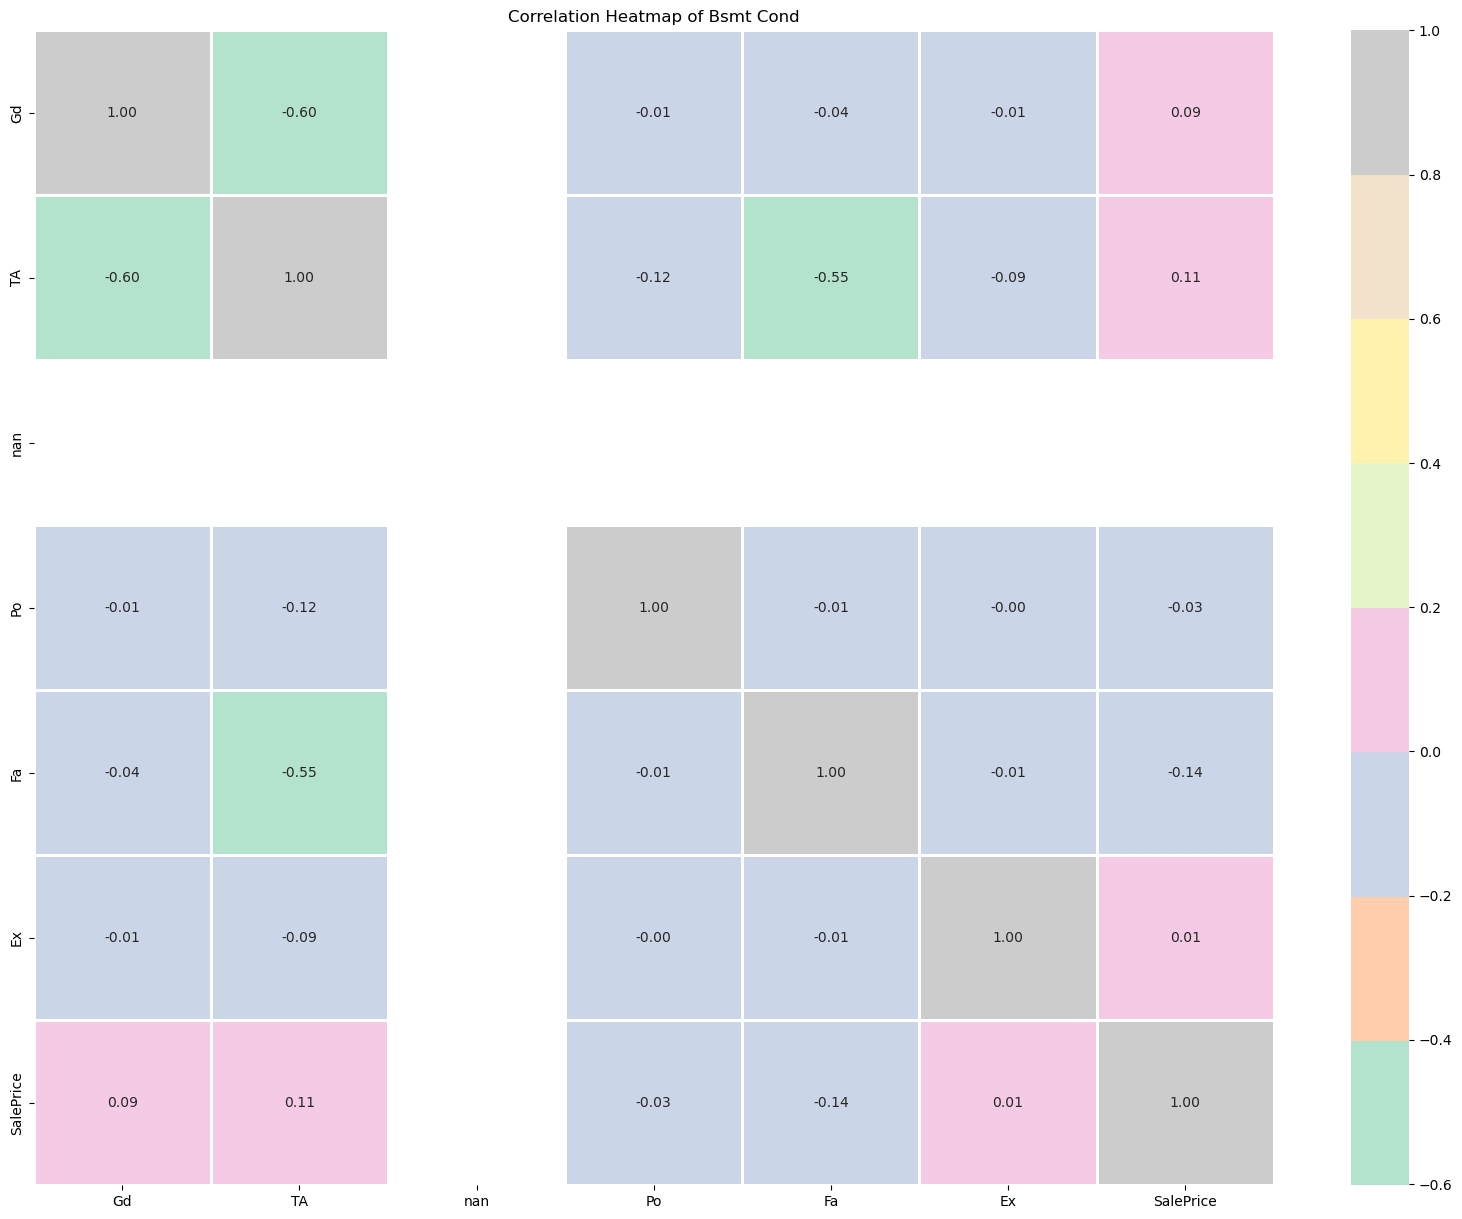

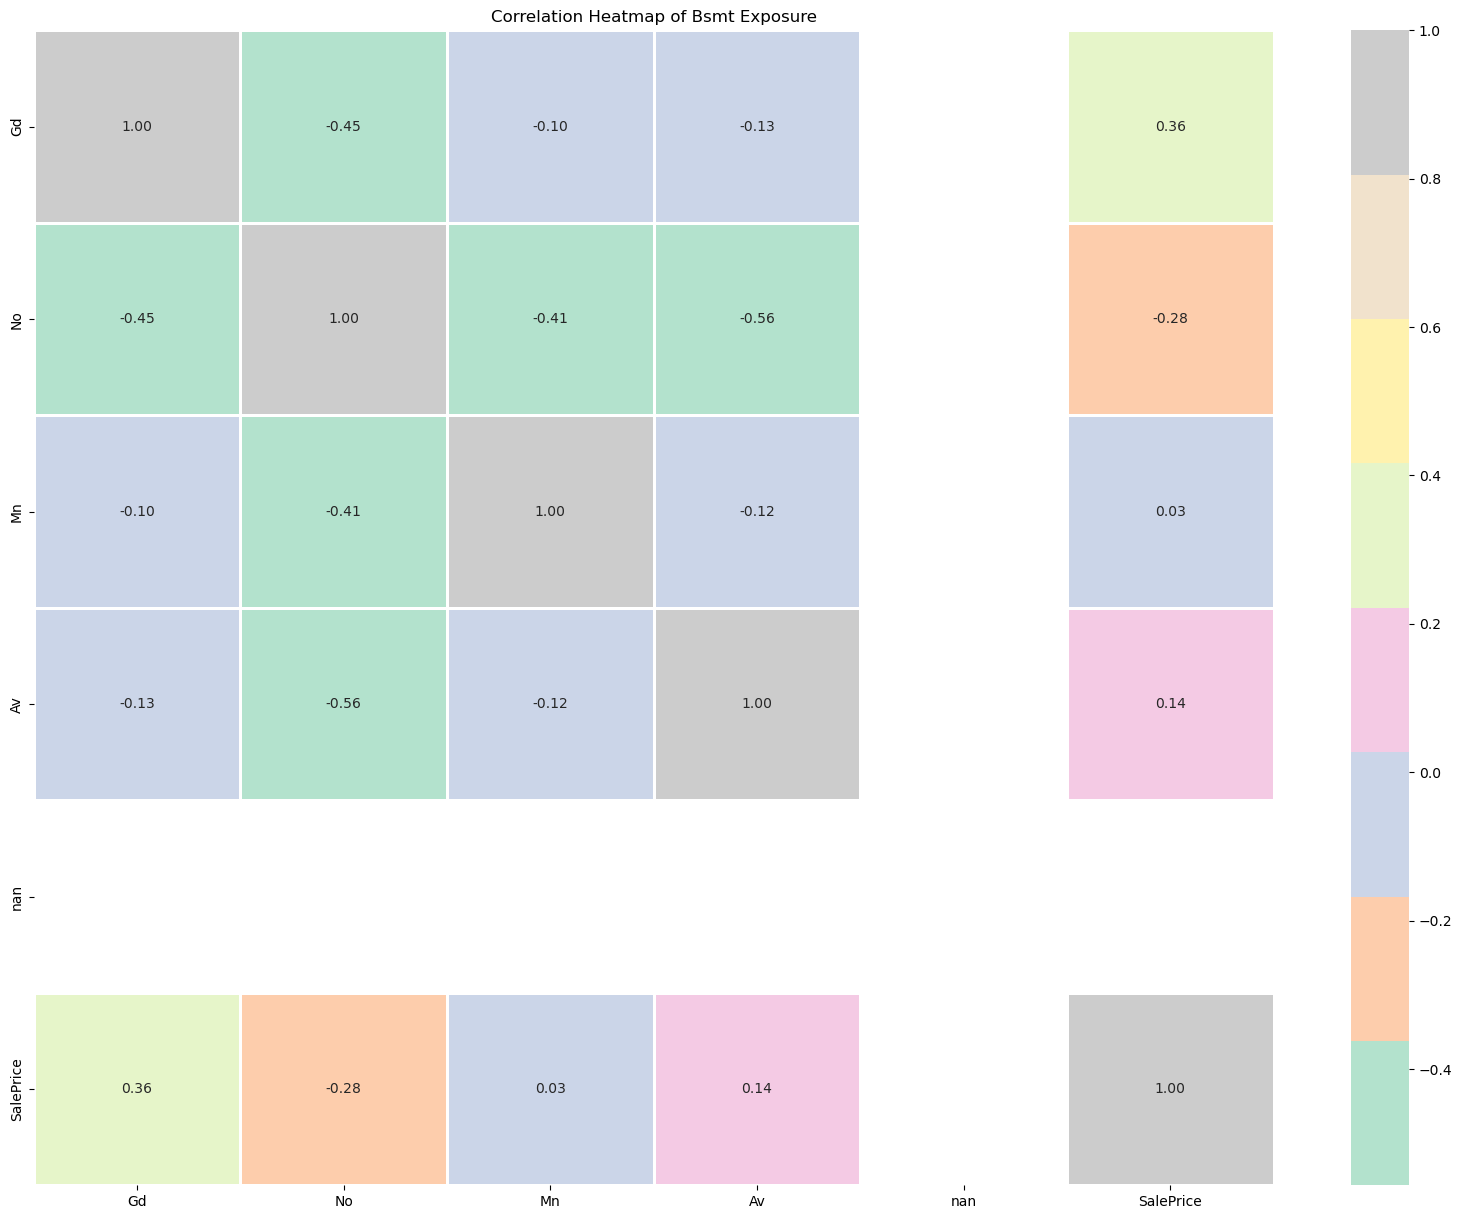

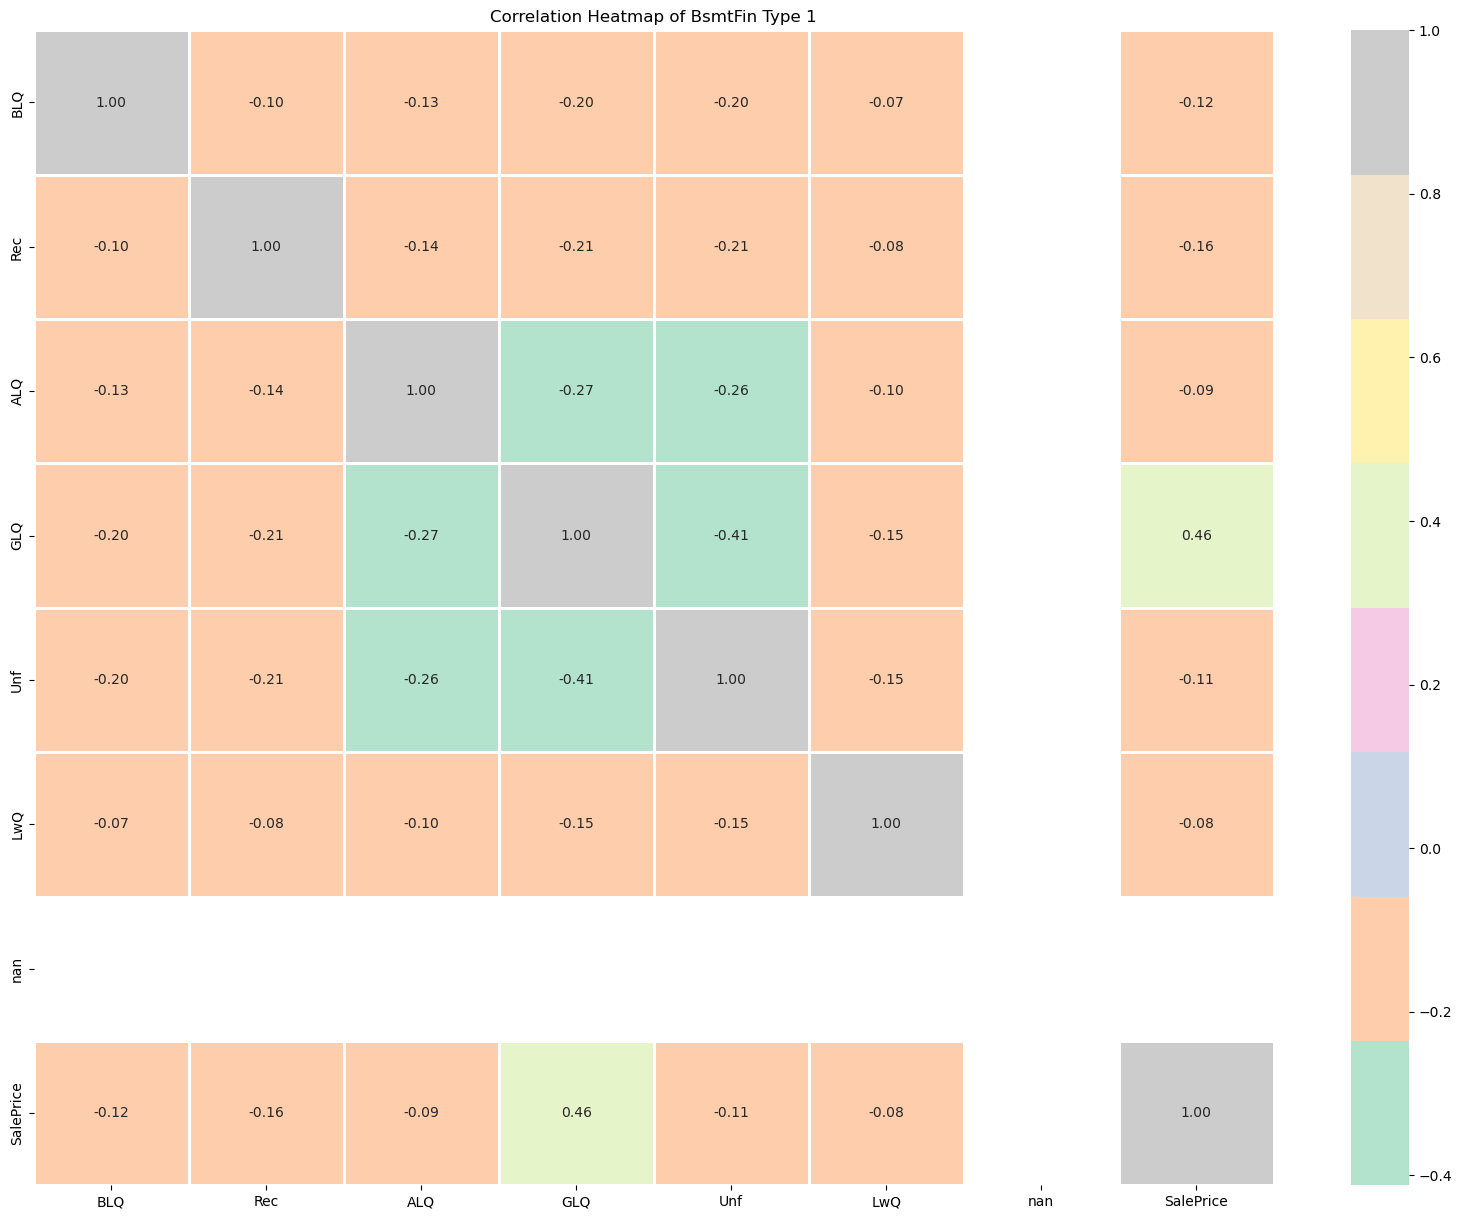

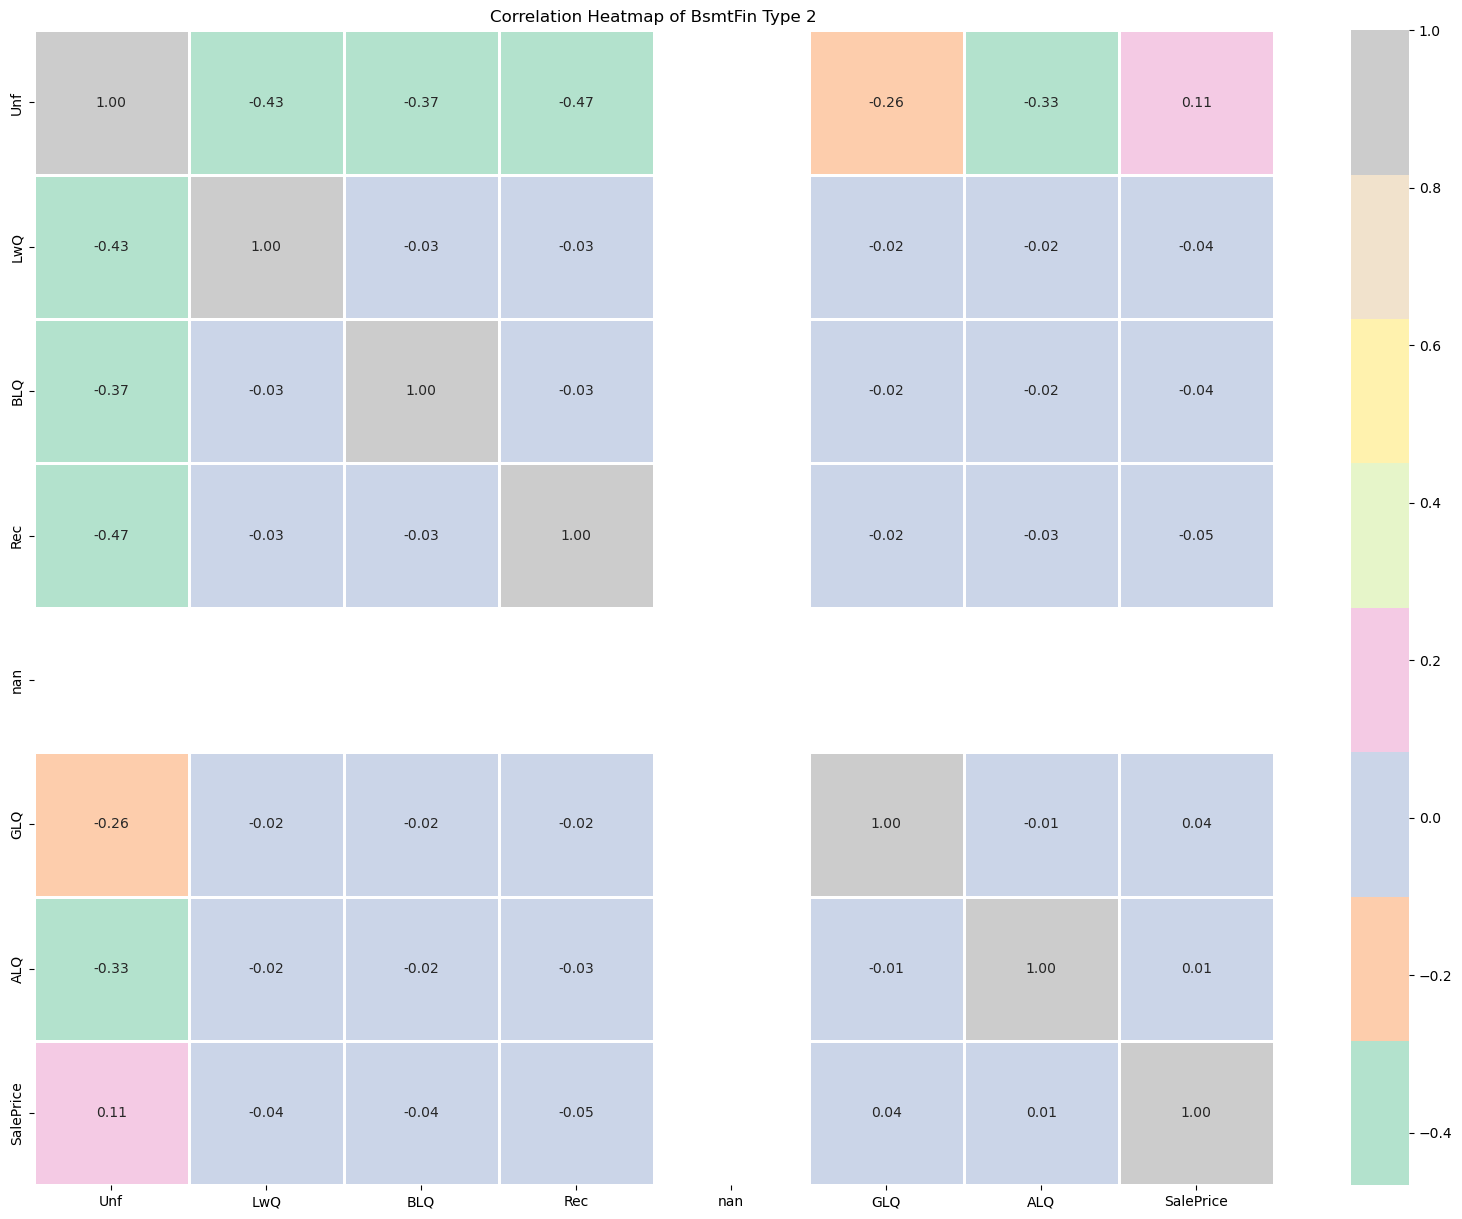

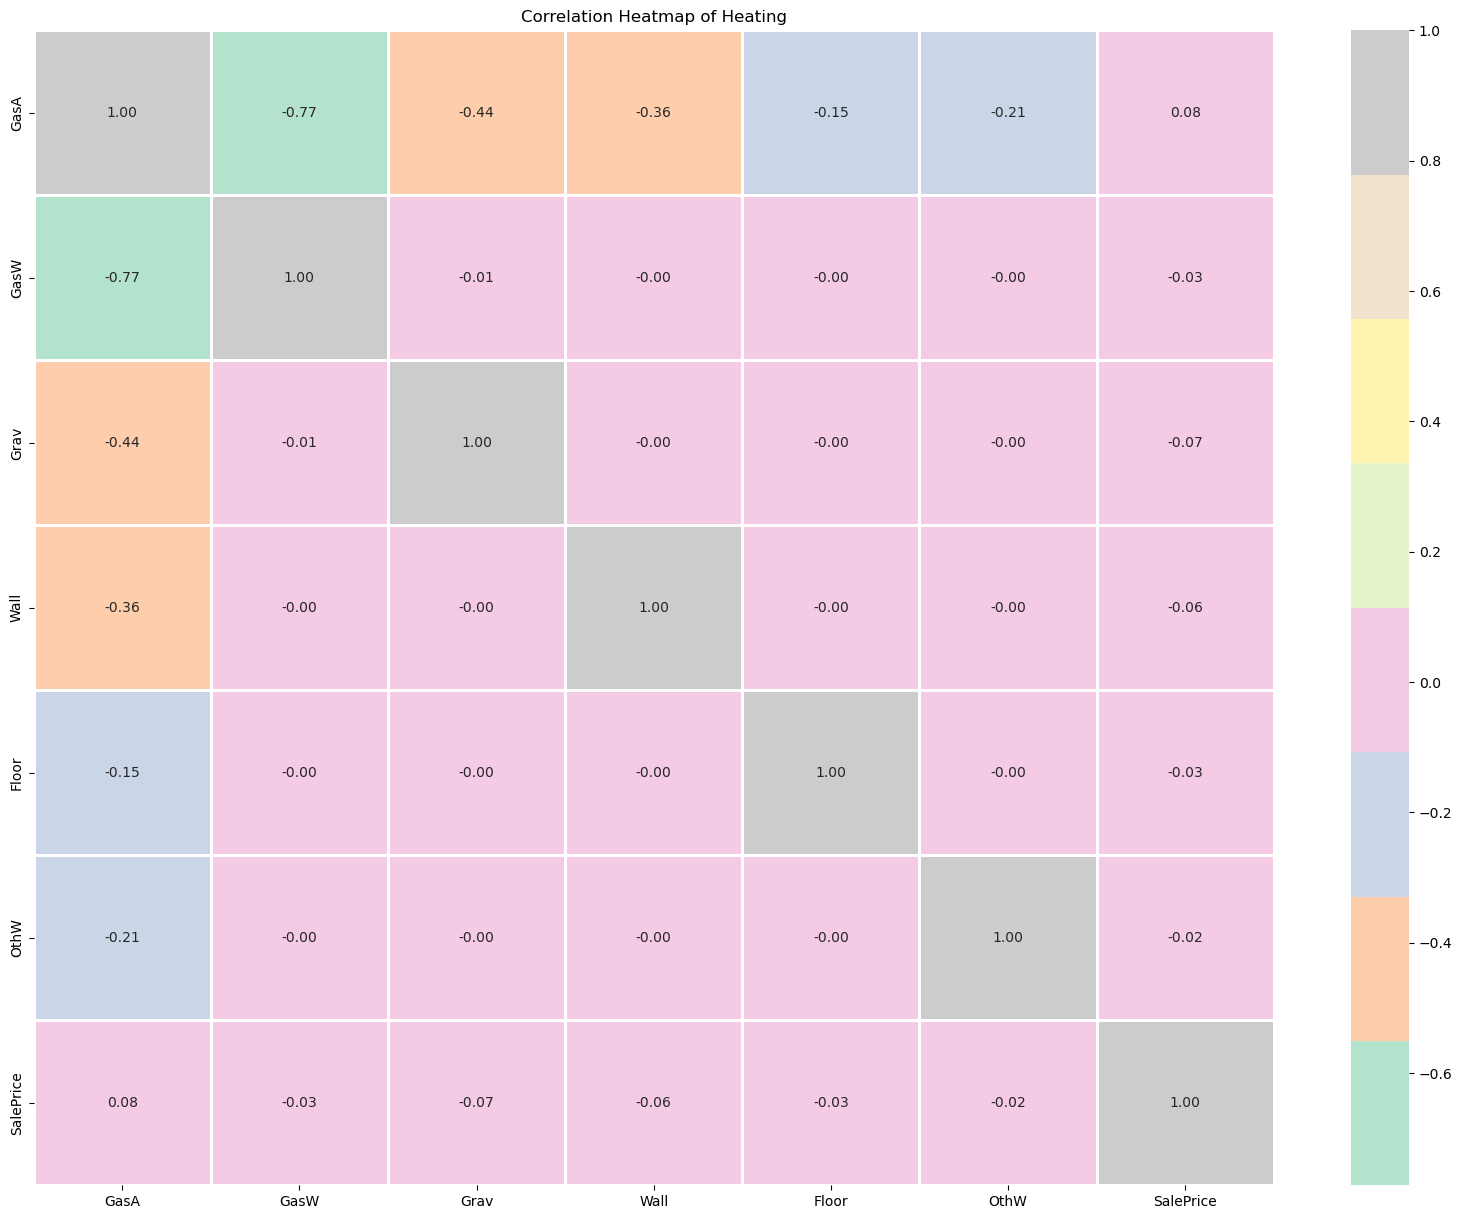

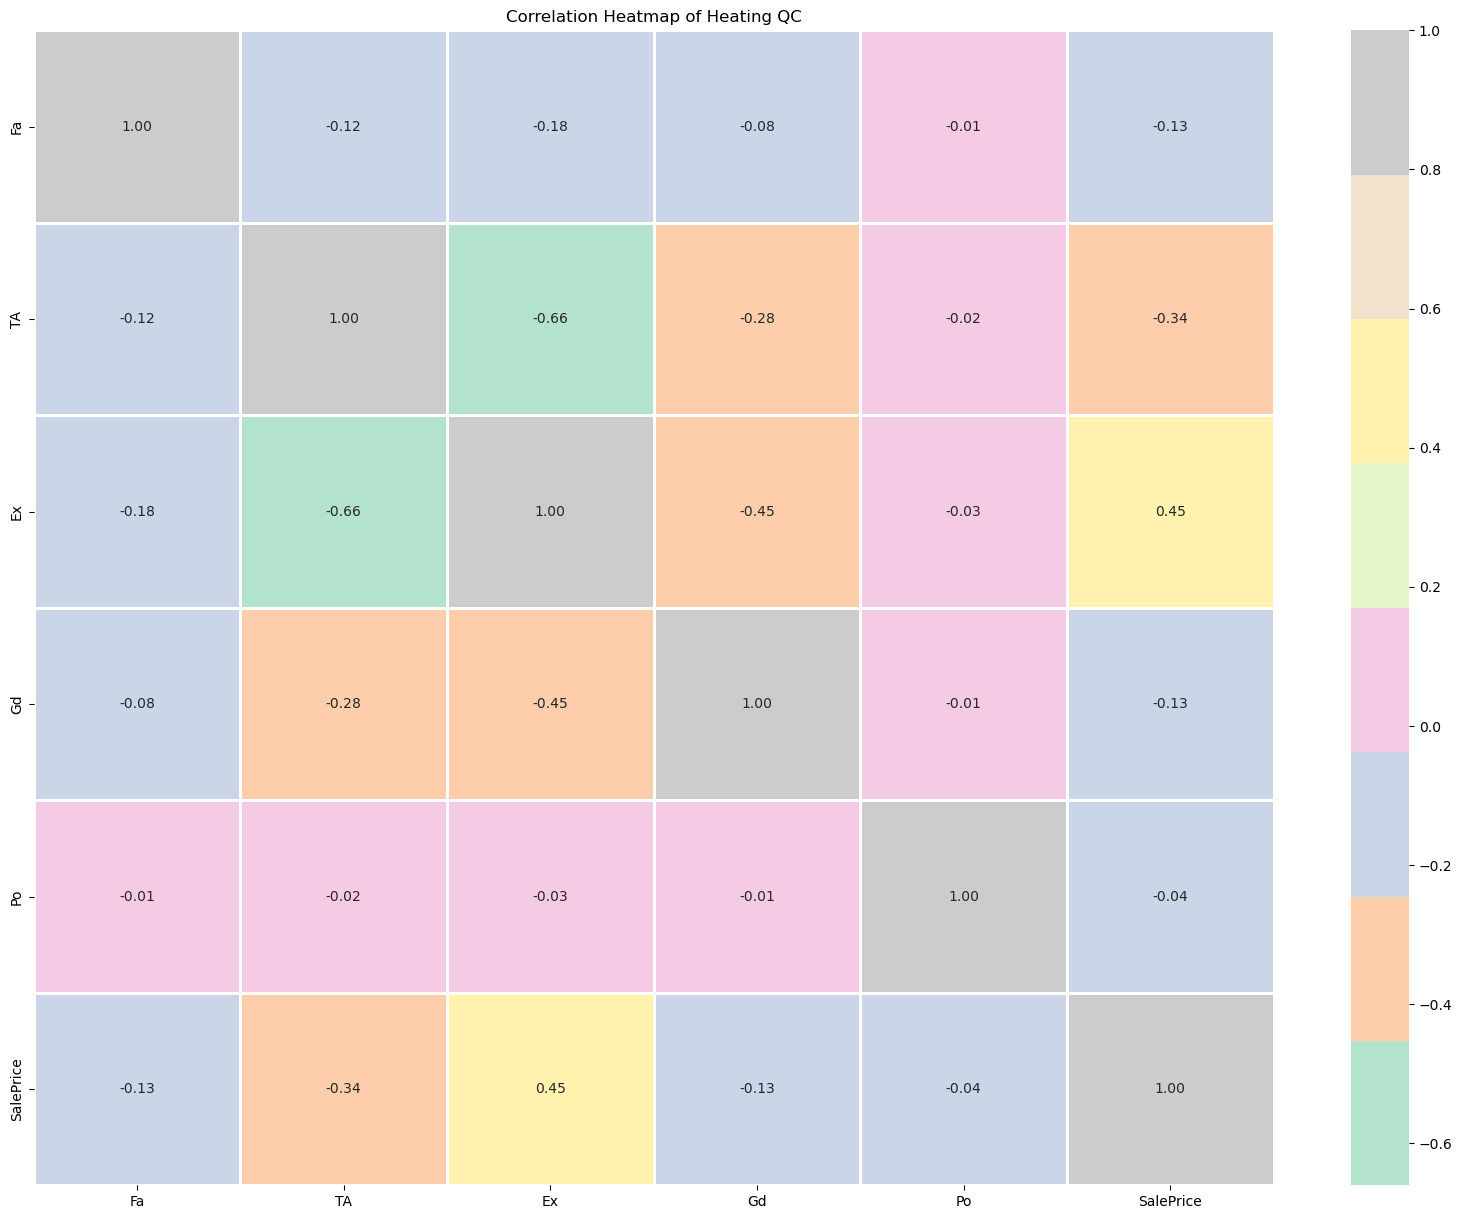

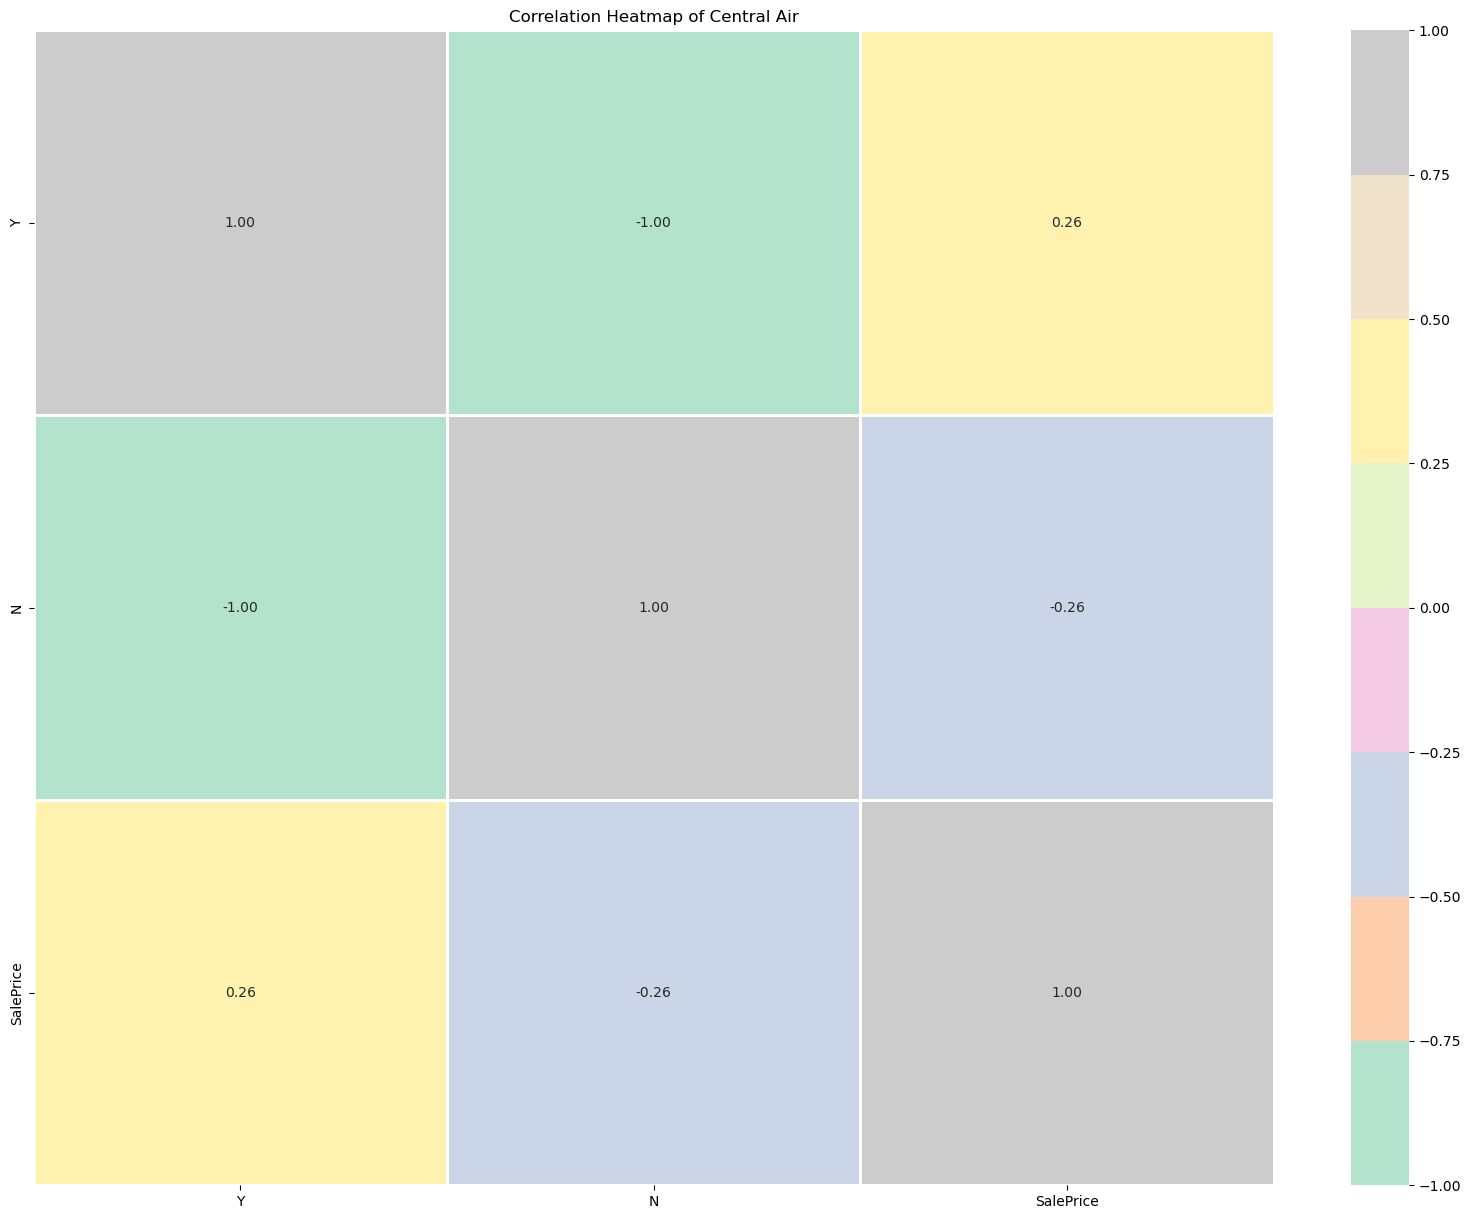

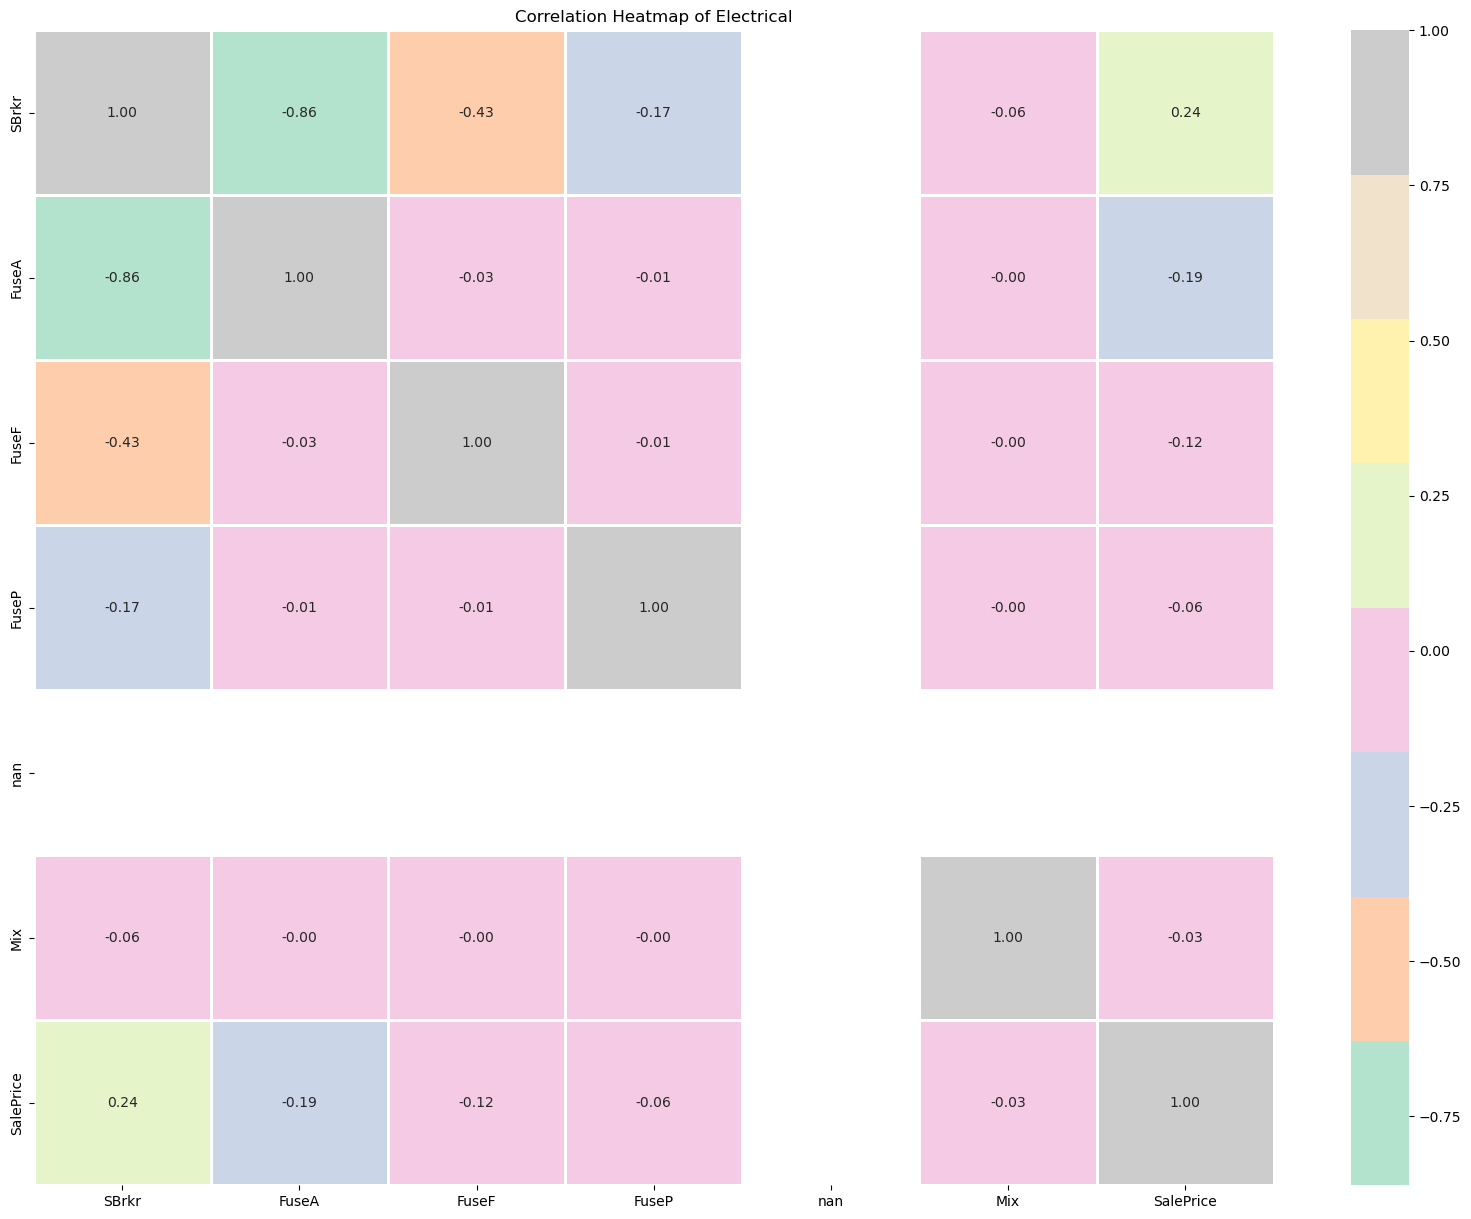

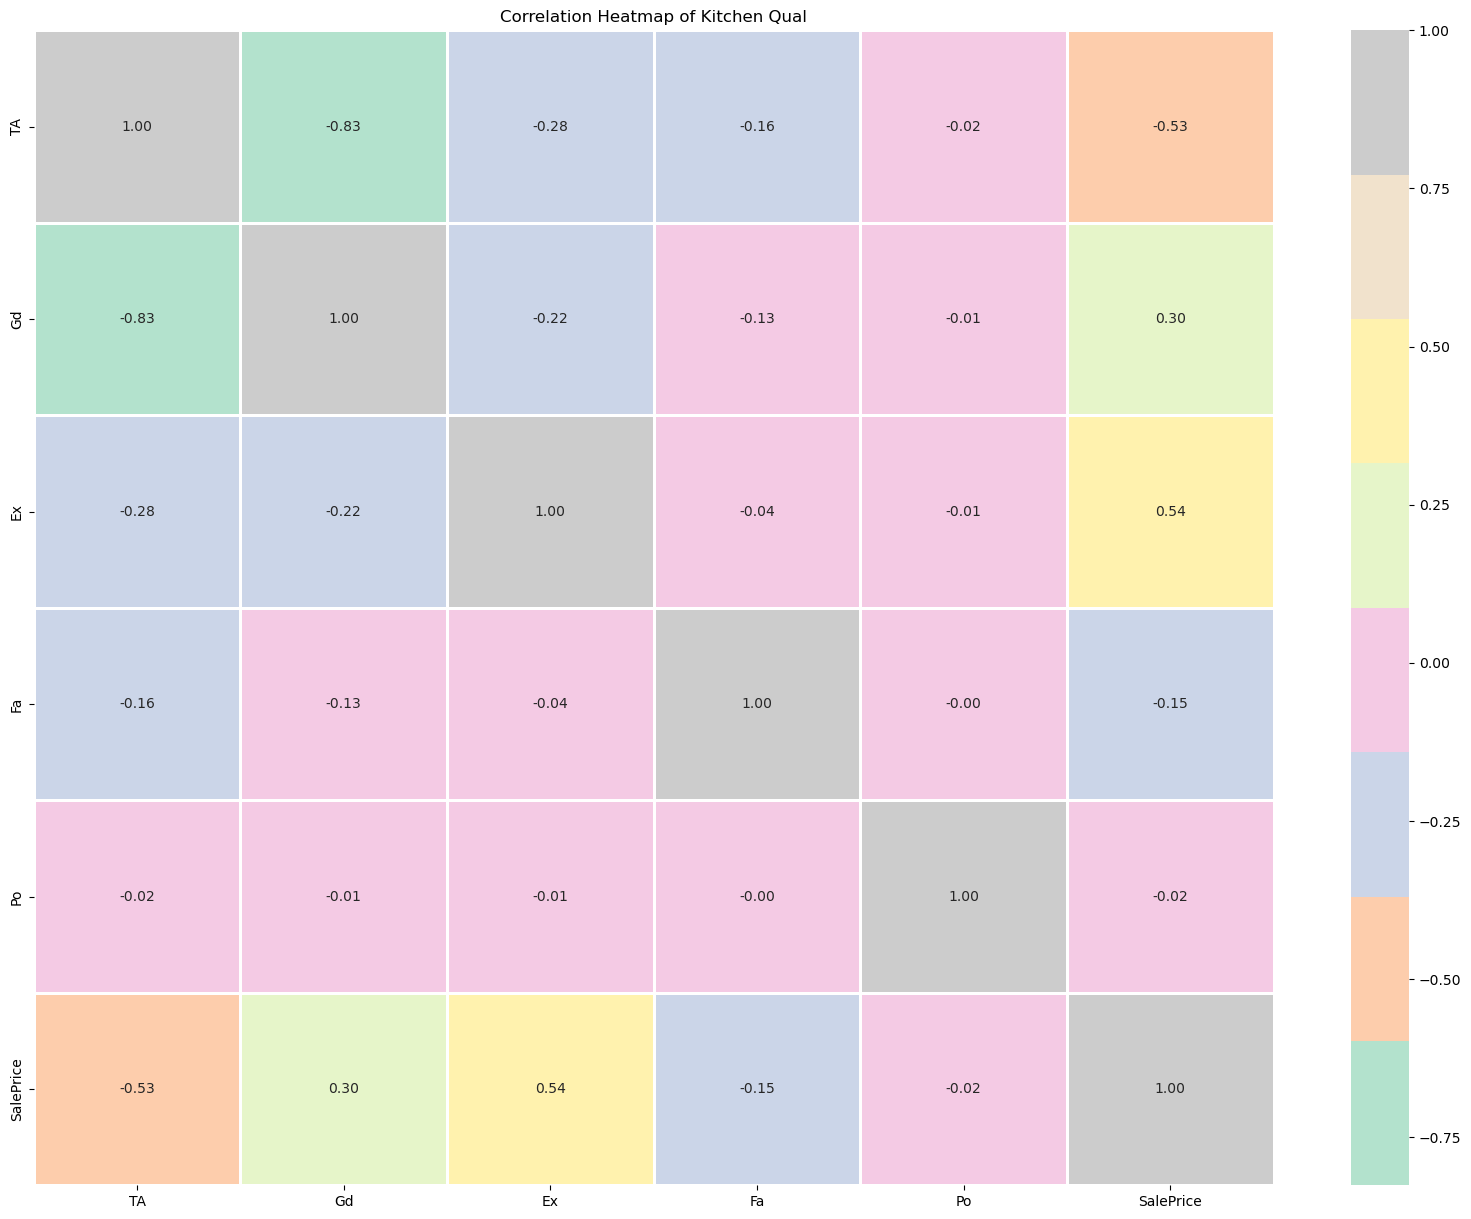

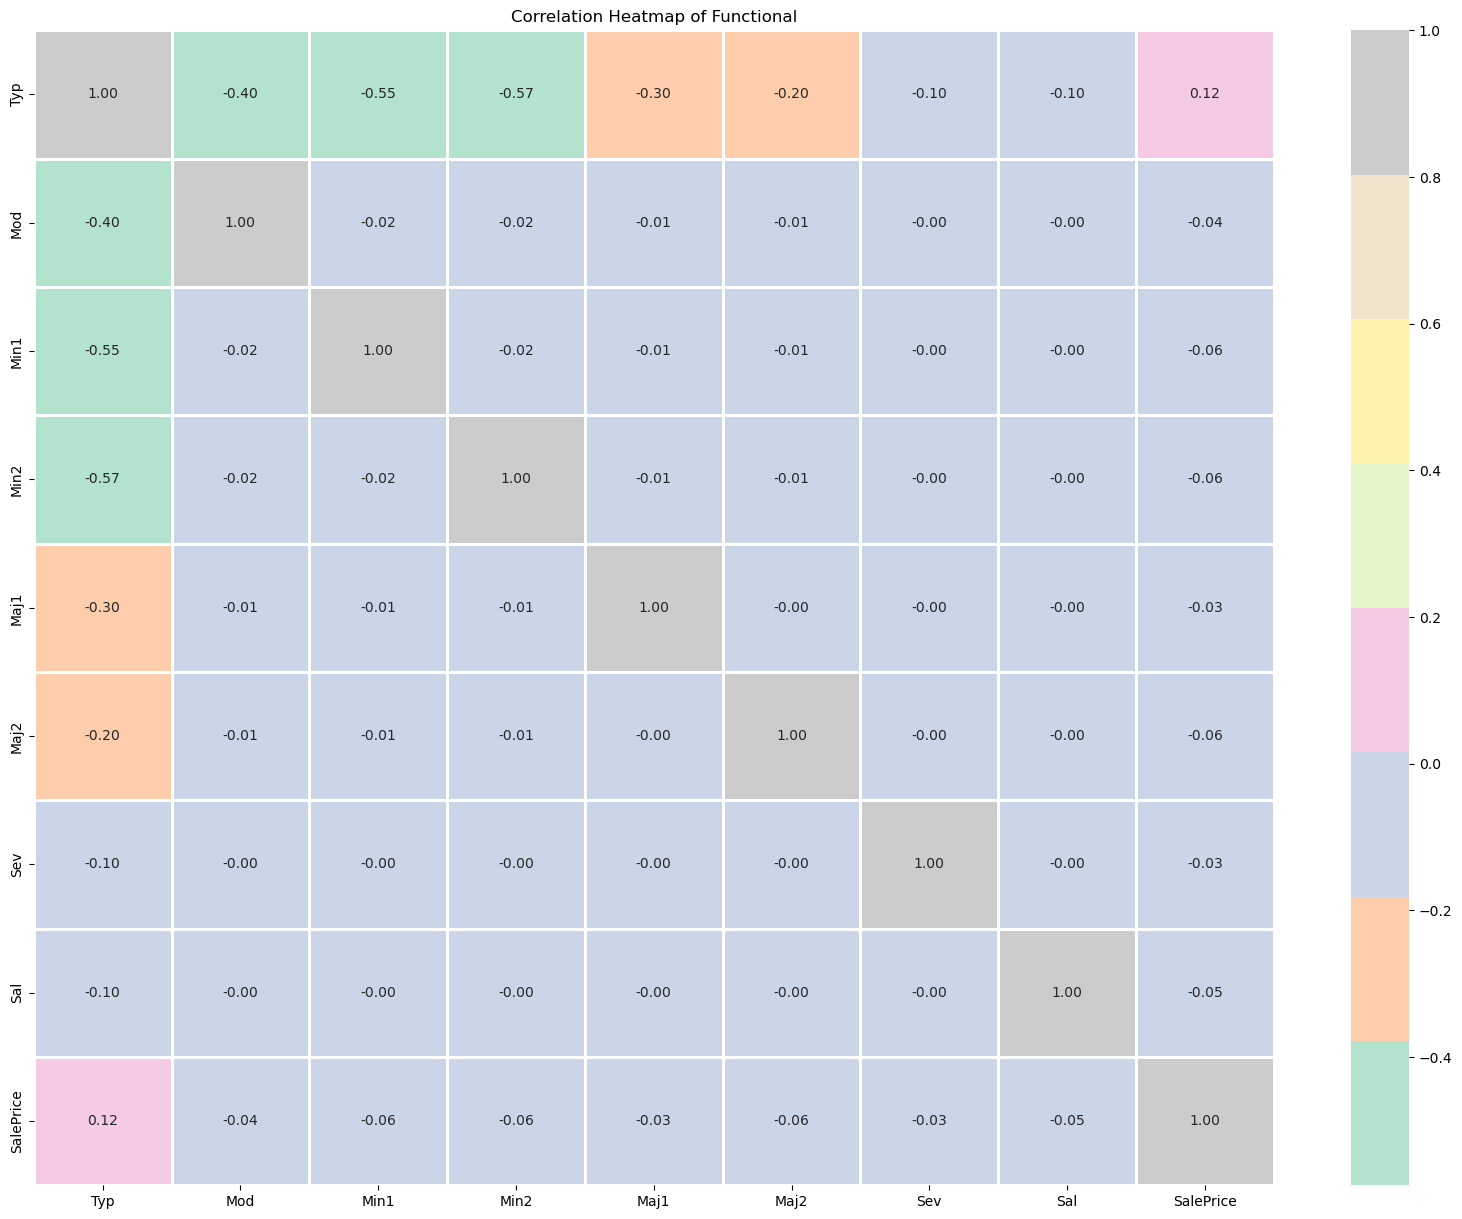

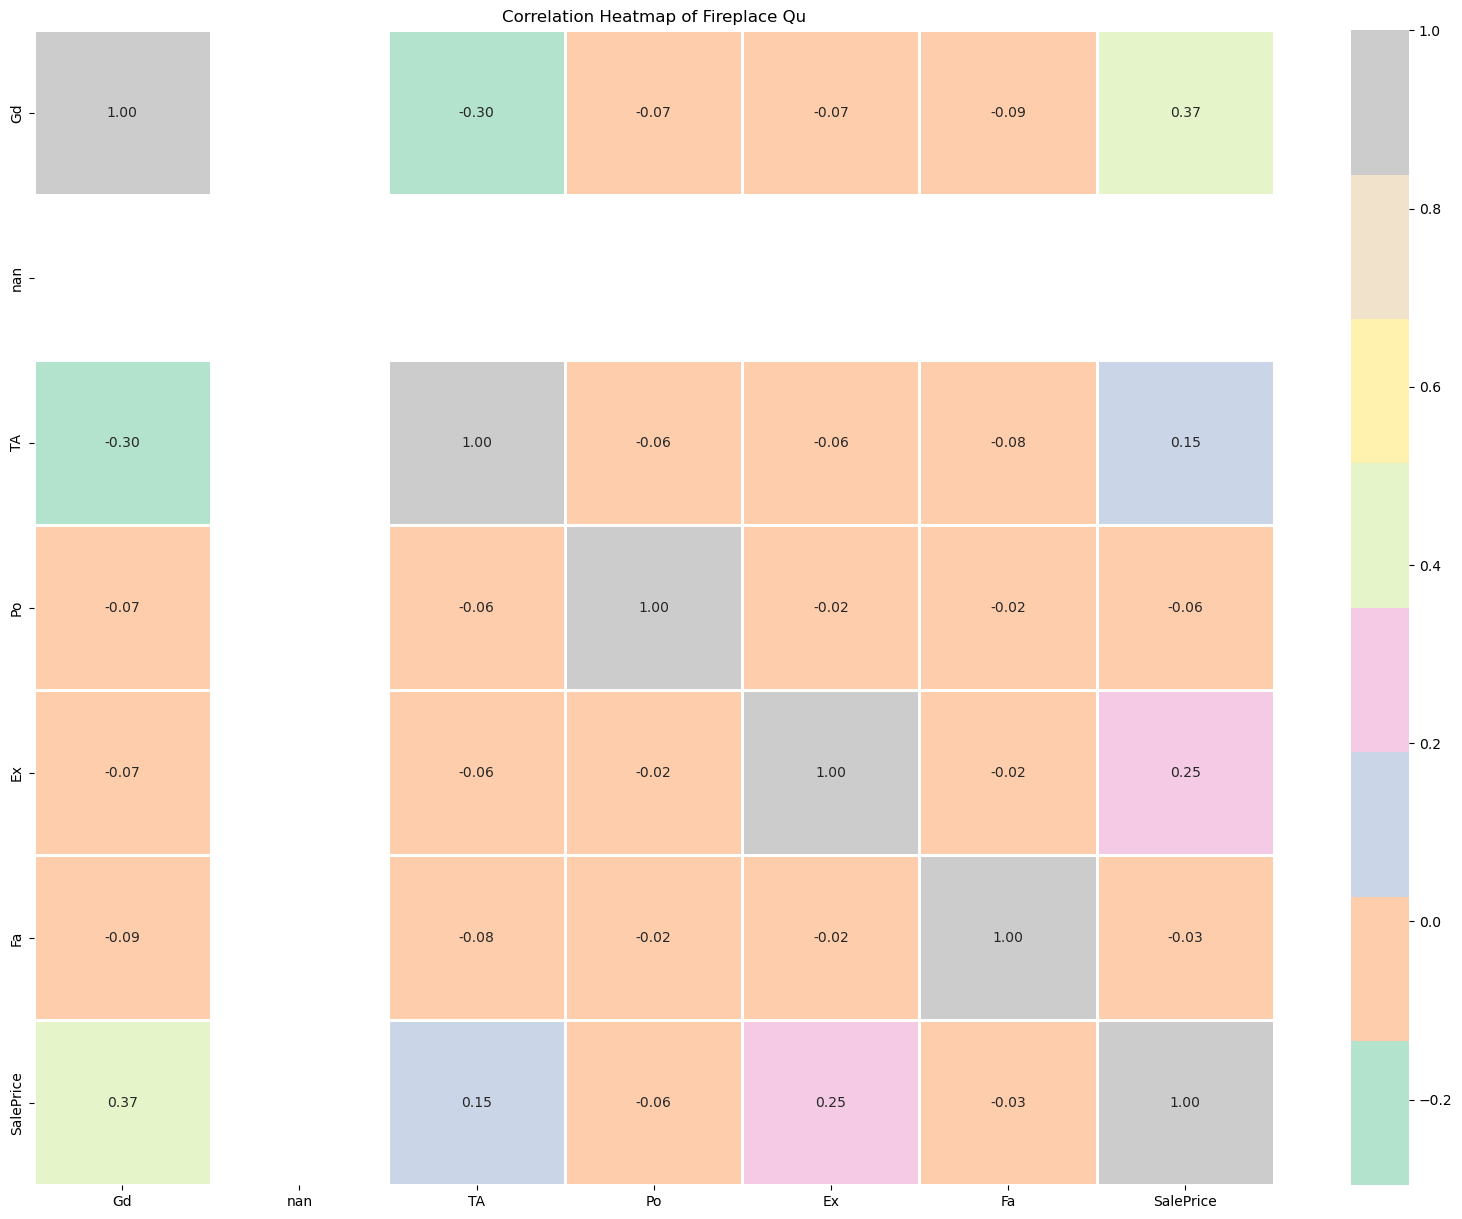

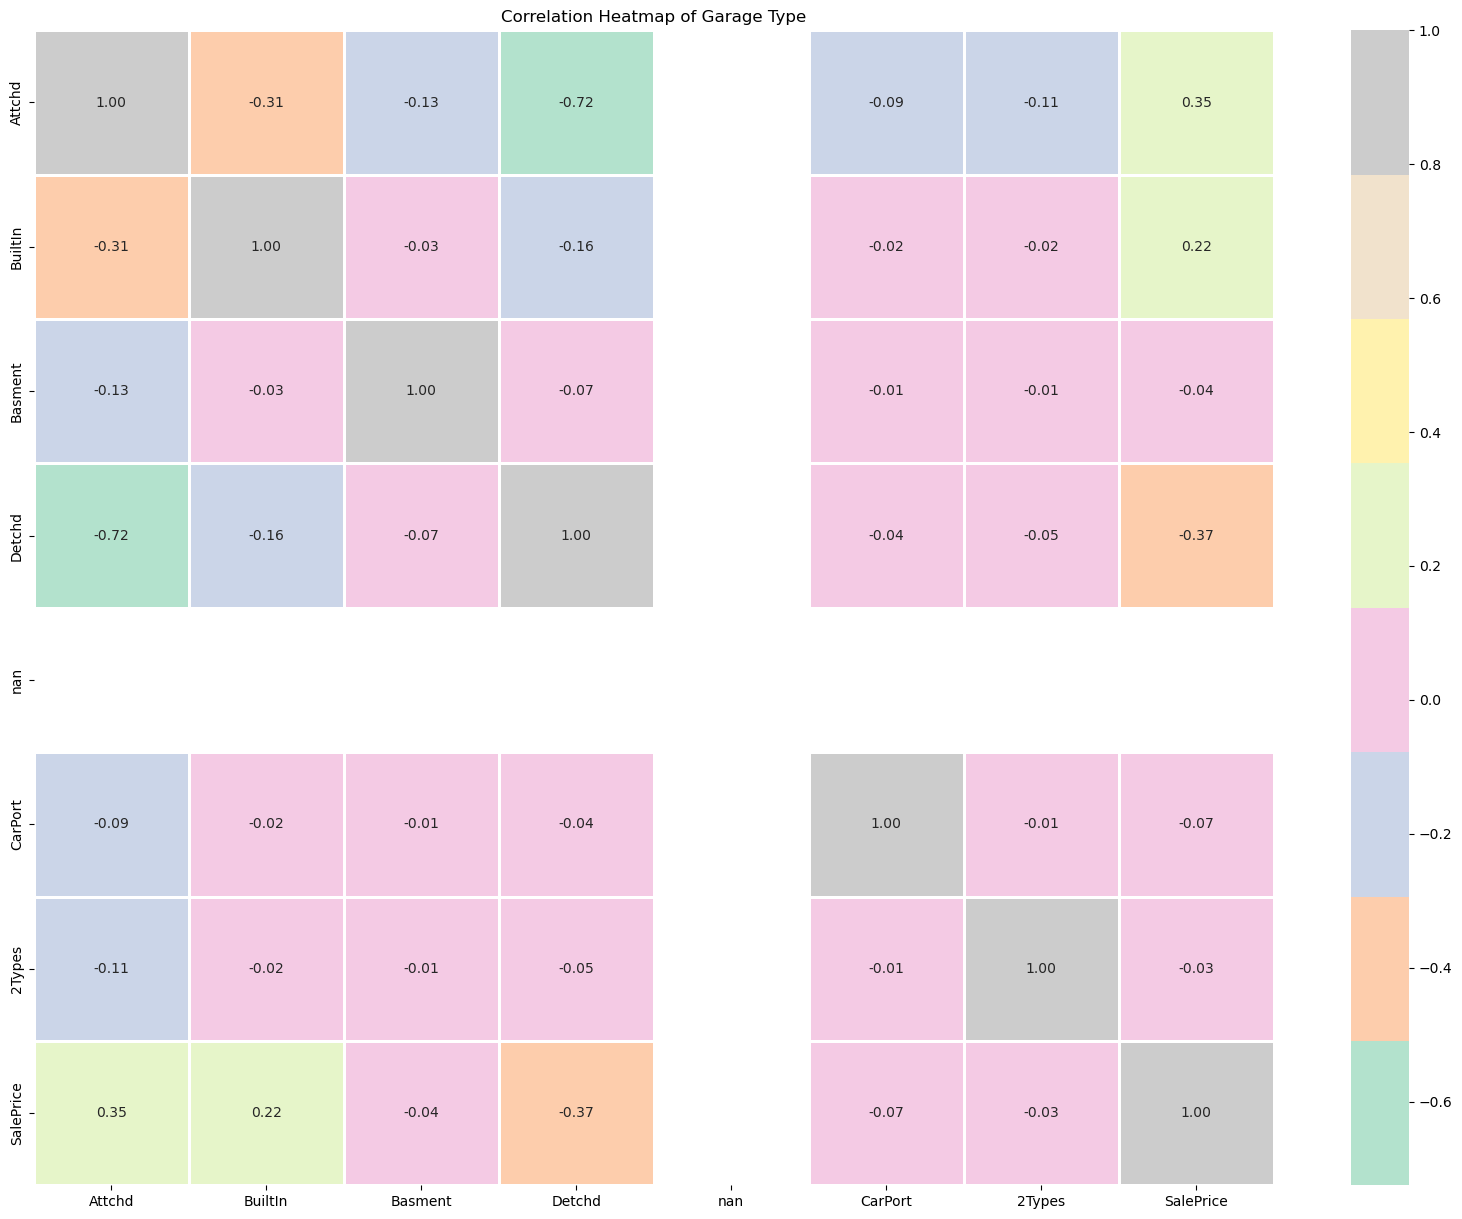

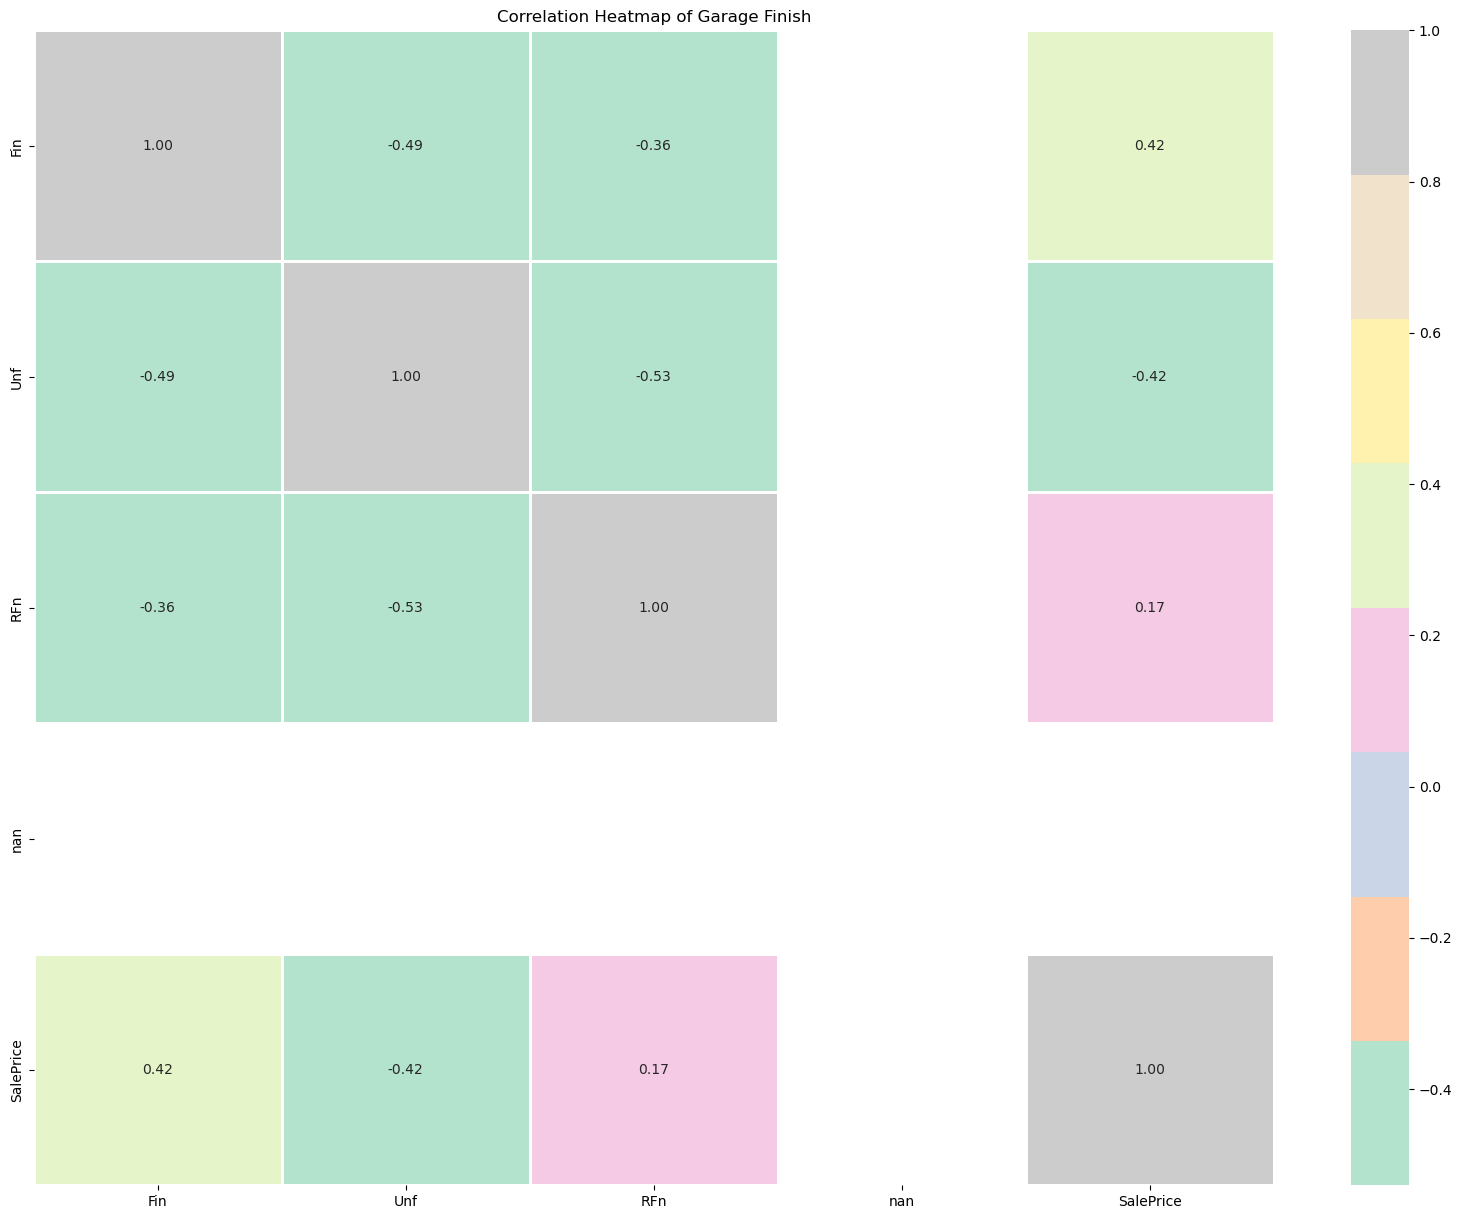

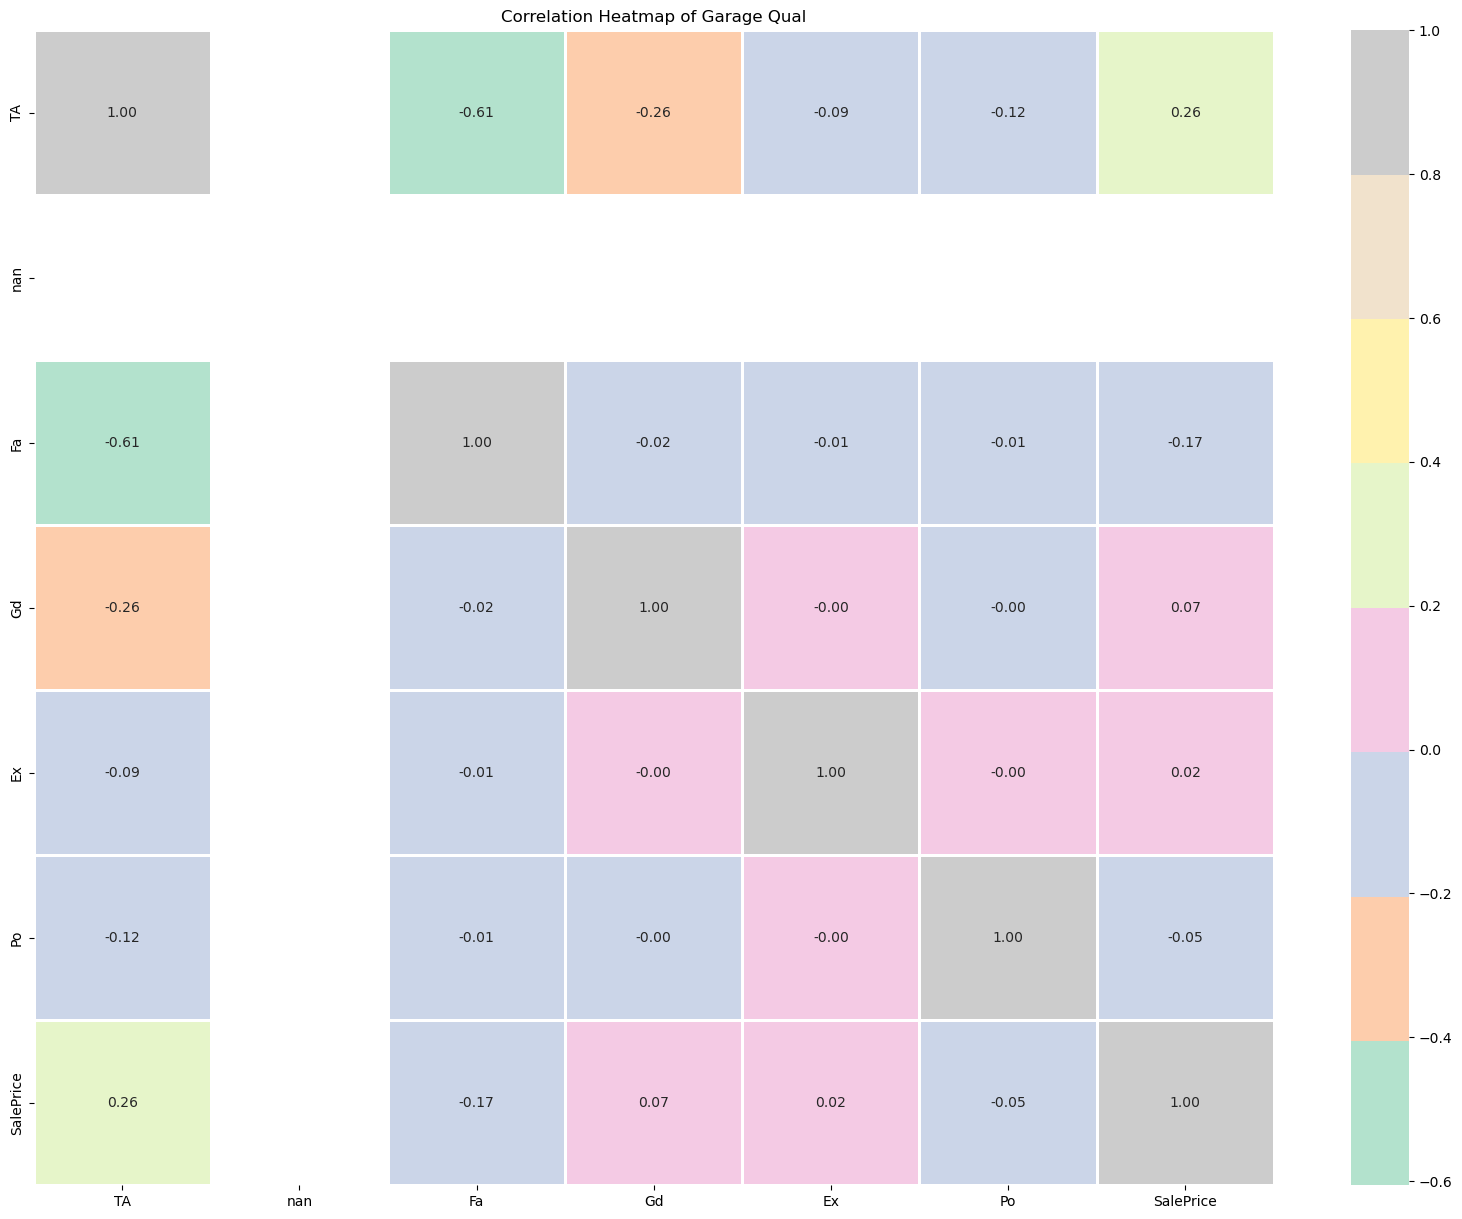

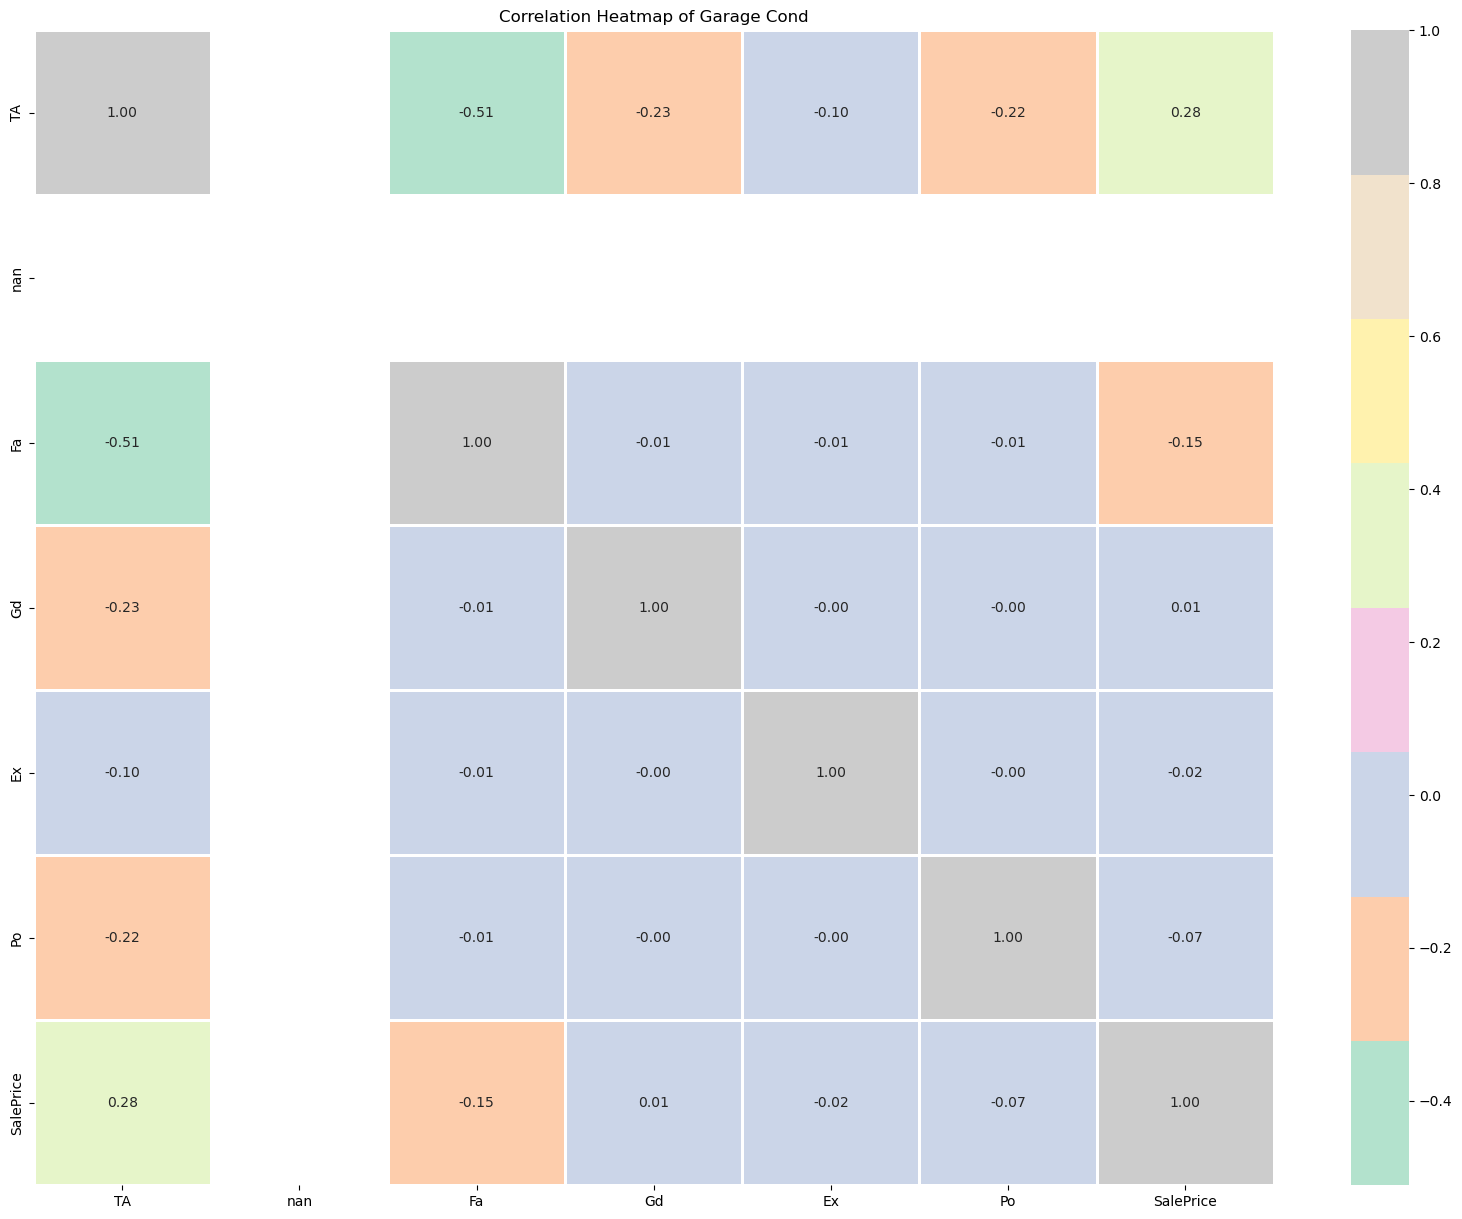

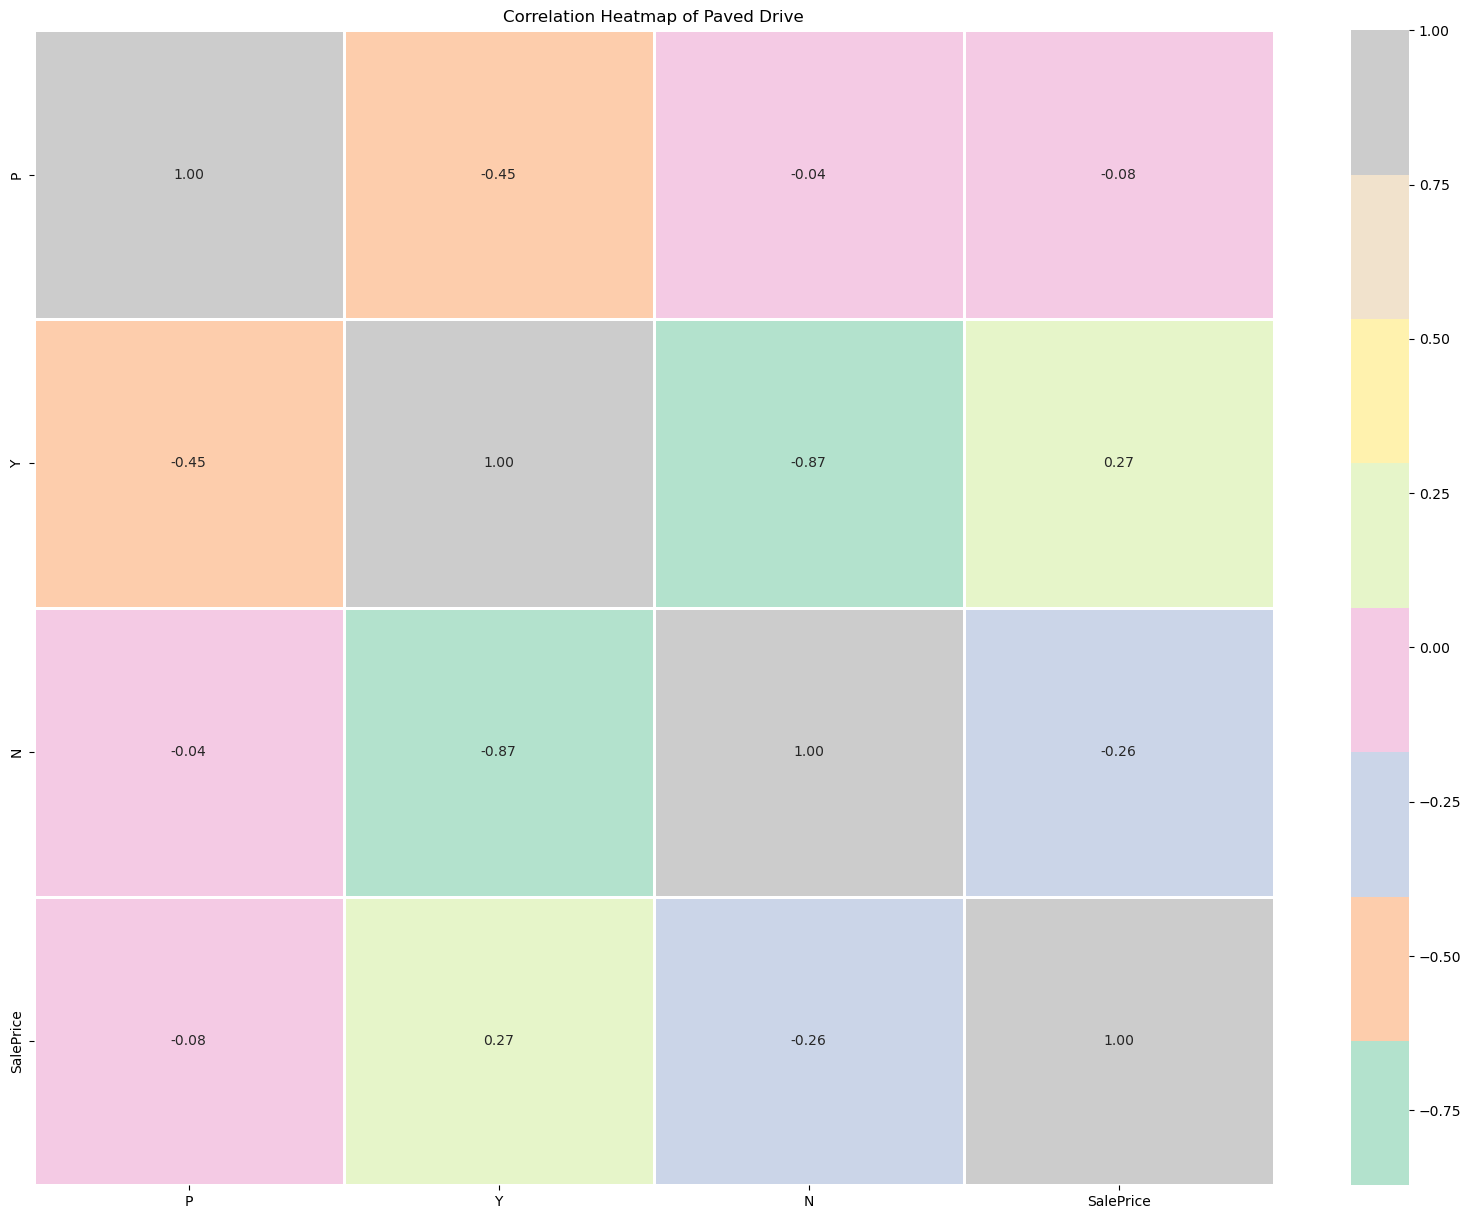

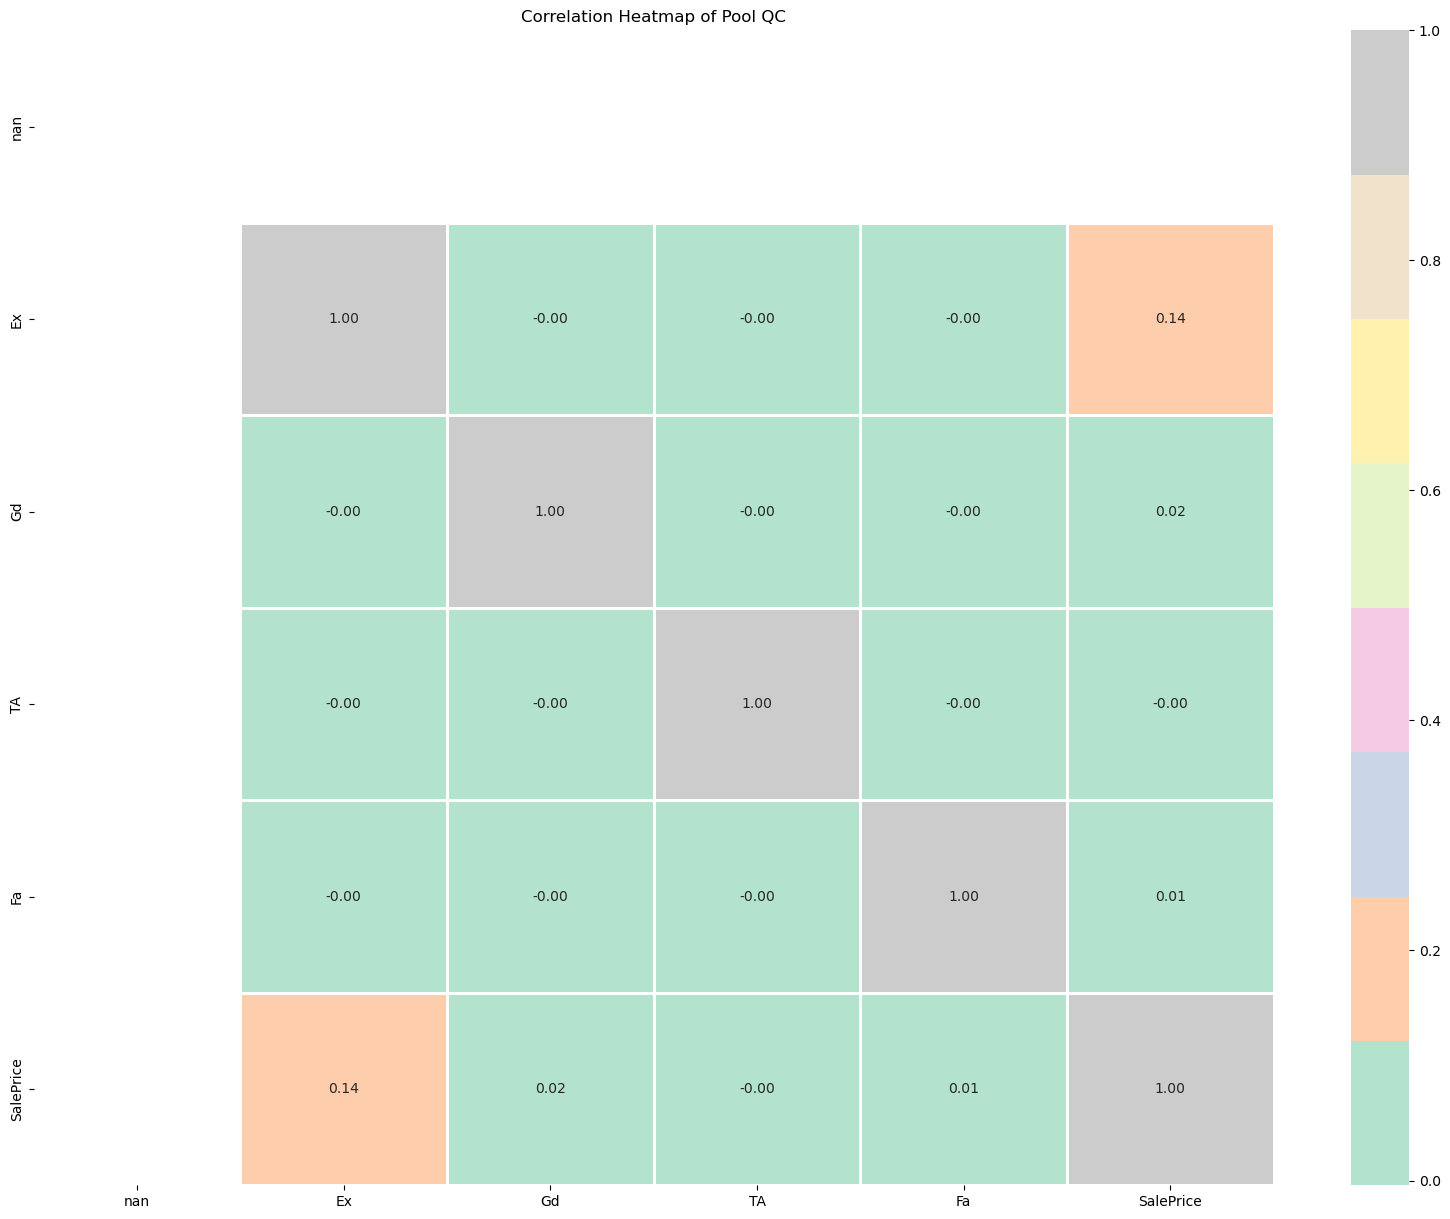

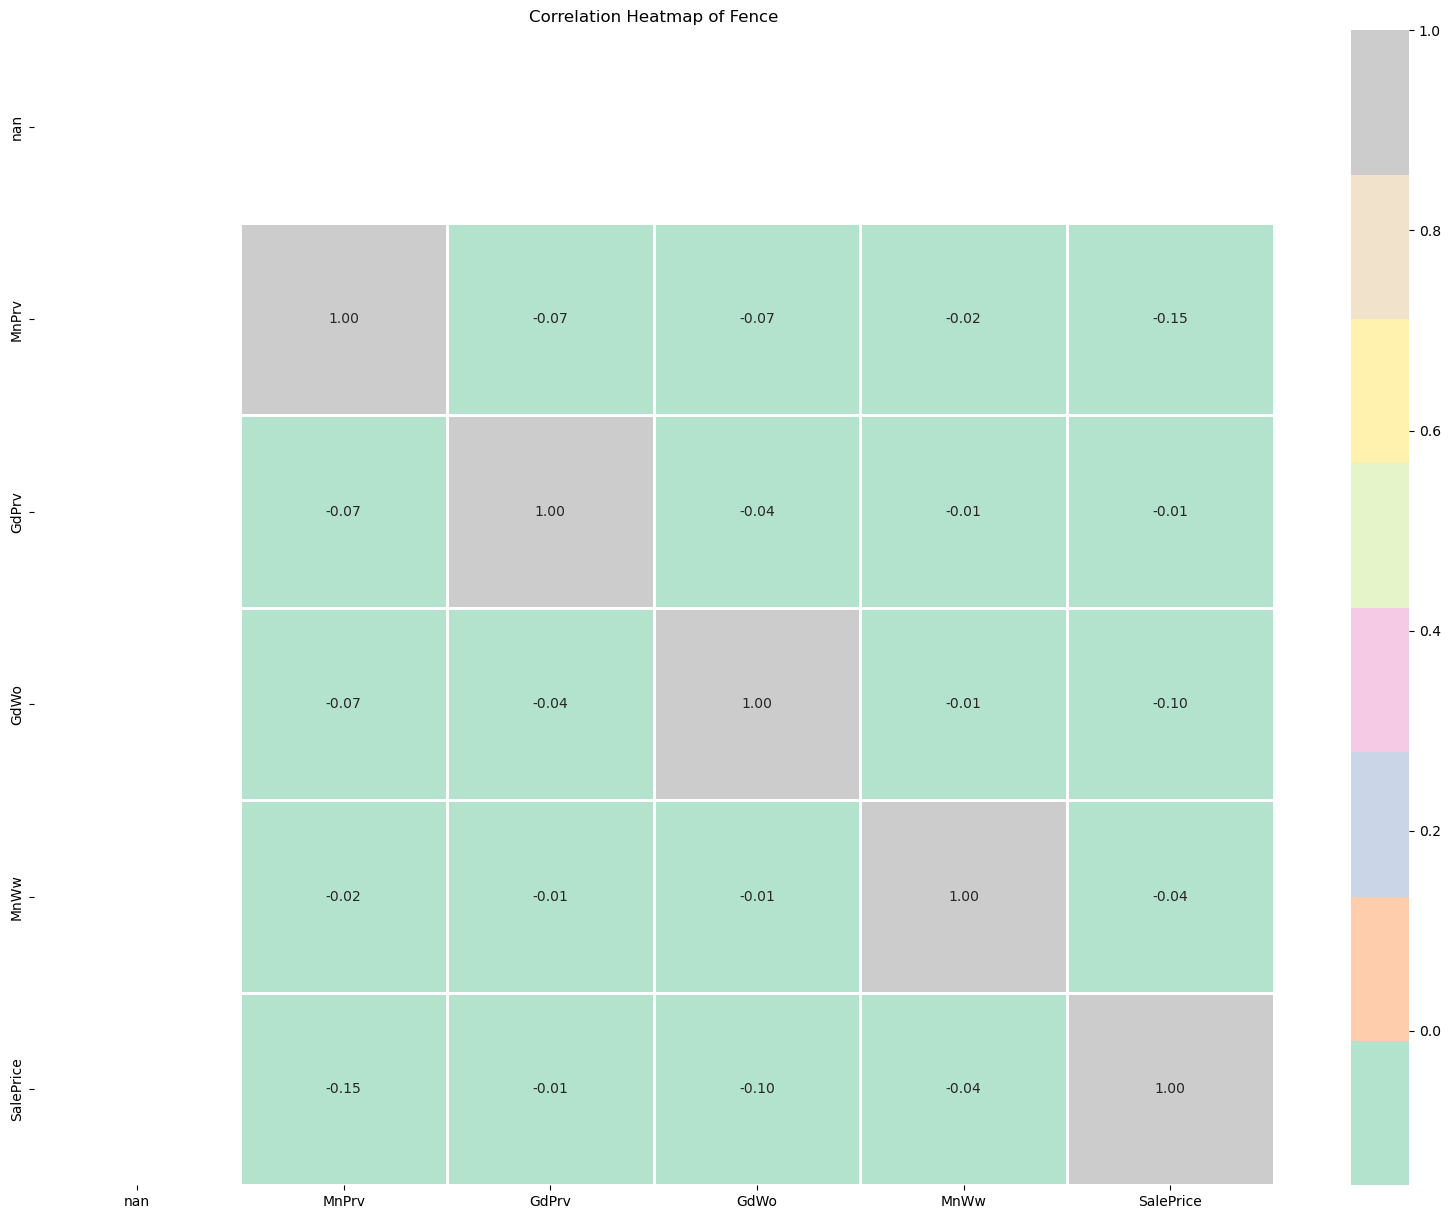

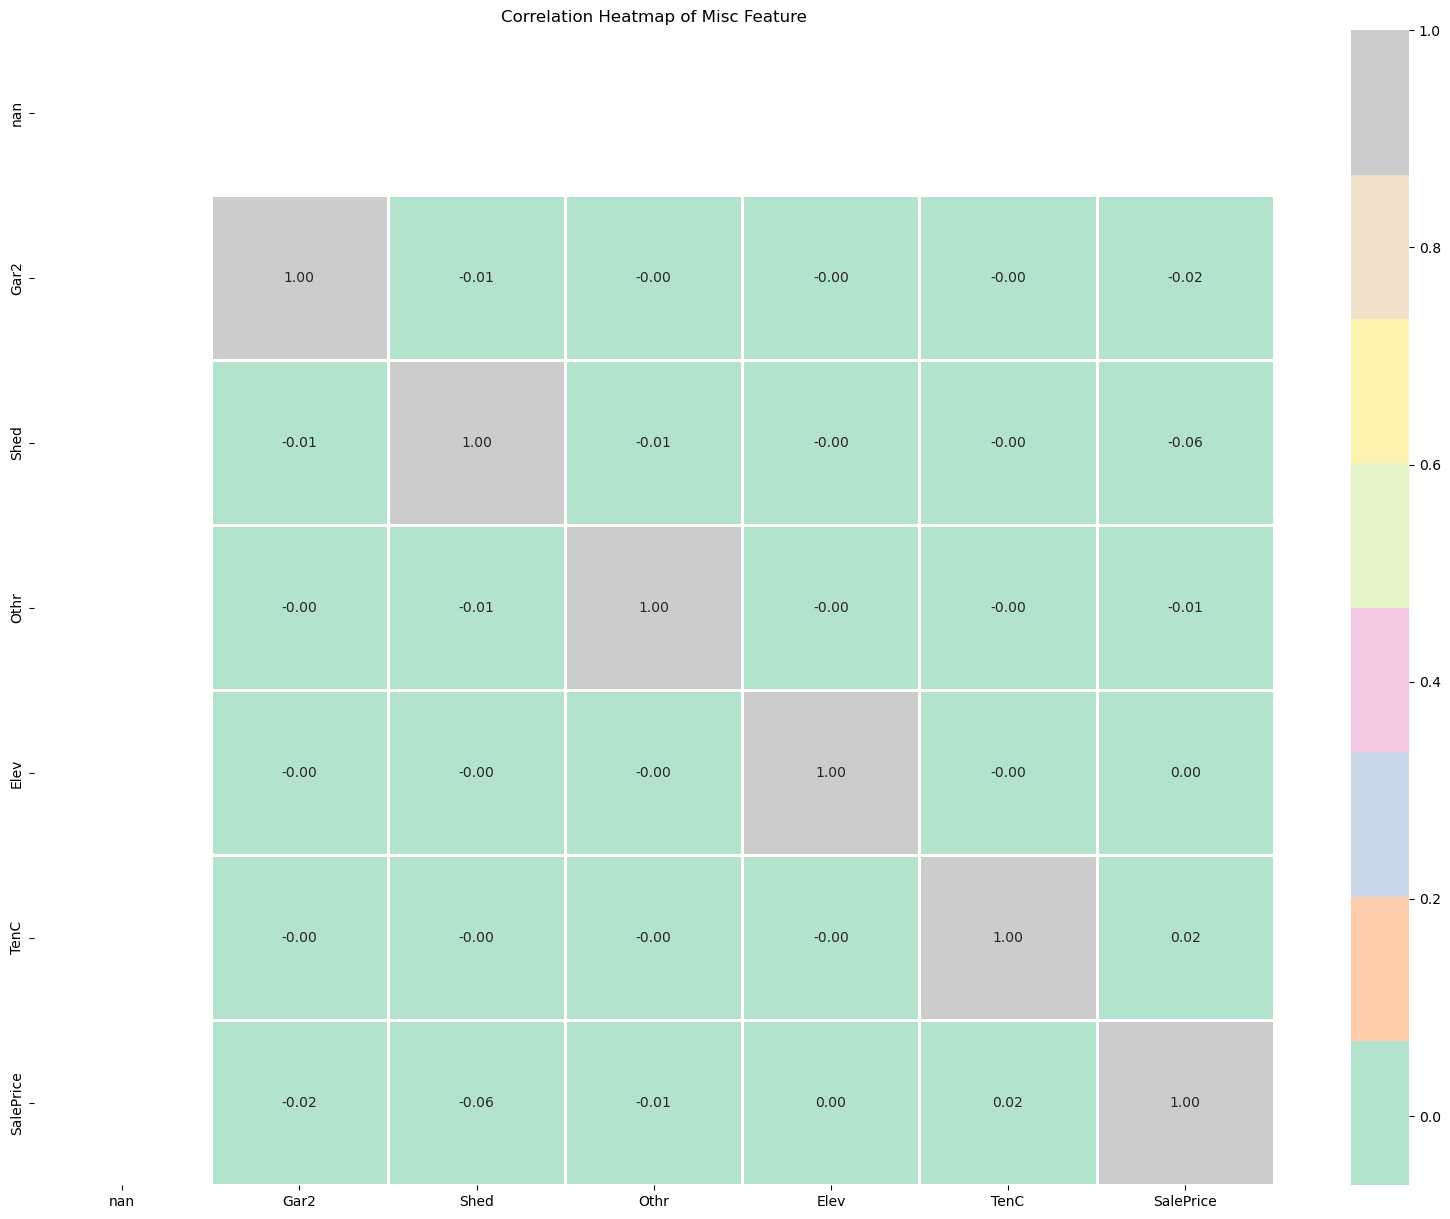

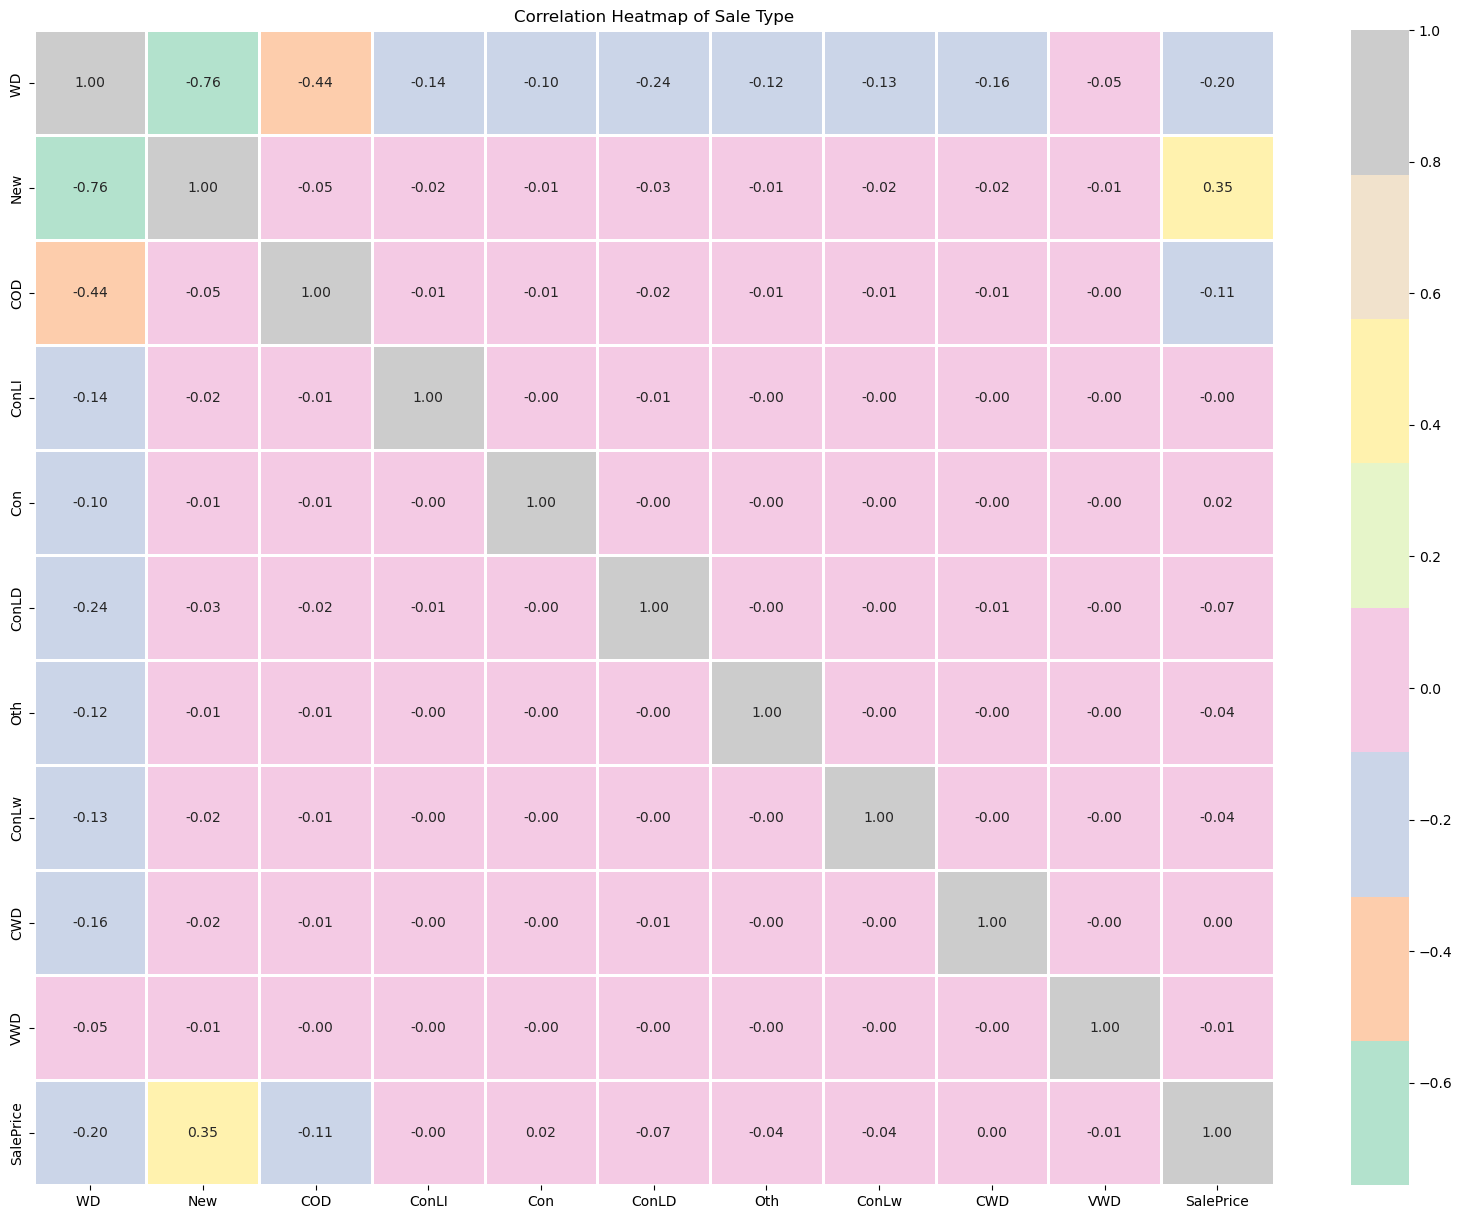

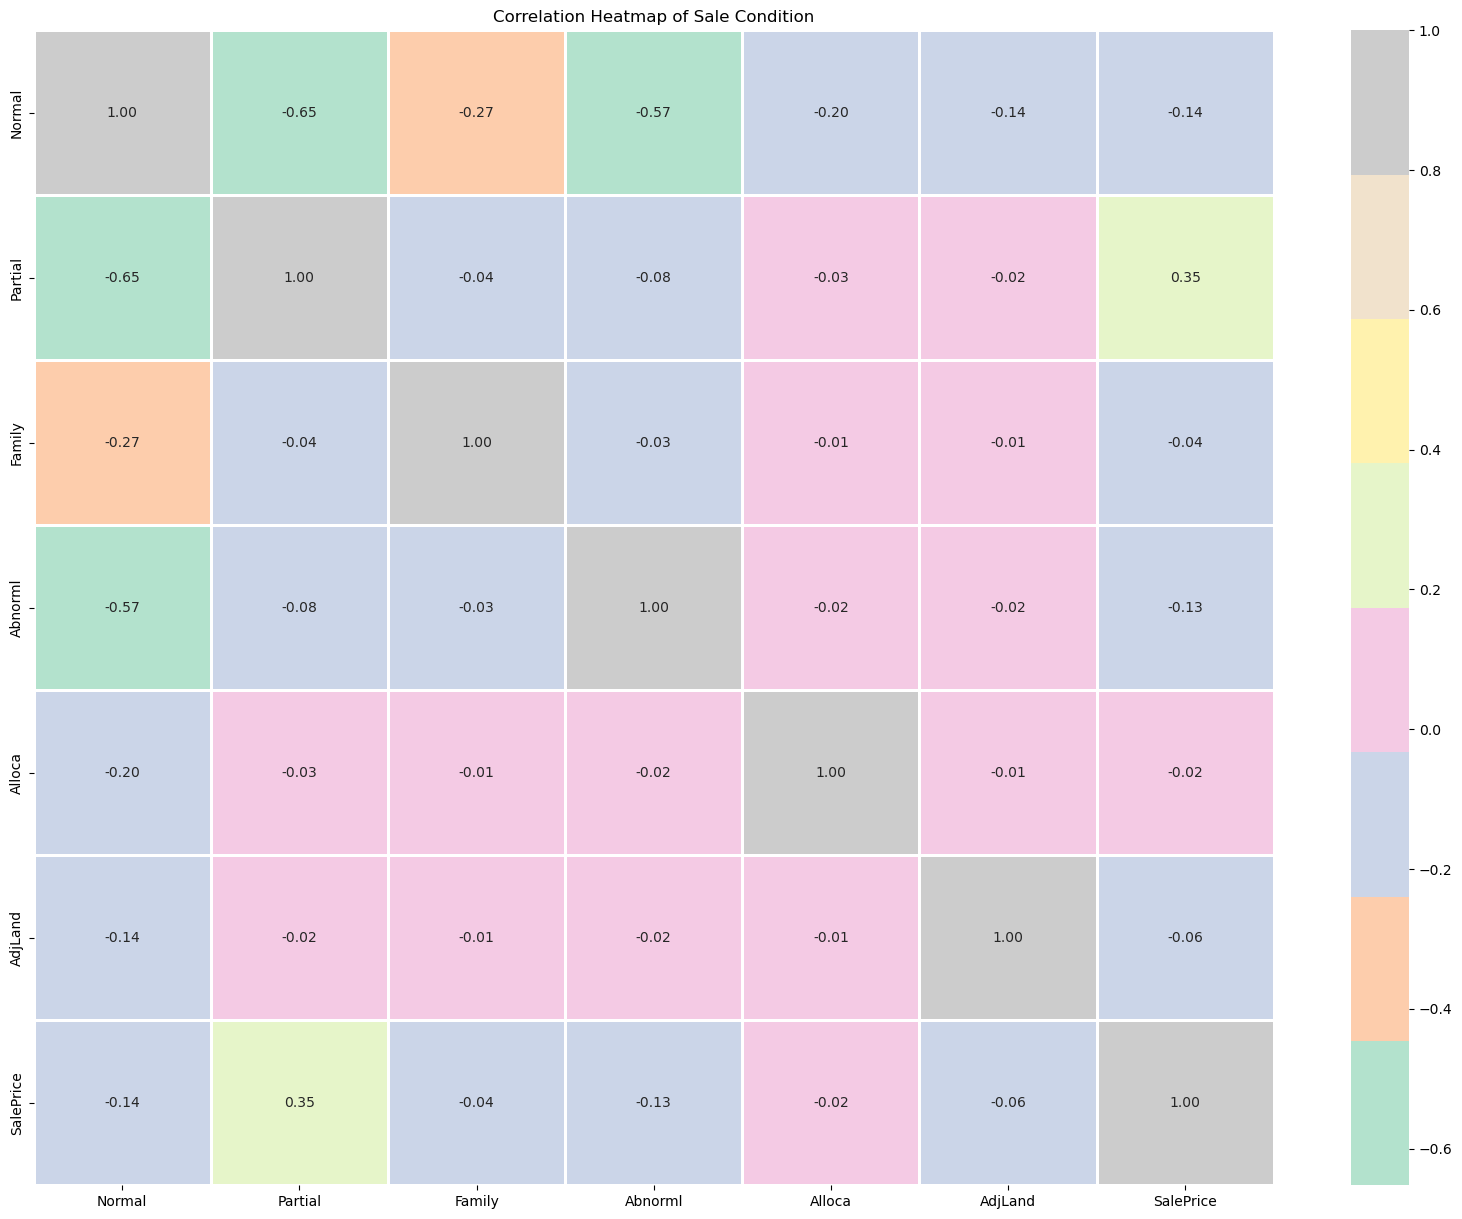

In [129]:
# Draw correlation matrix for all columns with categorical features
for column in data.columns:
    if data[column].dtype == object:
        encoding = apply_onehot_encoding(data[column])
        encoding["SalePrice"] = data["SalePrice"]
        draw_correlation_matrix(encoding, figsize=(20, 15), title="Correlation Heatmap of " + column)